### Viewing and Structuring the Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime

In [2]:
# # #img_md = pd.read_csv('../../../Data//ecotaxa_export_3203_20200731_1928.tsv', sep='\t')
# img_md = pd.read_csv('../../../Data/ecotaxa_export_3203_20200909_1843.tsv', sep='\t')
# img_md_subset = img_md[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]
# img_md_subset.to_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
# del img_md # note this doesn't actually free to back to the system but just to python

In [23]:
import glob, os

tsv_list = []
for file in glob.glob("../../../Data/all_imagery/*.tsv"):
    tsv_list.append(file)
    
print(len(tsv_list))

1149


In [42]:
img_md_subset = pd.read_csv(tsv_list[0], sep='\t').iloc[1:][['object_id', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]

for tsv in tsv_list[1:]:
    df_to_add = pd.read_csv(tsv, sep='\t').iloc[1:][['object_id', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]
    img_md_subset = img_md_subset.append(df_to_add, ignore_index=True)

In [43]:
fn_list = []
for file in glob.glob("../../../Data/all_imagery/*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[26:-4] for x in fn_list]

img_md_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(img_md_subset)

5158011


5150904

In [4]:
img_md_subset.to_csv('../../../Data/all_images_231020.csv')

In [3]:
img_md_subset = pd.read_csv('../../../Data/all_images_231020.csv')

In [5]:
img_md_subset['object_annotation_status'] = 'none'
img_md_subset['object_annotation_category'] = 'none'
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [6]:
img_md_subset.head()

,object_id,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence,object_annotation_status,object_annotation_category
0,D20180112T131528_IFCB116_00002,good,-65.85,-71.3465,20180112,131528,0.00598,0.01228,none,none
1,D20180112T131528_IFCB116_00003,good,-65.85,-71.3465,20180112,131528,0.00384,0.01254,none,none
2,D20180112T131528_IFCB116_00004,good,-65.85,-71.3465,20180112,131528,0.00471,0.01228,none,none
3,D20180112T131528_IFCB116_00005,good,-65.85,-71.3465,20180112,131528,0.07089,0.95228,none,none
4,D20180112T131528_IFCB116_00006,good,-65.85,-71.3465,20180112,131528,0.04179,0.67273,none,none


### Code to join all the new validated subsets back into the primary dataframe

In [7]:
# update the overall dataframe with validated labels from the main ecotaxa export
new_val = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
new_val = new_val.drop('Unnamed: 0', 1)
# there are a bunch of duplicated object_ids for some reason, ~200
new_val = new_val.drop(new_val[new_val.duplicated(subset=['object_id'])].index)

In [8]:
print(len(new_val[new_val.object_annotation_status == 'validated']))

35805


In [9]:
new_val.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,0.26577,1.71370
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00269,0.01279
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.17801,1.47800
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00254,0.01276
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,0.02183,0.35693


In [10]:
# update the overall dataframe with validated labels from the main ecotaxa export
new_val = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
new_val = new_val.drop('Unnamed: 0', 1)
# there are a bunch of duplicated object_ids for some reason, ~200
new_val = new_val.drop(new_val[new_val.duplicated(subset=['object_id'])].index)
new_val = new_val[new_val.object_annotation_status == 'validated']

img_md_subset = img_md_subset.set_index('object_id')
new_val = new_val.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
img_md_subset = pd.concat([img_md_subset[~img_md_subset.index.isin(new_val.index)], new_val])

img_md_subset = img_md_subset.reset_index()
print(len(img_md_subset[img_md_subset.object_annotation_status == 'validated']))
print(len(img_md_subset))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


35805
5159679


In [11]:
# update the overall dataframe with validated labels from the first iteration of output validation
new_val = pd.read_csv('../../../Data/ecotaxa_export_3450_20201007_2123.tsv', sep='\t')
new_val = new_val[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]

img_md_subset = img_md_subset.set_index('object_id')
new_val = new_val.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
img_md_subset = pd.concat([img_md_subset[~img_md_subset.index.isin(new_val.index)], new_val])
img_md_subset = img_md_subset.reset_index()

print(len(img_md_subset[img_md_subset.object_annotation_status == 'validated']))
print(len(img_md_subset))

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


38143
5160156


In [12]:
# update the overall dataframe with validated labels from the second iteration of output validation
new_val = pd.read_excel('../../../Data/ecotaxa_export_20201015_iteration2.xlsx')
new_val = new_val[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]

img_md_subset = img_md_subset.set_index('object_id')
new_val = new_val.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
img_md_subset = pd.concat([img_md_subset[~img_md_subset.index.isin(new_val.index)], new_val])
img_md_subset = img_md_subset.reset_index()

print(len(img_md_subset[img_md_subset.object_annotation_status == 'validated']))
print(len(img_md_subset))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


43308
5160156


In [14]:
### this is the validated samples from preserved samples so fluoresence data is wonky!
new_val = pd.read_csv("../../../Data/ecotaxa_PAL1718Pres_export_3591_20201021_2018_iteration2.tsv", sep='\t')
new_val = new_val[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]

img_md_subset = img_md_subset.set_index('object_id')
new_val = new_val.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
img_md_subset = pd.concat([img_md_subset[~img_md_subset.index.isin(new_val.index)], new_val])
img_md_subset = img_md_subset.reset_index()

print(len(img_md_subset[img_md_subset.object_annotation_status == 'validated']))
print(len(img_md_subset))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


45815
5160156


In [18]:
# For now only using validated images
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 250

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Asteromphalus                  9
Banquisia belgicae            67
Ceratium                     214
Cocconeis                     15
Crustacea                      9
Dinophyceae                  227
Dinophysis                    29
Diplopsalis<Dinophyceae X     14
Eucampia                     144
Eucampia chain                90
Gyrodinium                   175
Licmophora                   185
Membraneis chain              11
Odontella sp.                 80
Pleurosigma                    3
Prymnesiophyceae               6
Rhizosolenia                  95
Tintinnida                    55
Torodinium                   103
Warnowia                      50
centric 10 temp               31
chain<centric                 62
t004                          12
t006                          90
t008                         234
t009                         152
t016                         146
t020                           7
Name: object_id, dtype: int64

In [20]:
# drop unwanted classes
img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category == 'Unknowns'].index)
img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category == 'none'].index)

Merge classes to the final groupings

In [21]:
with pd.option_context('display.max_rows', 200):
    print(img_md_subset.groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                    509
Asteromphalus                   9
Bacillariophyceae             466
Banquisia belgicae             67
Ceratium                      214
Chaetoceros single            302
Chaetoceros<Mediophyceae      751
Ciliophora                    559
Cocconeis                      15
Corethron                     313
Crustacea                       9
Cryptophyta                  1767
Cylindrotheca                 379
Dactyliosolen                 435
Dictyochales                  750
Dinophyceae                   227
Dinophysis                     29
Diplopsalis<Dinophyceae X      14
Eucampia                      144
Eucampia chain                 90
Guinardia                     359
Gymnodinium                   479
Gyrodinium                    175
Katodinium                    526
Licmophora                    185
Membraneis                    264
Membraneis chain               11
Navicula                      364
Nitzschia frigida    

In [22]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

### Merging Classes

#### Most individual classes as possible

In [27]:
# individual_pennate_diatoms
amphiprora = ['Amphiprora']                    
cylindrotheca = ['Cylindrotheca']                 
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain']        

general_pennate_diatoms = [
    'Banquisia belgicae',            
    'Cocconeis',                      
    'Licmophora',                     
    'Pleurosigma',                     
]

unidentified_single_pennates = [
    'Membraneis',                    
    'Navicula',                      
    'temp cylindrotheca',            
    'pennate 10 temp',               
    'pennate 11 temp',              
    'pennate 2 temp',                
    'pennate 7 temp',
    'pennate<Bacillariophyta',
]

unidenfitied_chain_pennates = [
    'chain<pennate',                 
    'Membraneis chain'                
]

# individual centric diatoms

chaetoceros = ['Chaetoceros single']             # put together - TODO yes put together
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']      
corethron = ['Corethron']                     
eucampia = ['Eucampia']                       # put together - TODO yes put together
eucampia_chain = ['Eucampia chain']                 
guinardia = ['Guinardia']                     
dactyliosolen = ['Dactyliosolen']                 
proboscia = ['Proboscia sp.']                 

general_centric_diatoms = [
    'Asteromphalus', # this could go with the centric cells                   
    'Odontella sp.',                  
    'Rhizosolenia',                   
]

unidentified_single_centrics = [
    'centric' ,                     
    'centric 1 temp'  ,              
    'centric 10 temp' ,                
    'centric 2 temp'  ,              
    'centric 3 temp'  ,              
    'centric 4 temp'   ,              
    'centric 6 temp'  ,              
]

unidentified_chain_centrics = [
    'chain<centric',                  
    'Thalassiosira',                
]

unidentified_diatoms = ['Bacillariophyceae']             


cryptophytes = ['Cryptophyta']                  

# individual dinoflagellates 
dinophyceae = ['Dinophyceae']                   
gymnodinium = ['Gymnodinium']                   
katodinium = ['Katodinium']                    
ceratium = ['Ceratium']                      
torodinium = ['Torodinium']                    
dinoflagellate_i = ['dinoflagellate-i']              
dinoflagellate_ii = ['dinoflagellate-ii']             
dinoflagellate_iii = ['dinoflagellate-iii']             

general_dinoflagellates = [
    'Gyrodinium',                     
    'Dinophysis'  ,                   
    'Diplopsalis<Dinophyceae X' ,     
    'Warnowia',                       
]

chlorophytes = ['Pyramimonas']                  

haptophytes = ['Phaeocystis', 'Prymnesiophyceae'] #TODO schuyler is Prymnesiophyceae a haptophyte                  

silicoflagellates = ['Dictyochales']                  

# microzooplankton
ciliophora = ['Ciliophora']                    
tintinnida = ['Tintinnida']                     



unidentified_flagellates = [
    't005',                          
    't007',                         
    't009',                         
    't010',                       
    't011',                      
    't012',                     
    't013',                    
    't020',                     
]

small_unidentified_cells = [
    't002',                         
    't003',                          
]

unidentified_living_cells = [
    'Crustacea',                       
    't004'    ,                       
    't006'    ,                       
    't008'    ,                      
    't016'    ,                       
    't017'    ,                       
    't019'    ,                      
    'Unknowns',                      

]

other = [
    'badfocus<artefact',            
    'bead'             ,             
    'bubble'           ,             
    'detritus'         ,            
    'multiple<other'   ,             
    'part<other'       ,             

]

In [28]:
all_classes_sep = amphiprora+cylindrotheca+nitzschia_frigida+pseudo_nitzschia_chain+general_pennate_diatoms+unidentified_single_pennates+unidenfitied_chain_pennates+chaetoceros+chaetoceros_mediophyceae+corethron+eucampia+eucampia_chain+guinardia+dactyliosolen+proboscia+general_centric_diatoms+unidentified_single_centrics+unidentified_chain_centrics+unidentified_diatoms+cryptophytes+dinophyceae+gymnodinium+katodinium+ceratium+torodinium+dinoflagellate_i+dinoflagellate_ii+dinoflagellate_iii+general_dinoflagellates+chlorophytes+haptophytes+silicoflagellates+ciliophora+tintinnida+unidentified_flagellates+small_unidentified_cells+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(81, 82)

In [29]:
import numpy as np
np.unique(all_classes_sep, return_counts=True)

(array(['Amphiprora', 'Asteromphalus', 'Bacillariophyceae',
        'Banquisia belgicae', 'Ceratium', 'Chaetoceros single',
        'Chaetoceros<Mediophyceae', 'Ciliophora', 'Cocconeis', 'Corethron',
        'Crustacea', 'Cryptophyta', 'Cylindrotheca', 'Dactyliosolen',
        'Dictyochales', 'Dinophyceae', 'Dinophysis',
        'Diplopsalis<Dinophyceae X', 'Eucampia', 'Eucampia chain',
        'Guinardia', 'Gymnodinium', 'Gyrodinium', 'Katodinium',
        'Licmophora', 'Membraneis', 'Membraneis chain', 'Navicula',
        'Nitzschia frigida', 'Odontella sp.', 'Phaeocystis', 'Pleurosigma',
        'Proboscia sp.', 'Prymnesiophyceae', 'Pseudo-Nitzschia chain',
        'Pyramimonas', 'Rhizosolenia', 'Thalassiosira', 'Tintinnida',
        'Torodinium', 'Unknowns', 'Warnowia', 'badfocus<artefact', 'bead',
        'bubble', 'centric', 'centric 1 temp', 'centric 10 temp',
        'centric 2 temp', 'centric 3 temp', 'centric 4 temp',
        'centric 6 temp', 'chain<centric', 'chain<pennate'

In [30]:
list(set(all_classes) - set(all_classes_sep))

[]

In [31]:
### Doing the same but for the more complex classes:

classes = [amphiprora,cylindrotheca,nitzschia_frigida,pseudo_nitzschia_chain,general_pennate_diatoms,
unidentified_single_pennates,unidenfitied_chain_pennates,chaetoceros,chaetoceros_mediophyceae,corethron,
eucampia,eucampia_chain,guinardia,dactyliosolen,proboscia,general_centric_diatoms,unidentified_single_centrics,
unidentified_chain_centrics,unidentified_diatoms,cryptophytes,dinophyceae,gymnodinium,katodinium,ceratium,
torodinium,dinoflagellate_i,dinoflagellate_ii,dinoflagellate_iii,general_dinoflagellates,chlorophytes,haptophytes,
silicoflagellates,ciliophora,tintinnida,unidentified_flagellates,small_unidentified_cells,
           unidentified_living_cells,other]

class_names = ['amphiprora','cylindrotheca','nitzschia_frigida','pseudo_nitzschia_chain','general_pennate_diatoms',
'unidentified_single_pennates','unidenfitied_chain_pennates','chaetoceros','chaetoceros_mediophyceae','corethron',
'eucampia','eucampia_chain','guinardia','dactyliosolen','proboscia','general_centric_diatoms','unidentified_single_centrics',
'unidentified_chain_centrics','unidentified_diatoms','cryptophytes','dinophyceae','gymnodinium','katodinium','ceratium',
'torodinium','dinoflagellate_i','dinoflagellate_ii','dinoflagellate_iii','general_dinoflagellates','chlorophytes',
'haptophytes','silicoflagellates','ciliophora','tintinnida','unidentified_flagellates','small_unidentified_cells',
           'unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
# img_md_subset.to_csv('ifcb_ecotaxa_subset_merged.csv')

In [33]:
unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()
with pd.option_context('display.max_rows', 200):
    print(unique_validated)

object_annotation_category
Amphiprora                    509
Asteromphalus                   9
Bacillariophyceae             466
Banquisia belgicae             67
Ceratium                      214
Chaetoceros single            302
Chaetoceros<Mediophyceae      751
Ciliophora                    559
Cocconeis                      15
Corethron                     313
Crustacea                       9
Cryptophyta                  1767
Cylindrotheca                 379
Dactyliosolen                 435
Dictyochales                  750
Dinophyceae                   227
Dinophysis                     29
Diplopsalis<Dinophyceae X      14
Eucampia                      144
Eucampia chain                 90
Guinardia                     359
Gymnodinium                   479
Gyrodinium                    175
Katodinium                    526
Licmophora                    185
Membraneis                    264
Membraneis chain               11
Navicula                      364
Nitzschia frigida    

Filter this data to only use validated and other filters TODO

In [34]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
len(val_subset)

45408

#### Getting Images Organized

In [35]:
import glob, os

fn_list = []
for file in glob.glob("../../../Data/all_imagery/*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[26:-4] for x in fn_list]

5806675


Only use data where we have both labels and imagery

In [36]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

45408

Only use classes with `min_count` or more samples

In [37]:
min_count = 20


unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [38]:
val_img_subset.head()

,object_id,object_annotation_category,object_annotation_hierarchy,object_annotation_status,object_date,object_lat,object_lon,object_peak_fluorescence,object_pmt_fluorescence,object_time,sample_flag,merged_category
5114341,D20180221T193119_IFCB116_01153,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,validated,20180221,-64.7535,-64.1339,1.71370,0.26577,193119,good,chlorophytes
5114342,D20180221T202431_IFCB116_00153,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,0.01279,0.00269,202431,good,gymnodinium
5114343,D20180221T202431_IFCB116_01303,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,1.47800,0.17801,202431,good,gymnodinium
5114344,D20180221T202431_IFCB116_03008,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,0.01276,0.00254,202431,good,katodinium
5114345,D20180221T212254_IFCB116_07034,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,validated,20180221,-64.7802,-63.9785,0.35693,0.02183,212254,good,chlorophytes


In [39]:
with pd.option_context('display.max_rows', 200):
    print(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                   509
Bacillariophyceae            466
Banquisia belgicae            67
Ceratium                     214
Chaetoceros single           302
Chaetoceros<Mediophyceae     751
Ciliophora                   559
Corethron                    313
Cryptophyta                 1767
Cylindrotheca                379
Dactyliosolen                435
Dictyochales                 750
Dinophyceae                  227
Dinophysis                    29
Eucampia                     144
Eucampia chain                90
Guinardia                    359
Gymnodinium                  479
Gyrodinium                   175
Katodinium                   526
Licmophora                   185
Membraneis                   264
Navicula                     364
Nitzschia frigida            845
Odontella sp.                 80
Phaeocystis                 1107
Proboscia sp.                365
Pseudo-Nitzschia chain      1116
Pyramimonas                 1520
Rhizosolenia    

In [249]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 10 temp': 39,
 'centric 2 temp': 40,
 'centric 3 temp': 41,
 'centric 4 temp': 42,
 'centric 6 temp': 43,
 'chain<centric': 44,
 'chain<pennate': 45,
 'detritus': 46,
 'dinoflagellate-i':

In [41]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 500

# TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# this might be easier if merge them after this step...
for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

26009

In [42]:
balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df.head()

,object_id,object_annotation_category,object_annotation_hierarchy,object_annotation_status,object_date,object_lat,object_lon,object_peak_fluorescence,object_pmt_fluorescence,object_time,sample_flag,merged_category
5114341,D20180221T193119_IFCB116_01153,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,validated,20180221,-64.7535,-64.1339,1.71370,0.26577,193119,good,chlorophytes
5114342,D20180221T202431_IFCB116_00153,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,0.01279,0.00269,202431,good,gymnodinium
5114343,D20180221T202431_IFCB116_01303,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,1.47800,0.17801,202431,good,gymnodinium
5114344,D20180221T202431_IFCB116_03008,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,validated,20180221,-64.7741,-64.1655,0.01276,0.00254,202431,good,katodinium
5114345,D20180221T212254_IFCB116_07034,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,validated,20180221,-64.7802,-63.9785,0.35693,0.02183,212254,good,chlorophytes


In [43]:
len(balanced_df)

26009

## Run the Model

### Preprocess for Keras

Load all data into memory, may not work at full size

In [44]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [49]:
for i, row in balanced_df.iterrows():
    print(i)
    print(row['object_id'])
    break

5114341
D20180221T193119_IFCB116_01153


In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []
object_ids_training = []


for index, row in balanced_df.sample(frac=1).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    #img = image.load_img(row['full_path'], target_size=(150, 150), color_mode="grayscale")
    img = image.load_img('../../../Data/all_imagery/'+row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    labels.append(class_id_dict[row['object_annotation_category']])
    merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
    object_ids_training.append(row['object_id'])
    
images = np.array(images)
labels = np.array(labels)
merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)
object_ids_training = np.array(object_ids_training)

In [51]:
images.shape

(26009, 150, 150, 1)

In [52]:
# view a bunch of the different classes

In [171]:
for i in range(np.max(labels)):
    imgs_display = images[labels == i][:10,:,:,0]
    print(imgs_display.shape)
    mlabs = merged_labels[labels == i][:10]
    olabs = original_labels[labels == i][:10]
    fig, ax = plt.subplots(1, 10, figsize=(16, 3))
    for j in range(0, 10):
        try:
            ax[j].imshow(imgs_display[j], cmap = 'gray')
            ax[j].axis('off')
            ax[j].text(0,-10, mlabs[j], rotation=16)
            ax[j].text(0,200, olabs[j],rotation=-16)
        except IndexError:
            continue
    plt.show()

(0, 150, 150)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 26009 but corresponding boolean dimension is 88

Make a keras style generator to hand this data to the model

In [46]:
# def generate_data(directory, batch_size):
#     """Replaces Keras' native ImageDataGenerator."""
#     i = 0
#     file_list = os.listdir(directory)
#     while True:
#         image_batch = []
#         for b in range(batch_size):
#             if i == len(file_list):
#                 i = 0
#                 random.shuffle(file_list)
#             sample = file_list[i]
#             i += 1
#             image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
#             image_batch.append((image.astype(float) - 128) / 128)

#         yield np.array(image_batch)

In [53]:
images[0].shape

(150, 150, 1)

In [54]:
images.shape, labels.shape, flu_data.shape

((26009, 150, 150, 1), (26009,), (26009, 2))

In [55]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

num_classes = len(class_id_dict)

test_size = 0.20

X_train, X_test, flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(images, flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, flu_train.shape, X_test.shape

((20807, 150, 150, 1), (20807, 2), (5202, 150, 150, 1))

### Need to oversample the X_train classes where y_train label is below 500 up to 500 with slight augmentation.

In [56]:
np.unique(np.argmax(y_train, axis=1), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 array([400, 373,  54, 171, 242, 400, 400, 250, 400, 303, 348, 400, 182,
         23, 115,  72, 287, 383, 140, 400, 148, 211, 291, 400,  64, 400,
        292, 400, 400,  76, 400,  44,  83,  40, 400, 400, 307, 400, 400,
         25, 400, 298, 360, 210,  50, 400, 400, 296, 400, 224, 400, 400,
        400, 400, 400, 400, 209, 400, 400, 400,  72, 273, 187, 122, 400,
        400, 354, 400, 117, 359, 400, 352]))

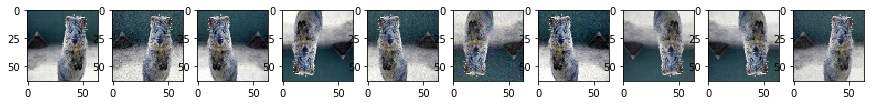

In [57]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.5),
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.9, 1.1)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    #    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    #    rotate=(-25, 25),
    #    shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i])


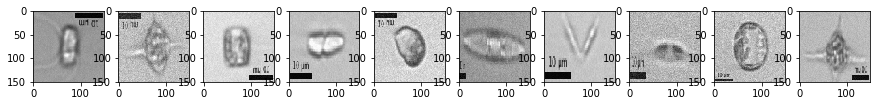

In [58]:
images_aug = seq(images=X_train[:20])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

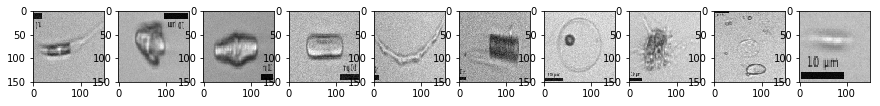

In [59]:
images_aug = seq(images=X_train[1000:1020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


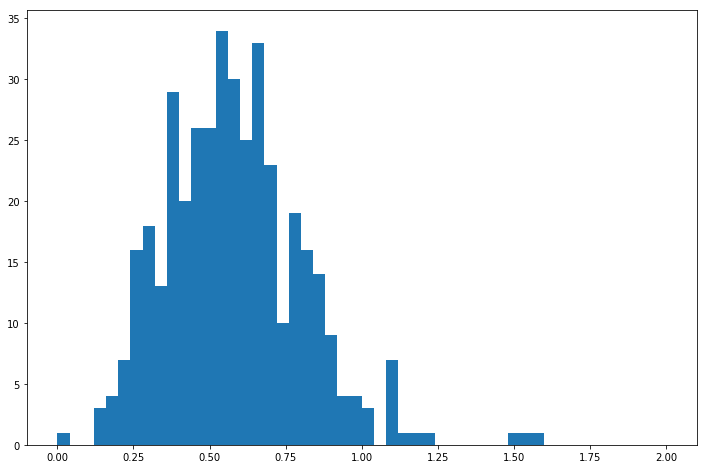

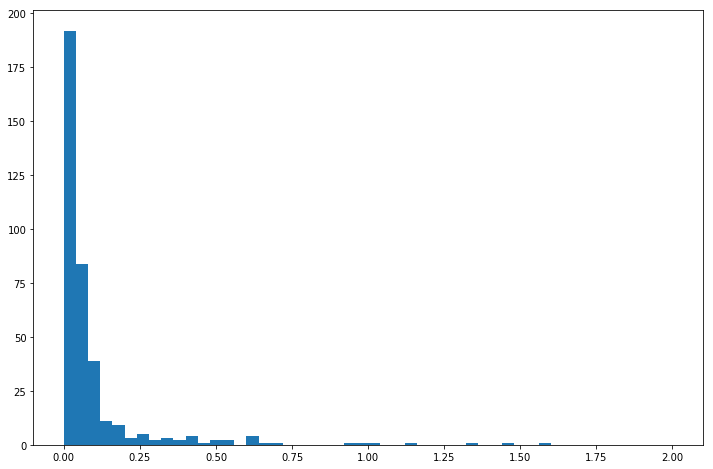

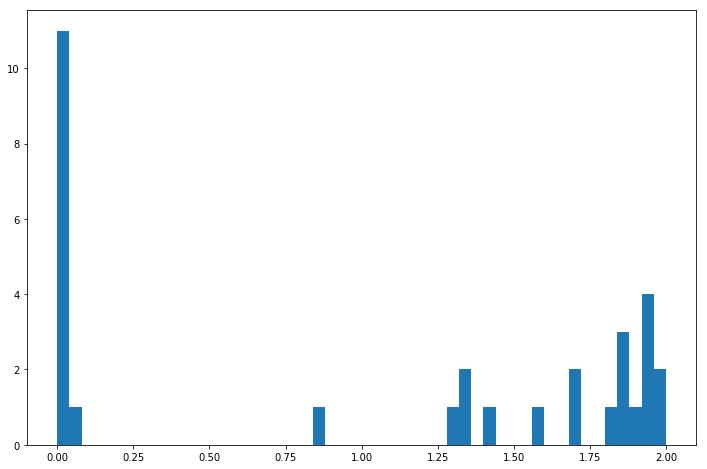

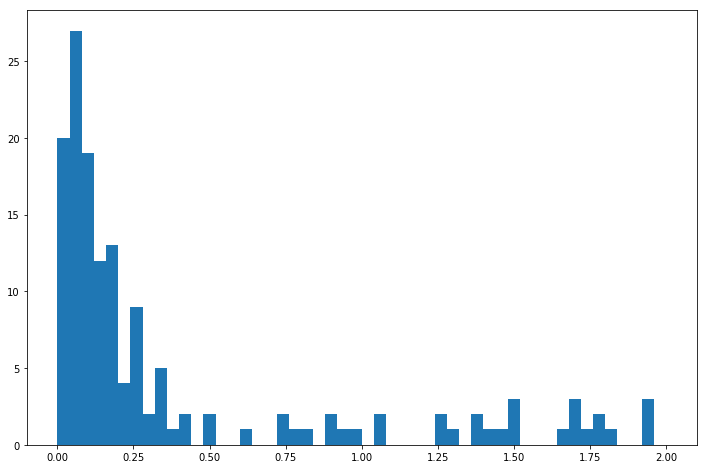

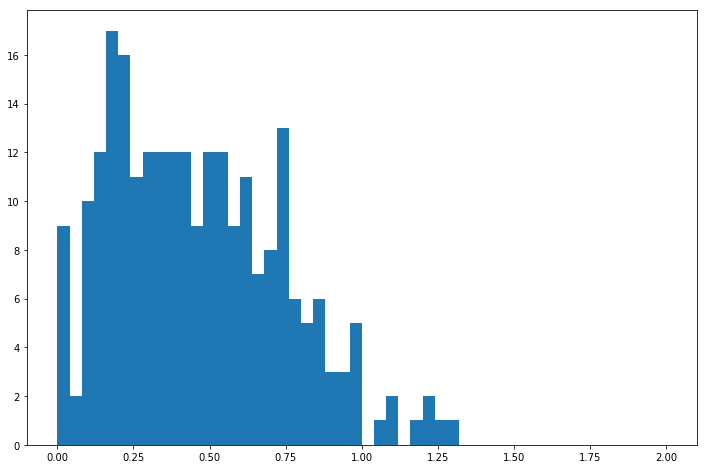

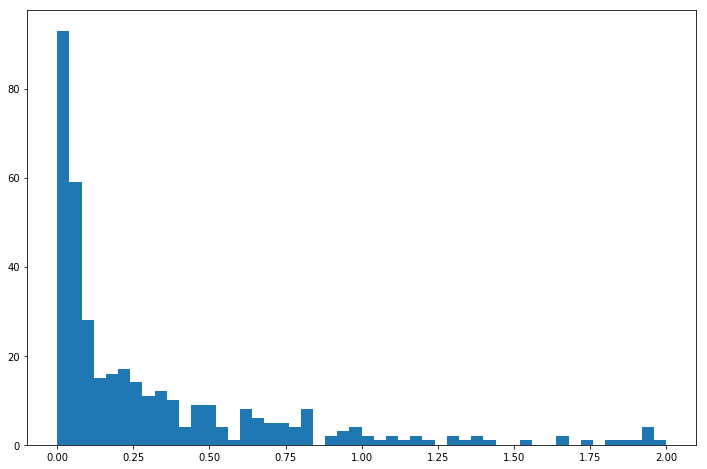

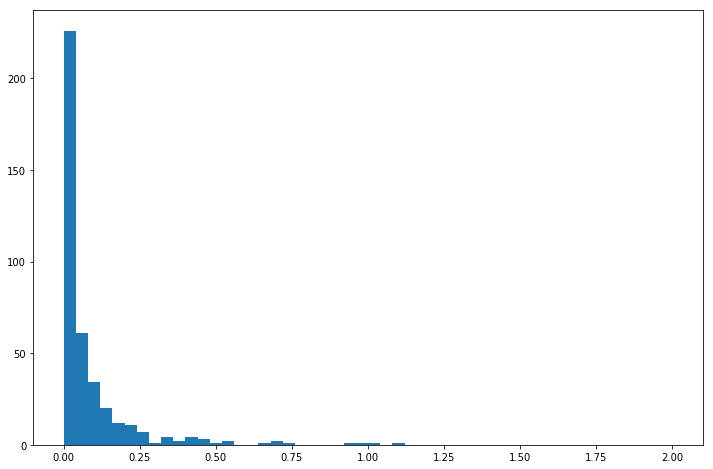

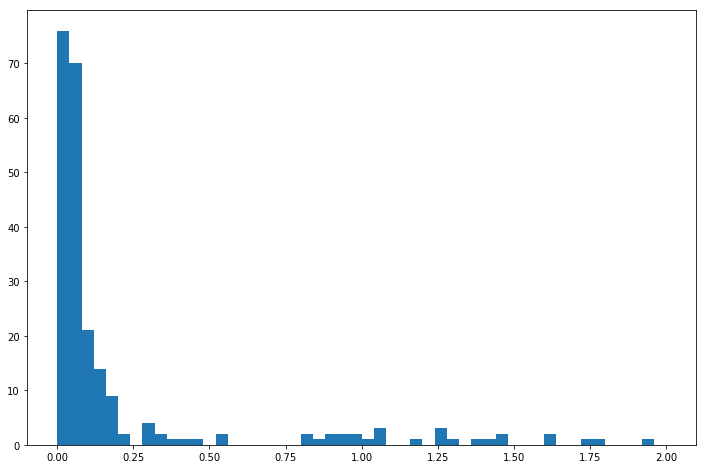

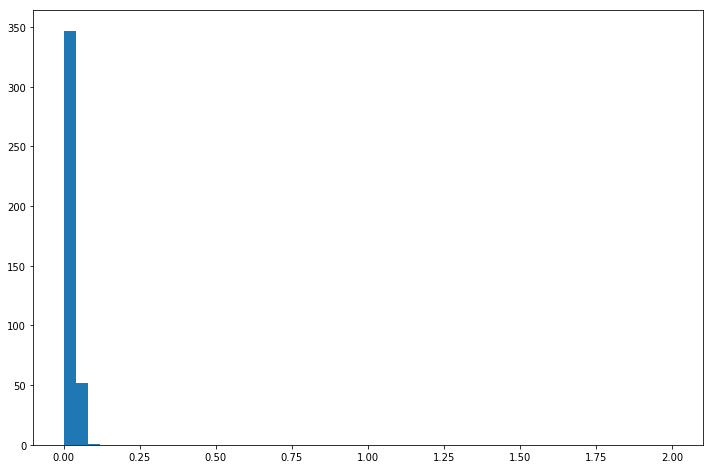

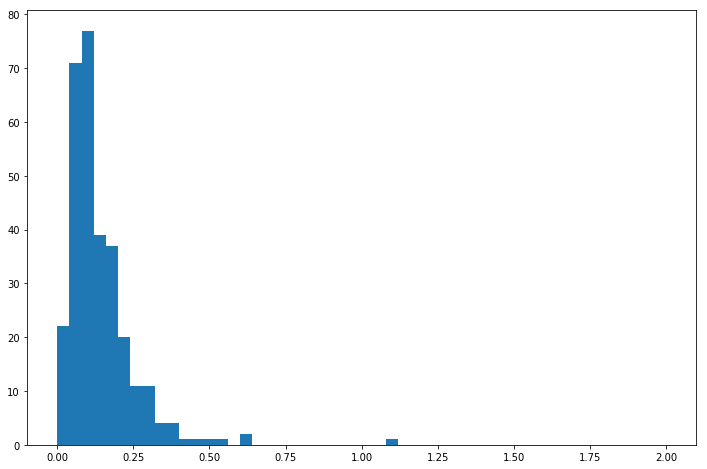

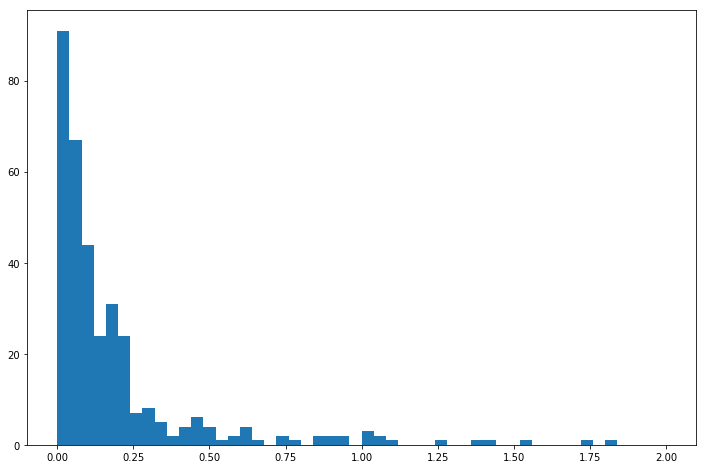

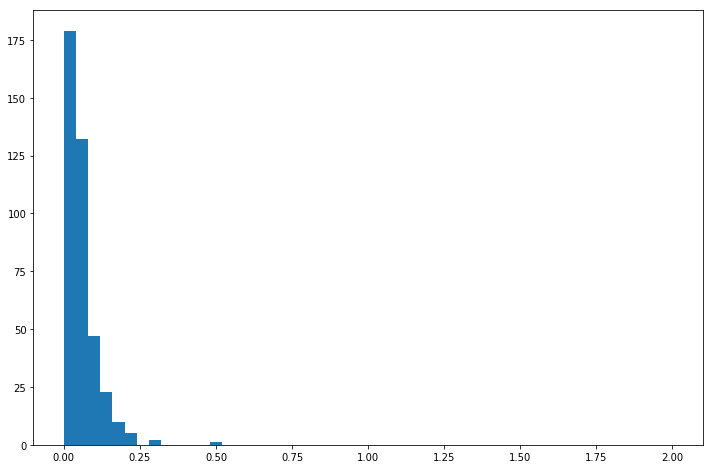

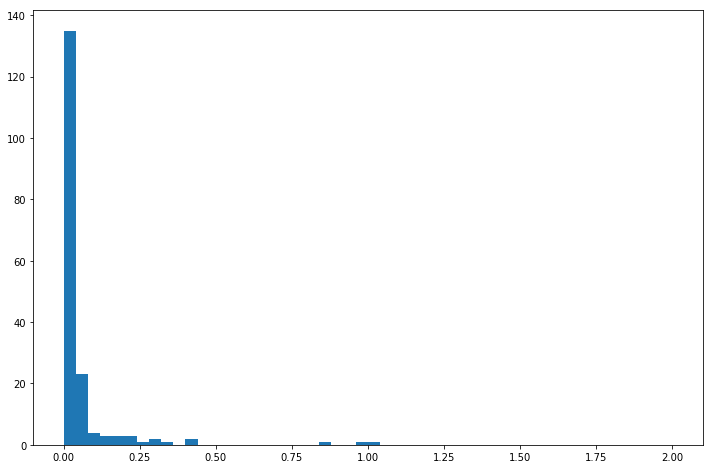

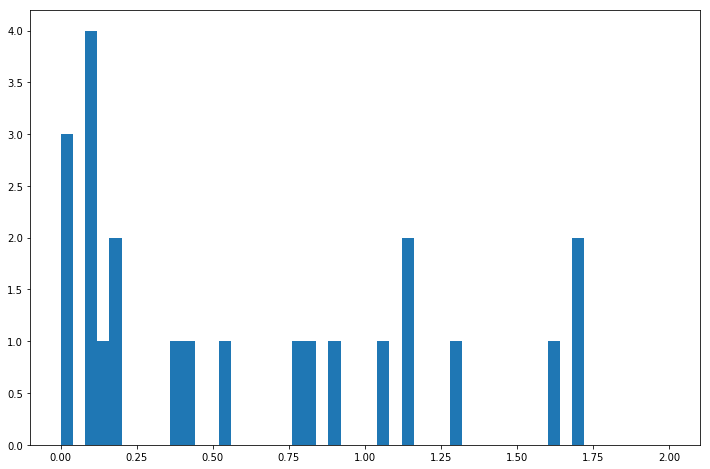

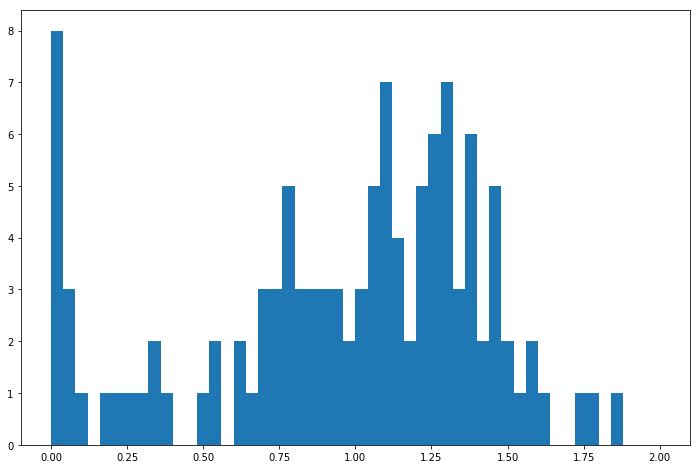

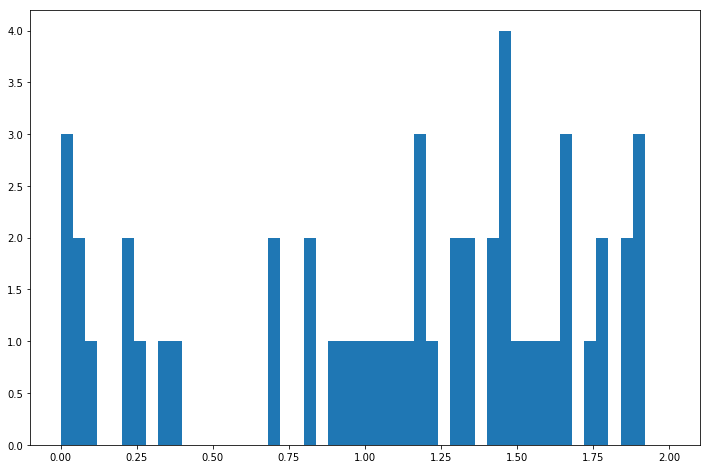

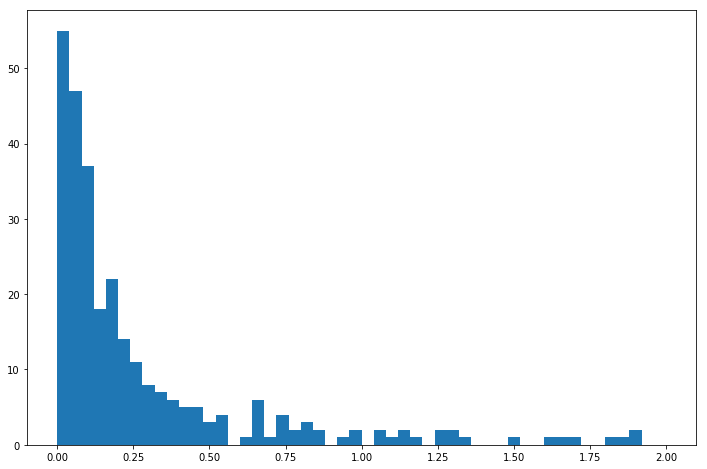

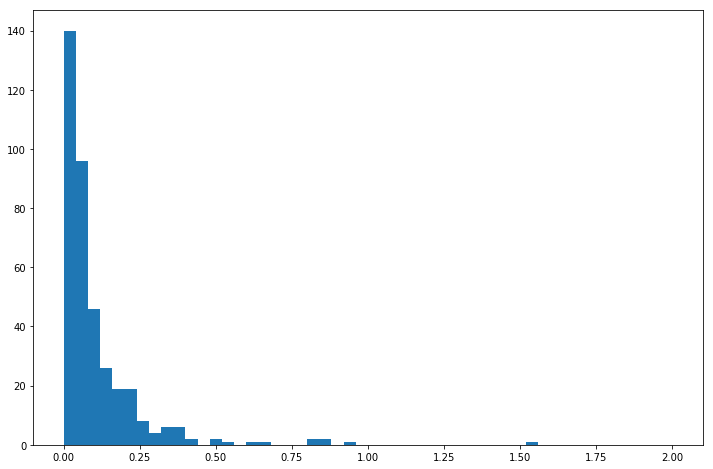

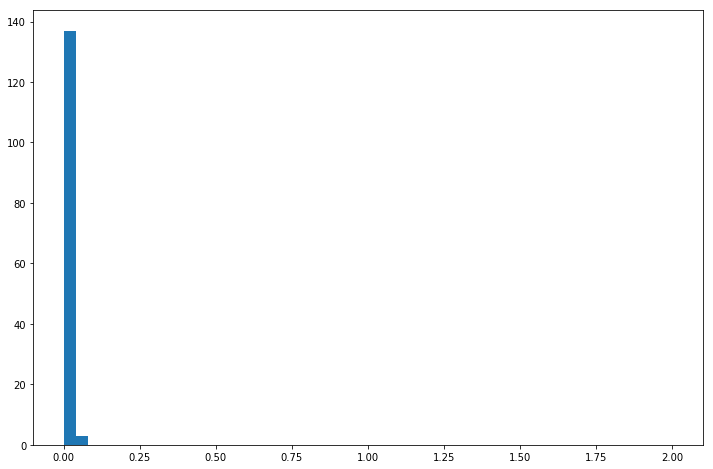

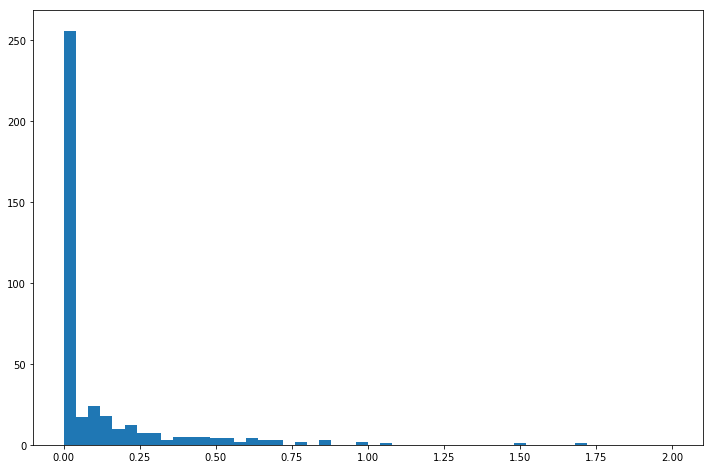

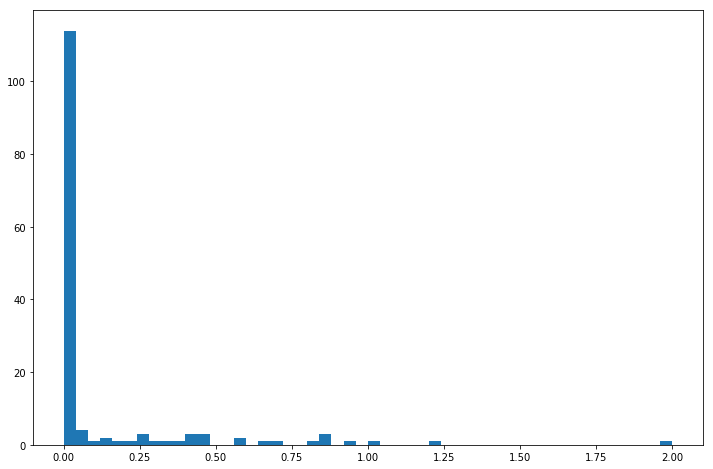

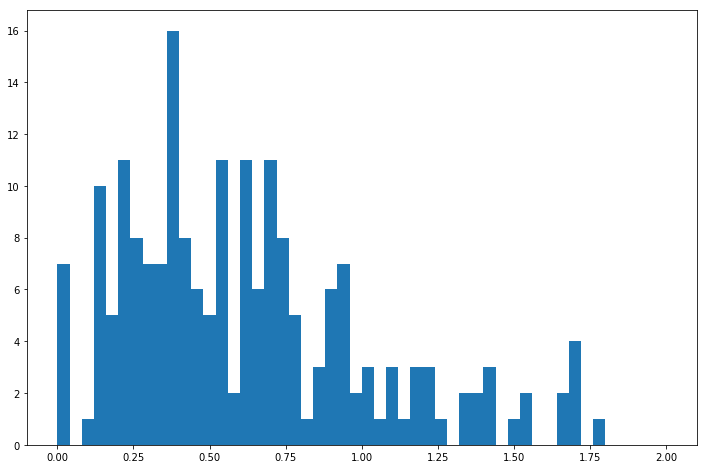

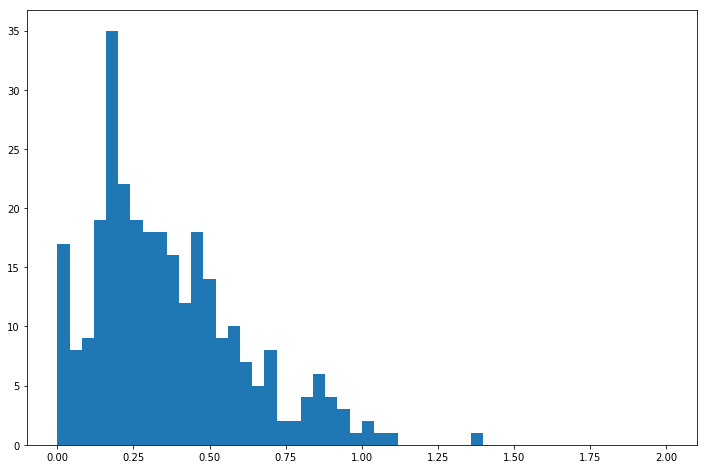

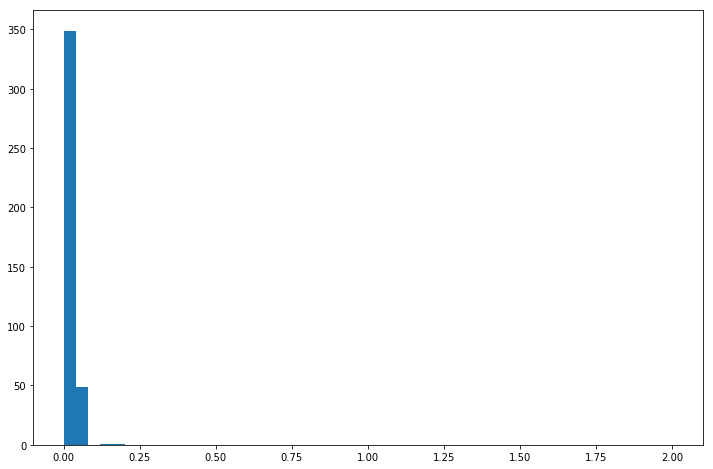

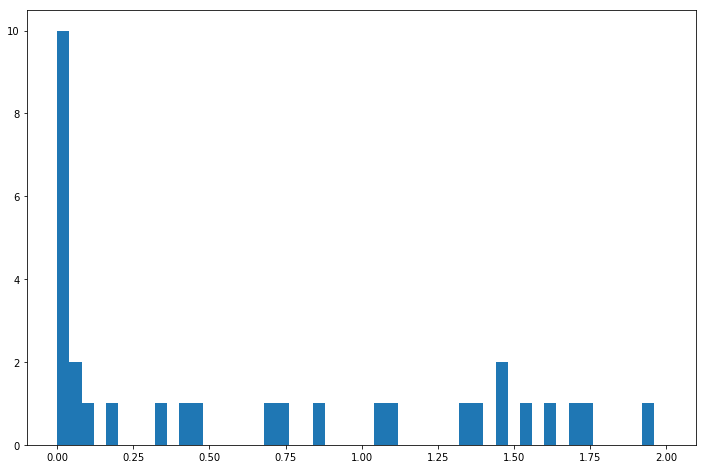

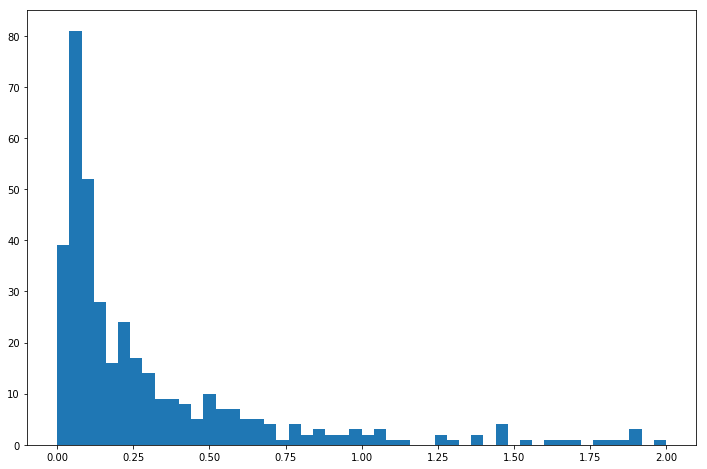

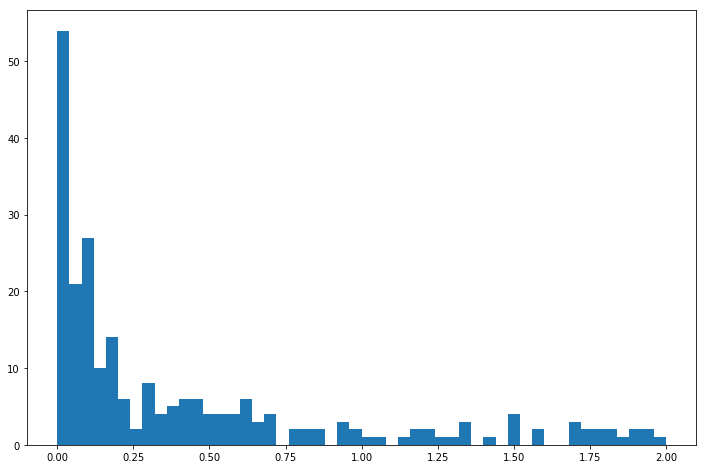

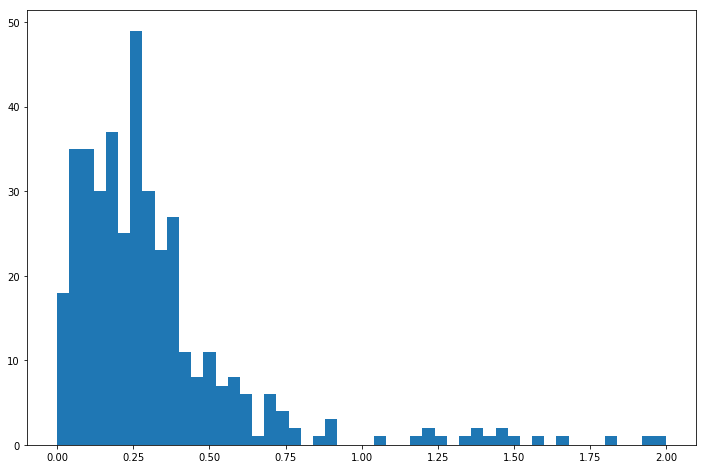

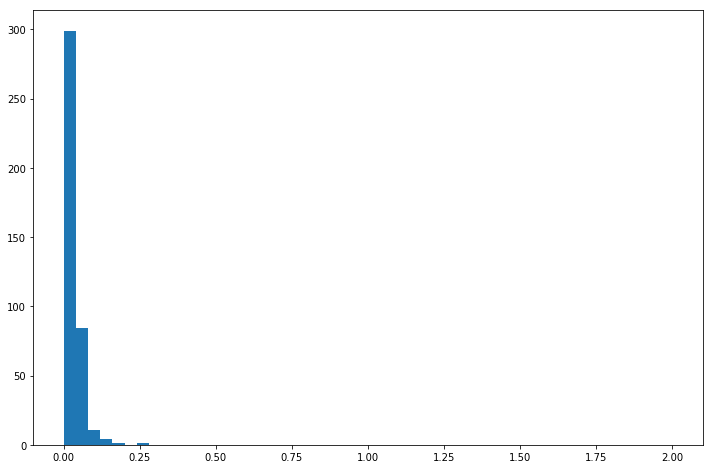

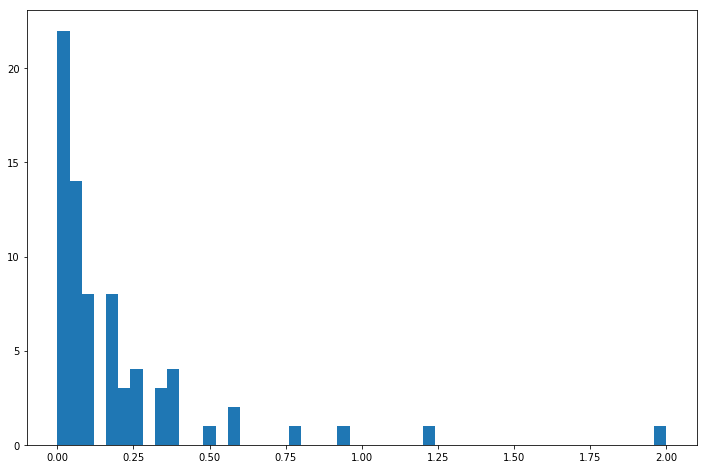

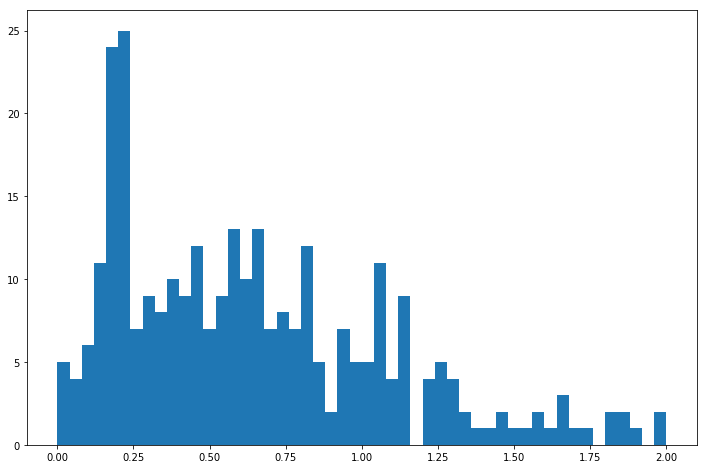

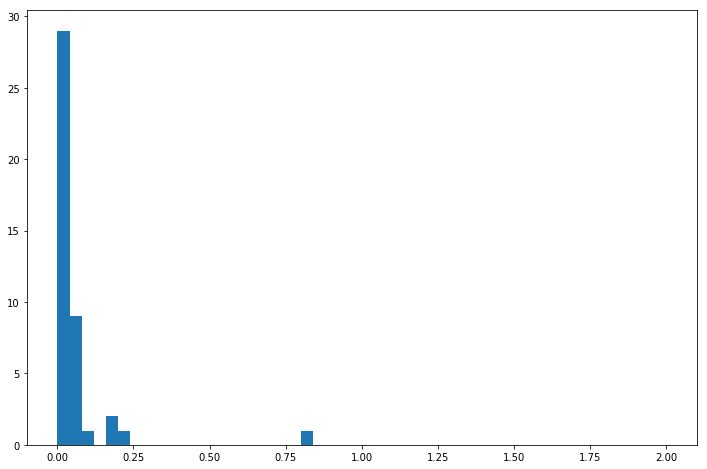

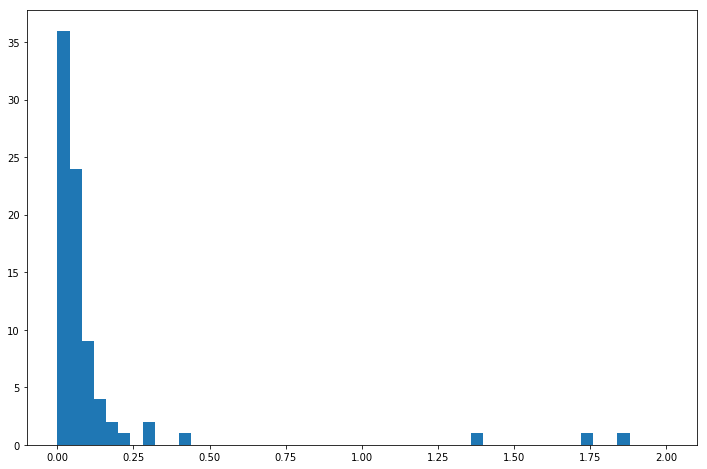

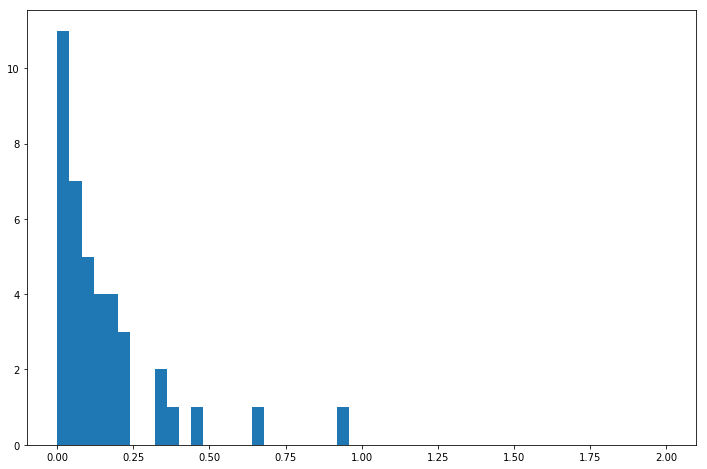

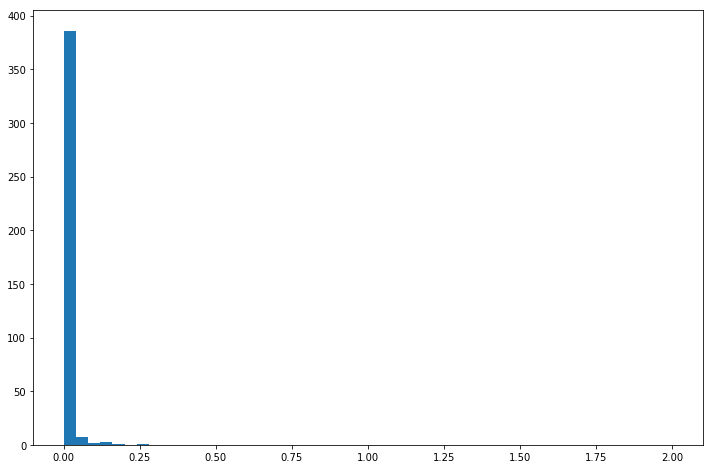

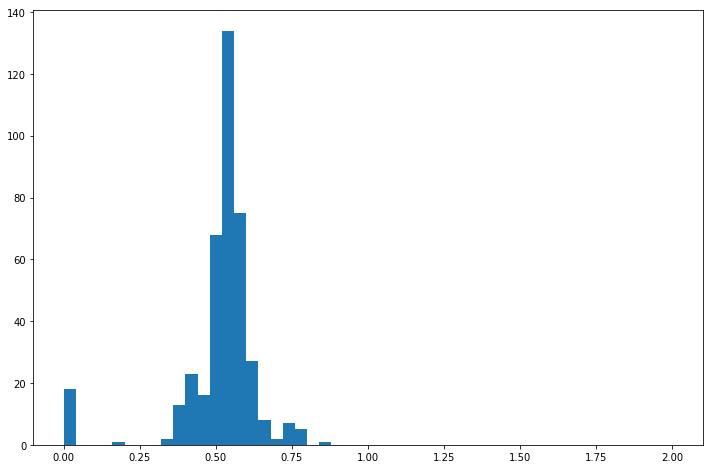

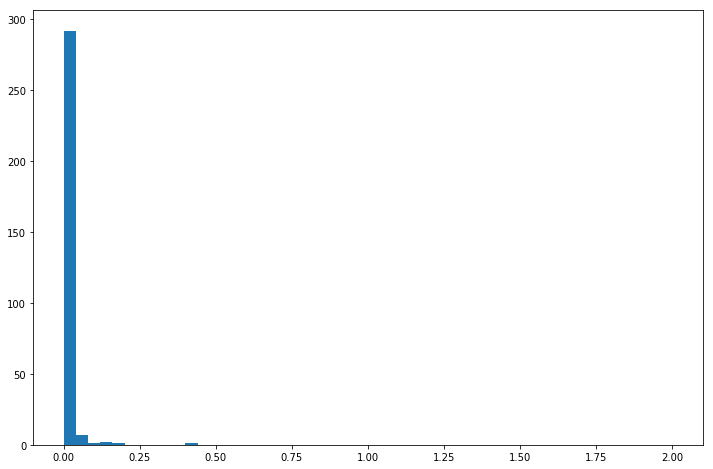

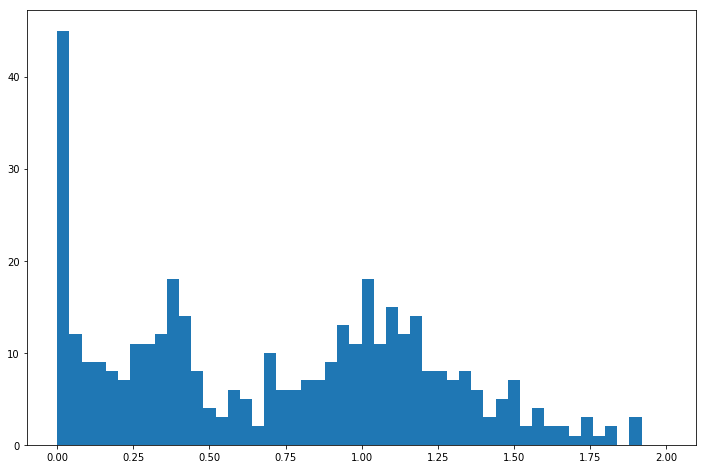

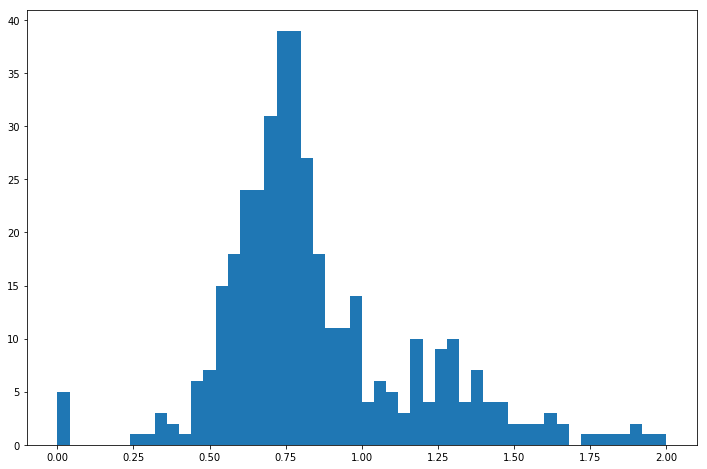

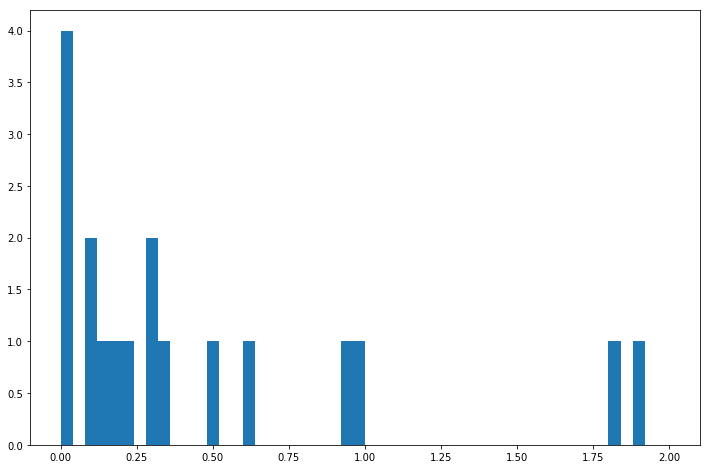

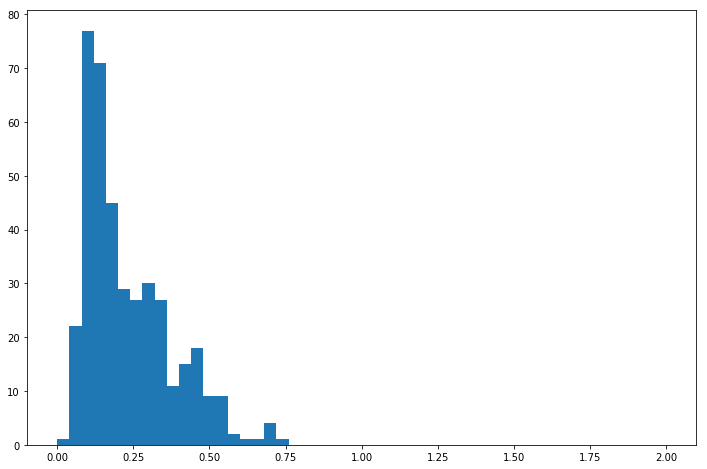

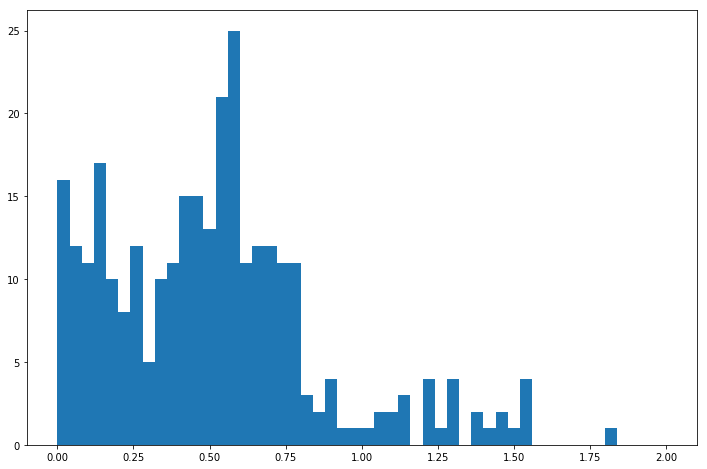

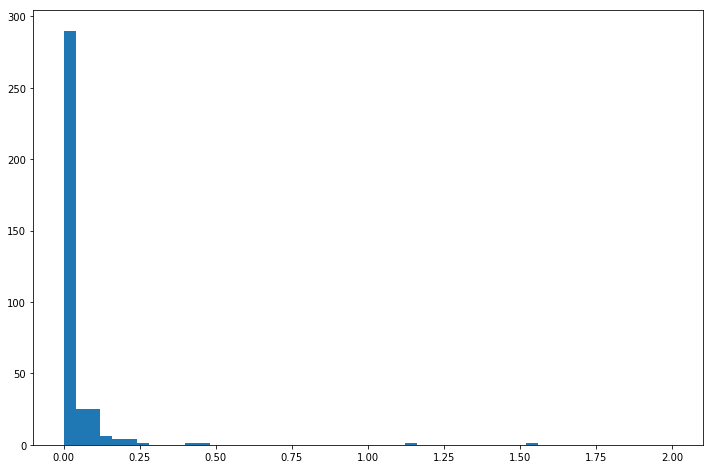

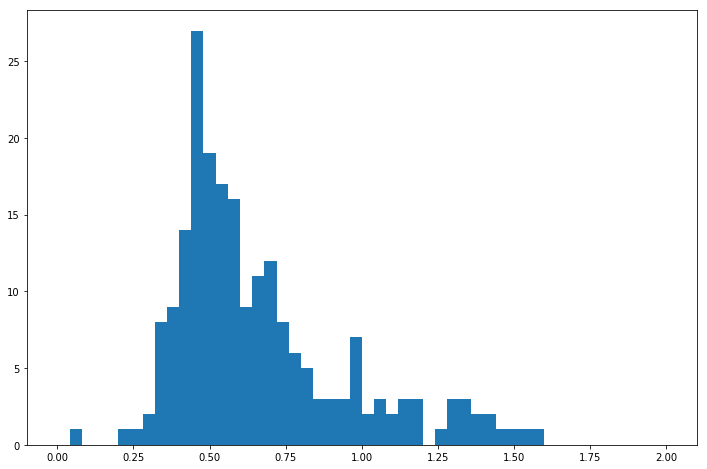

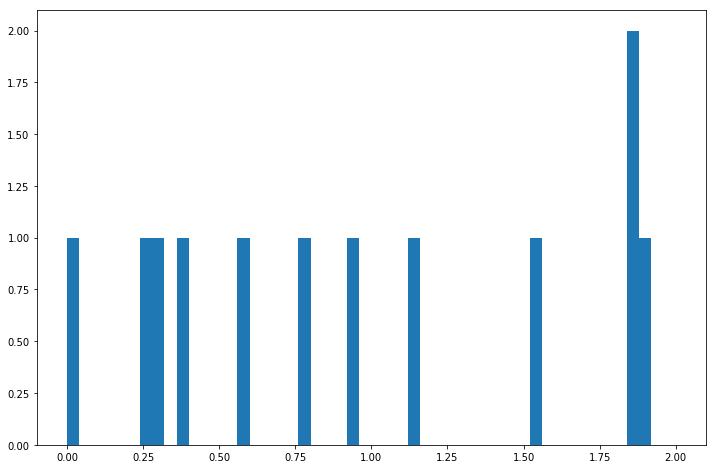

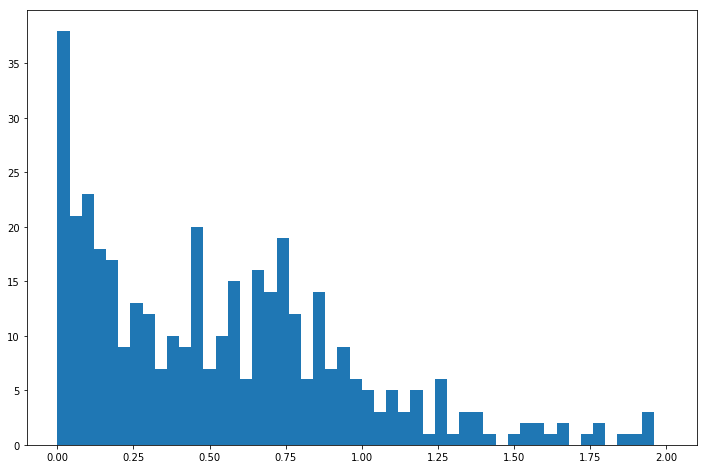

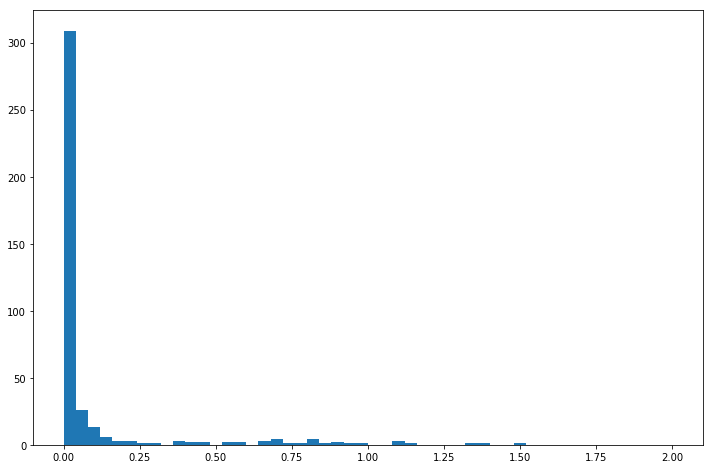

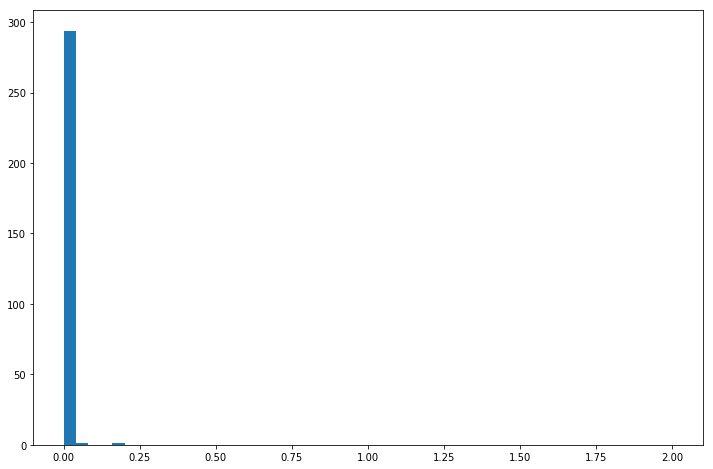

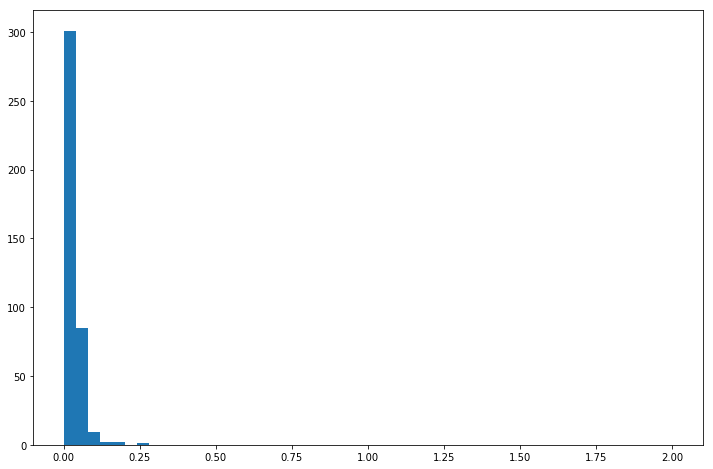

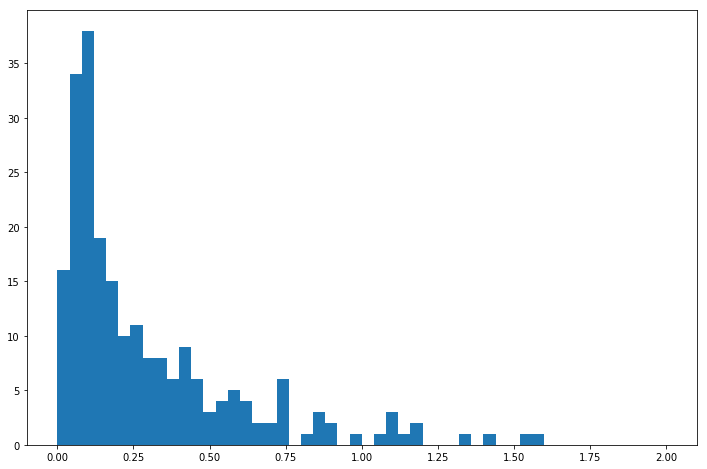

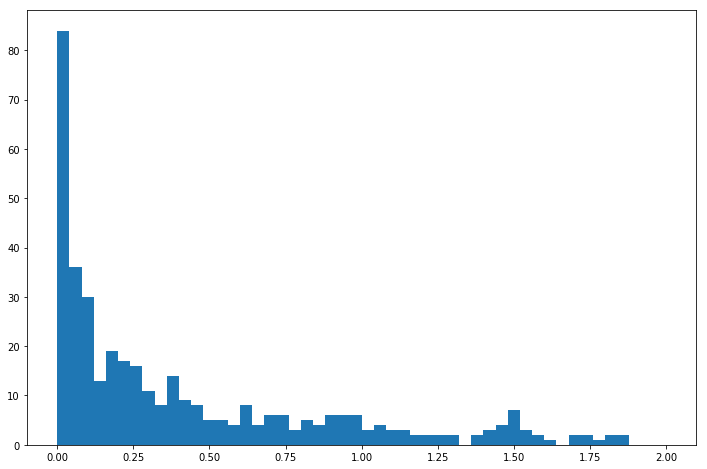

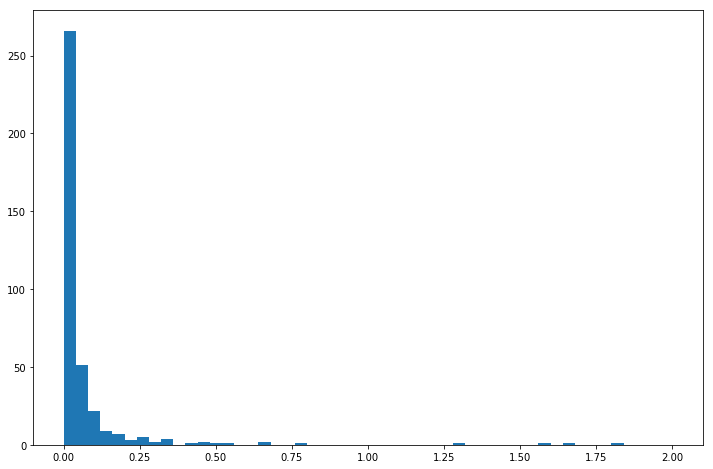

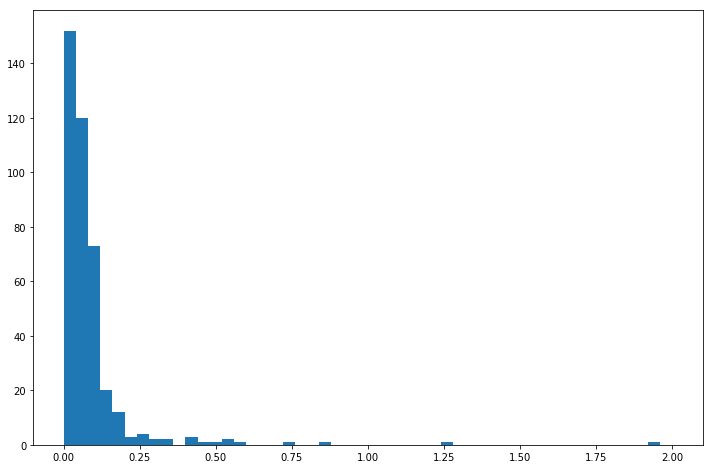

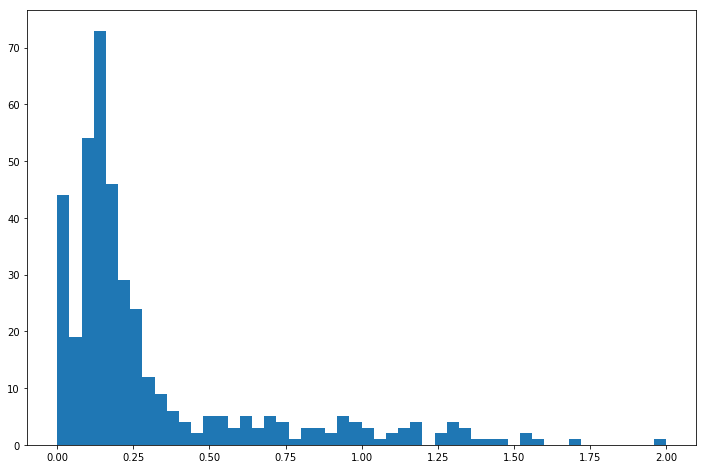

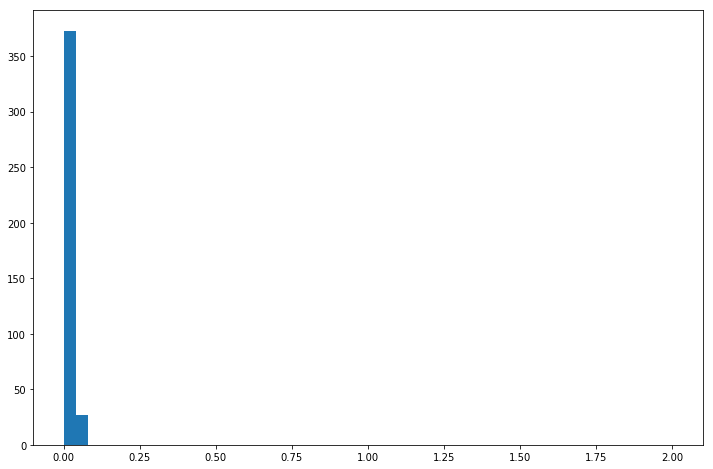

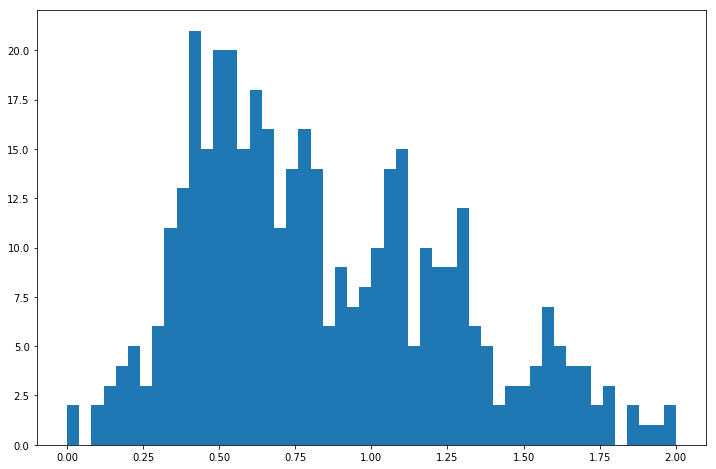

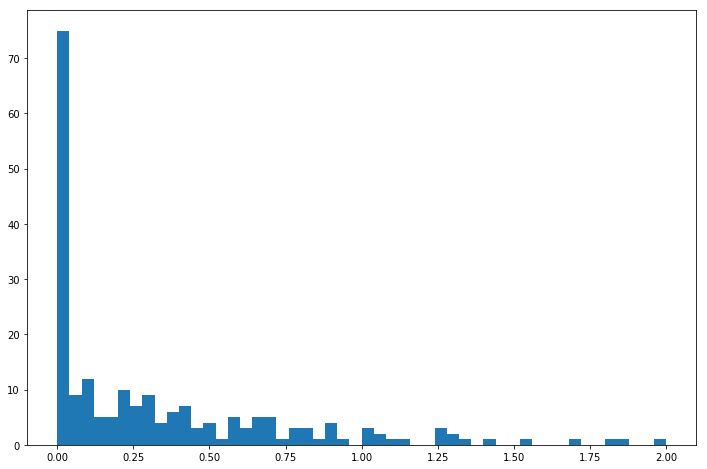

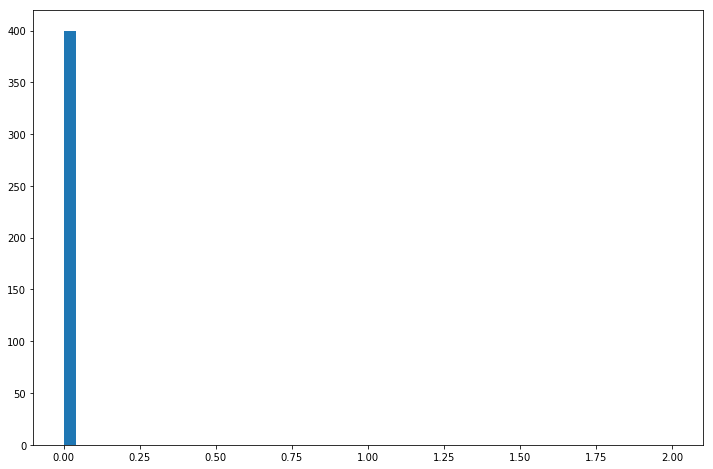

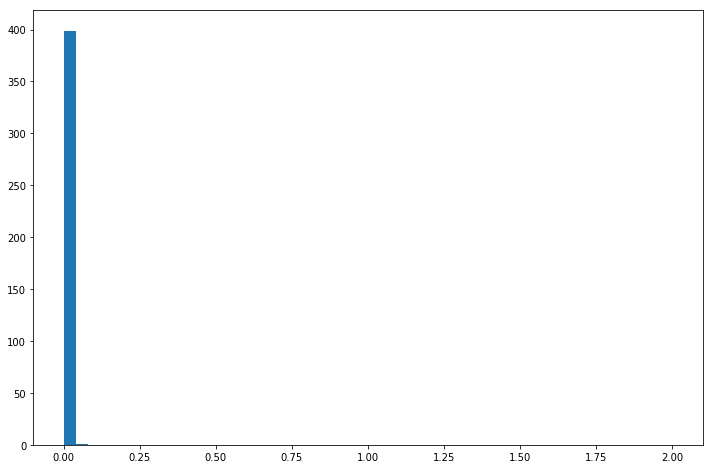

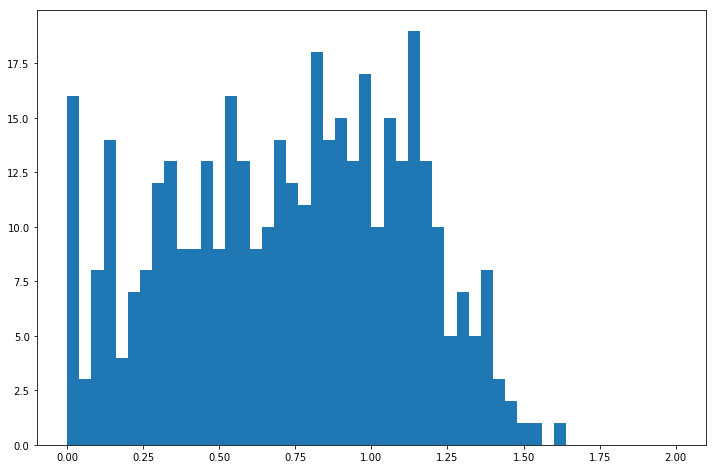

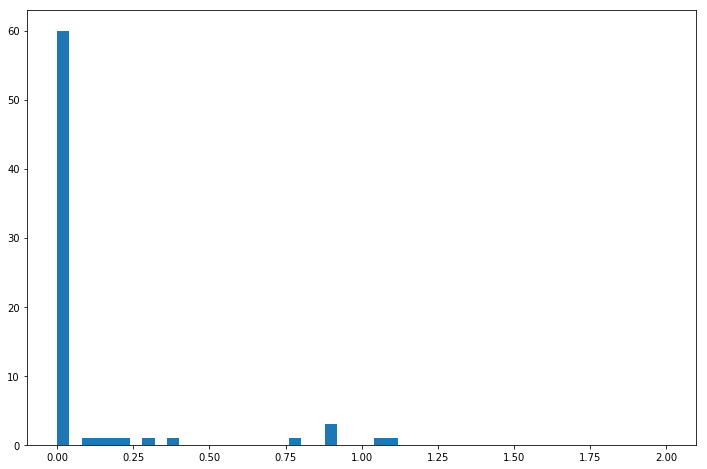

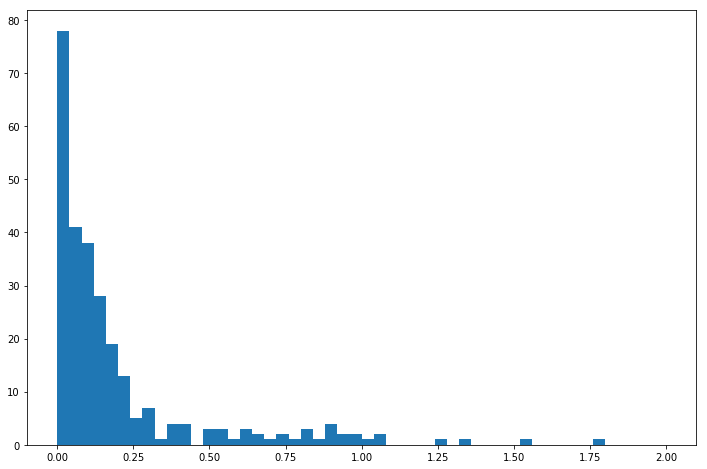

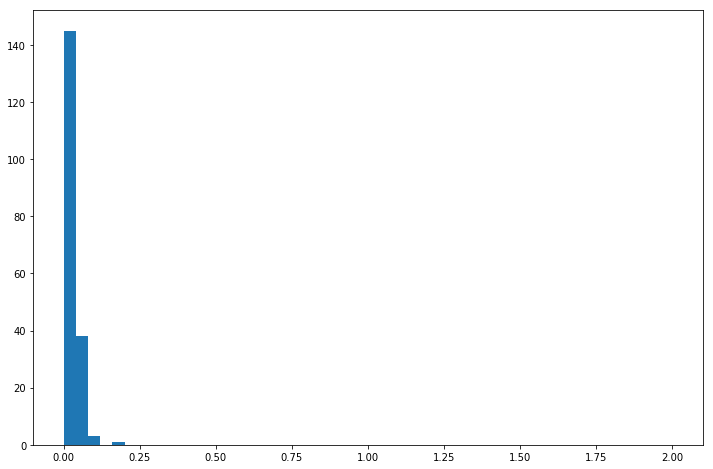

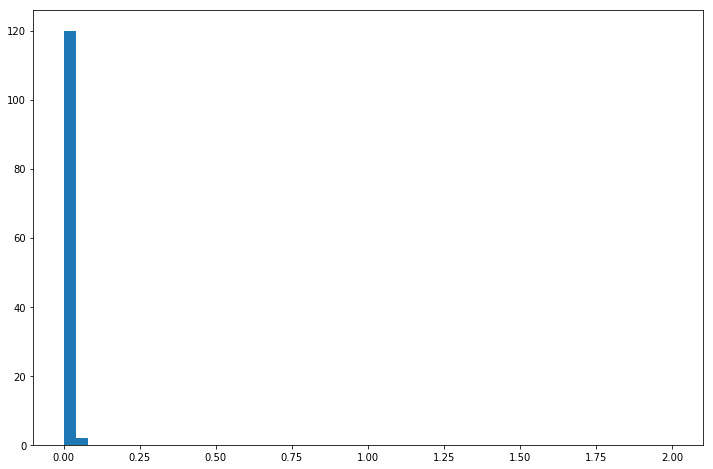

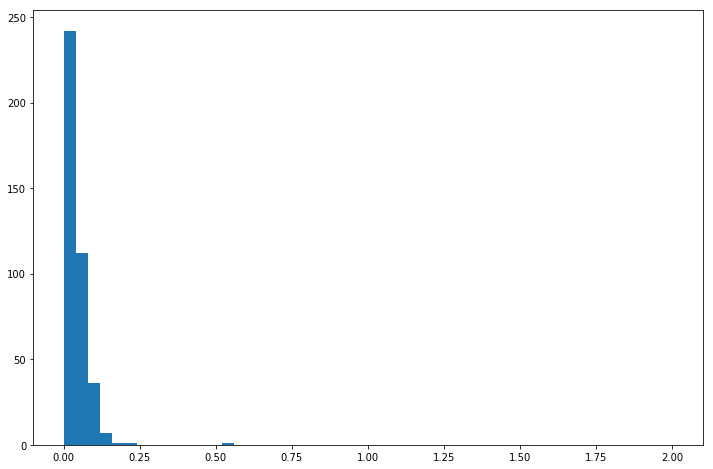

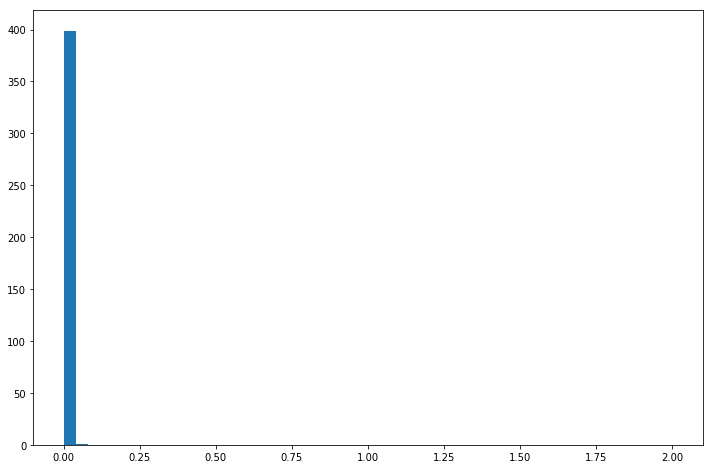

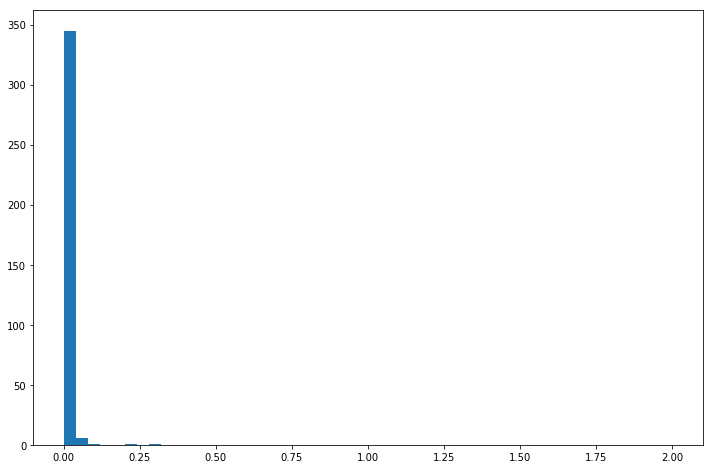

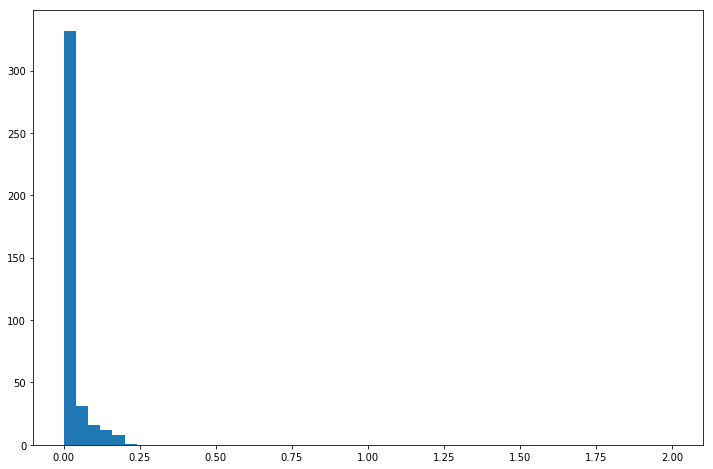

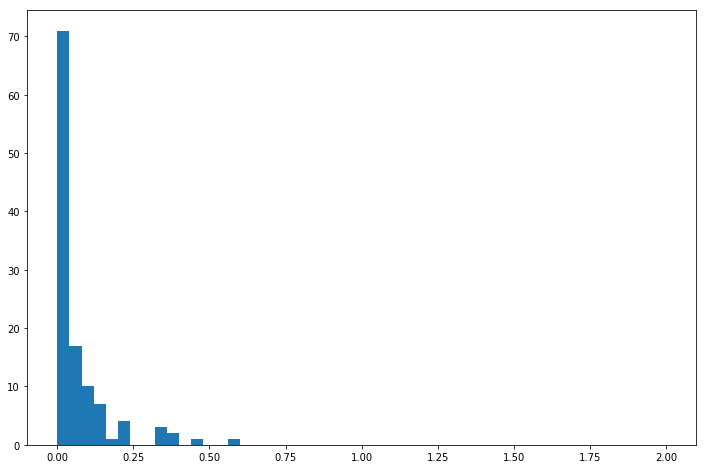

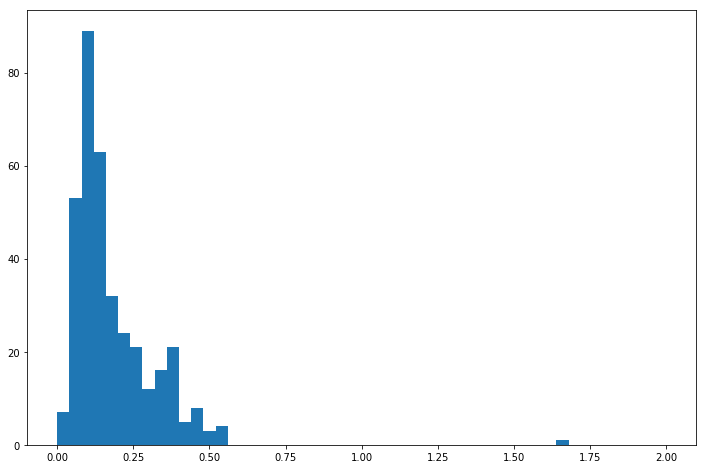

In [60]:
y_train_argmax = np.argmax(y_train, axis=1)

for i in range(70):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.hist(flu_train[y_train_argmax == i,0], bins=50, range=(0,2))
    fig.show()

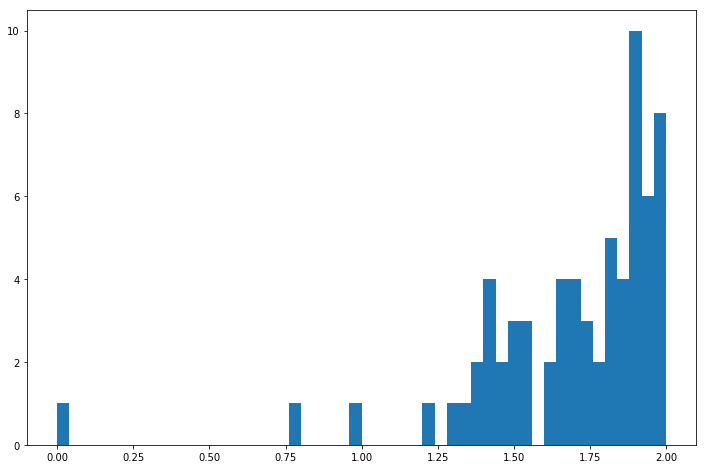

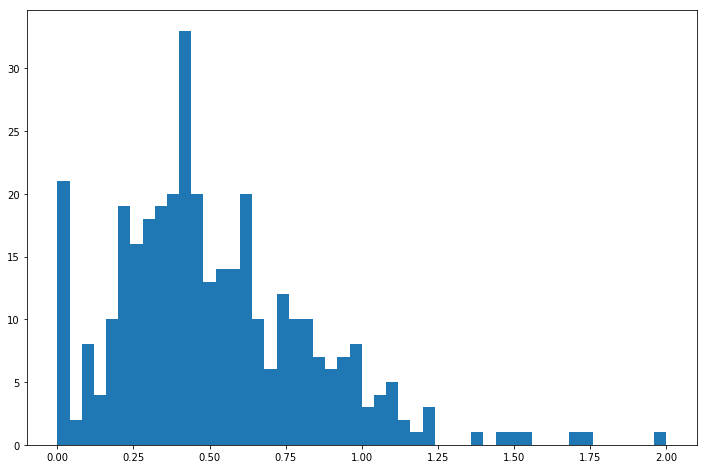

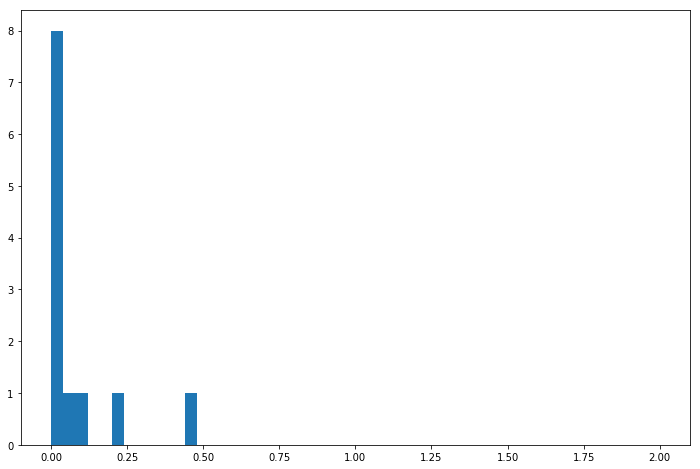

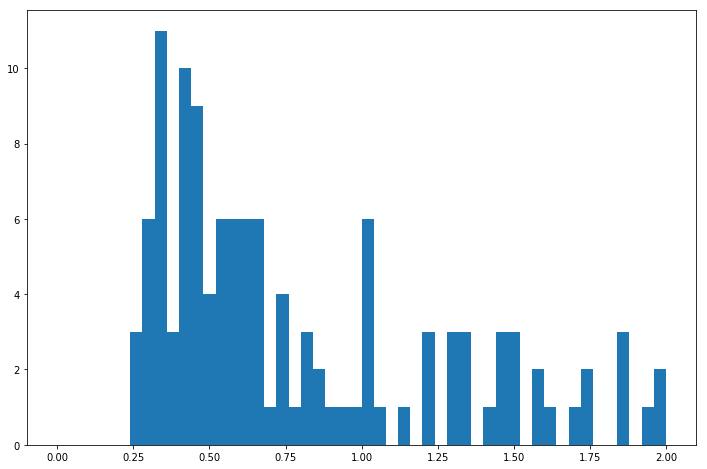

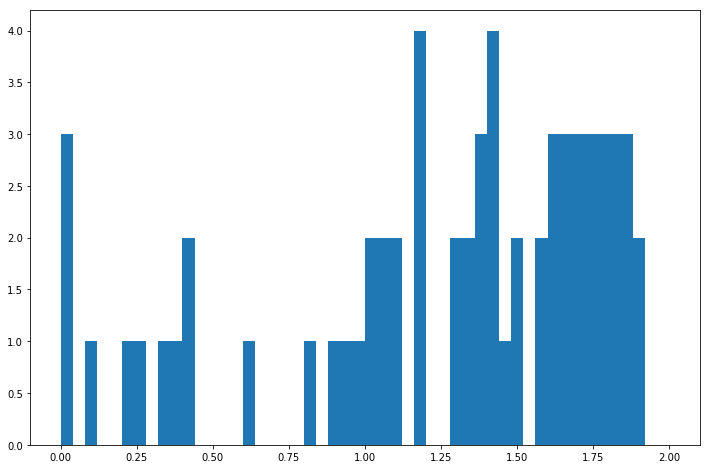

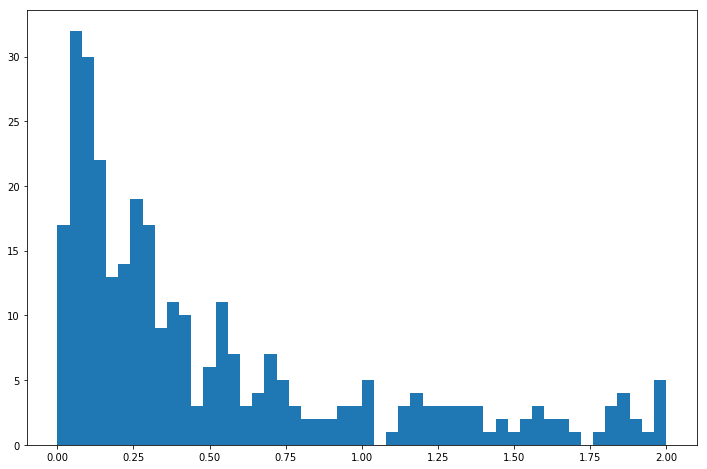

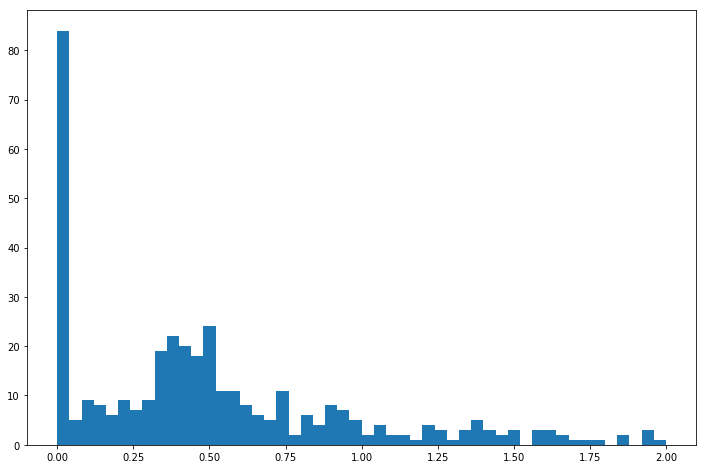

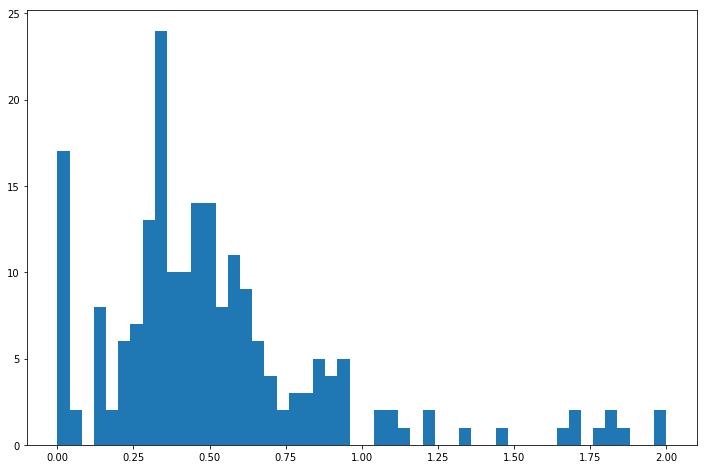

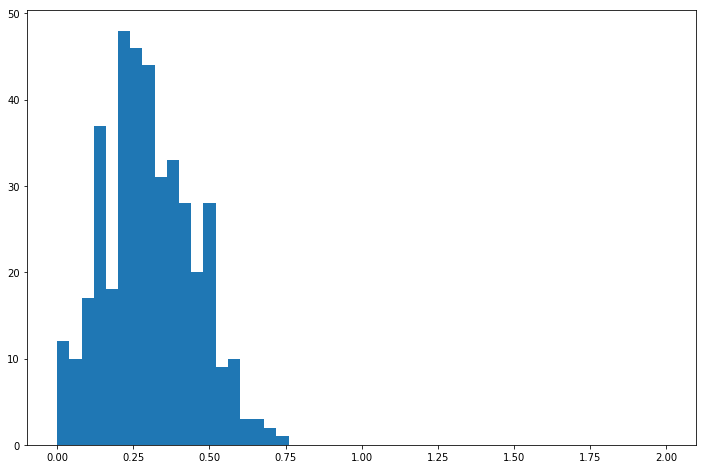

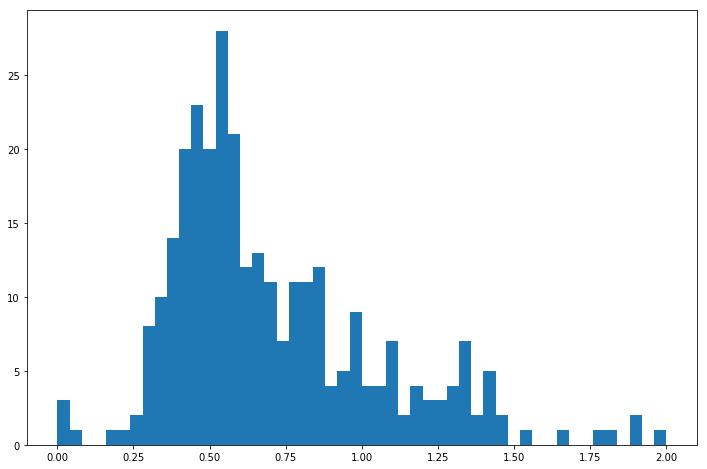

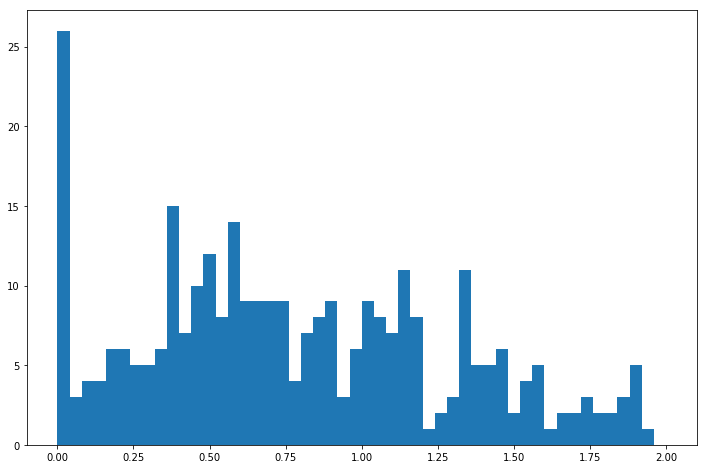

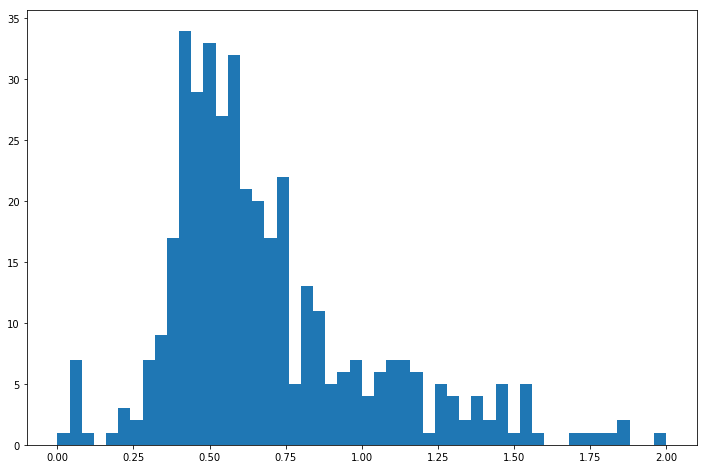

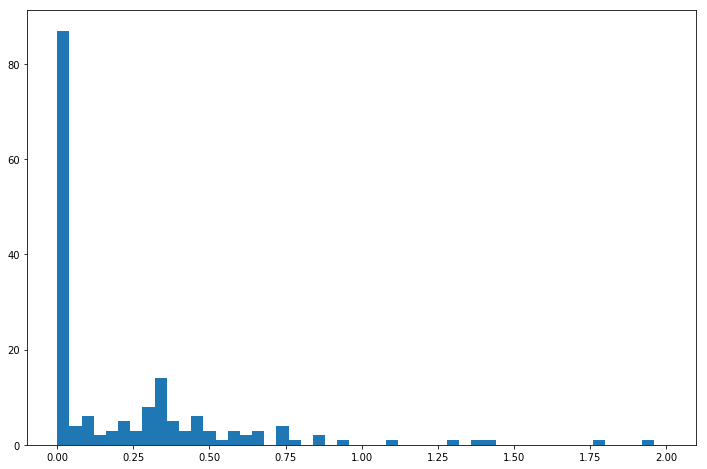

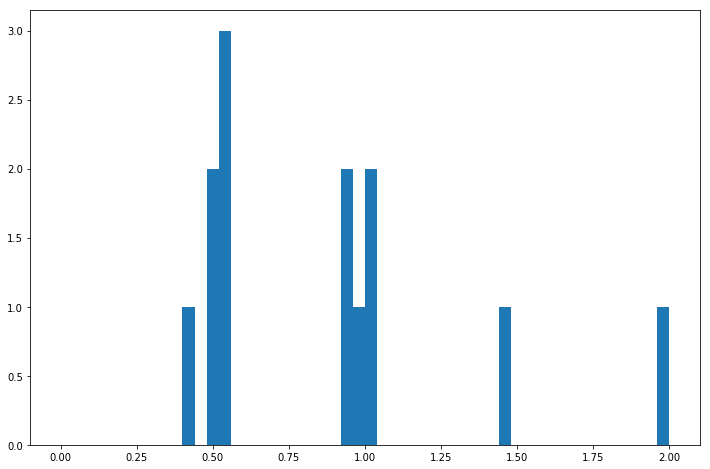

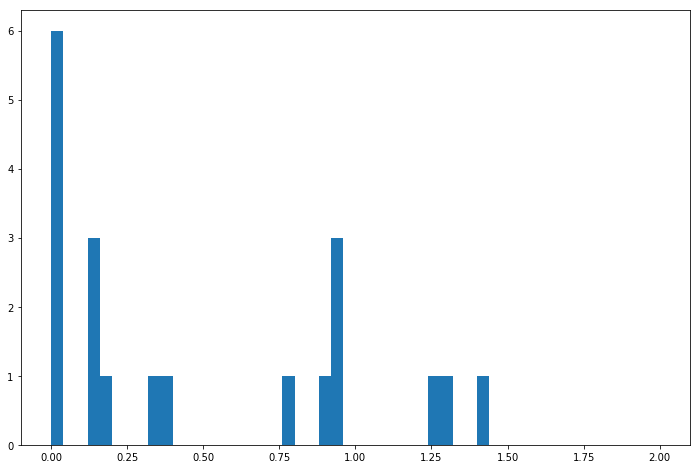

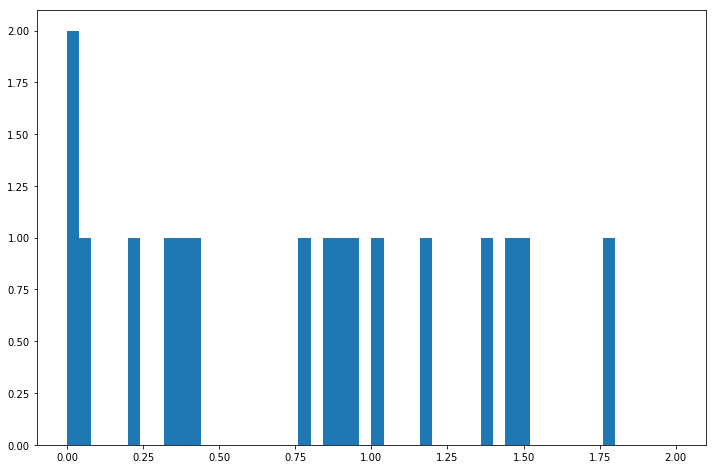

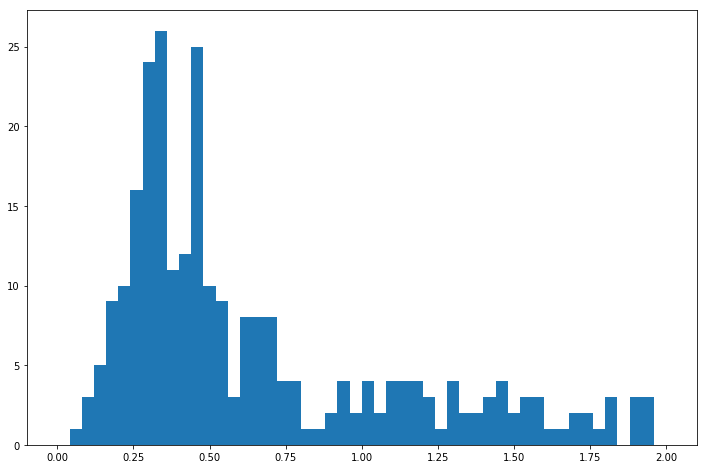

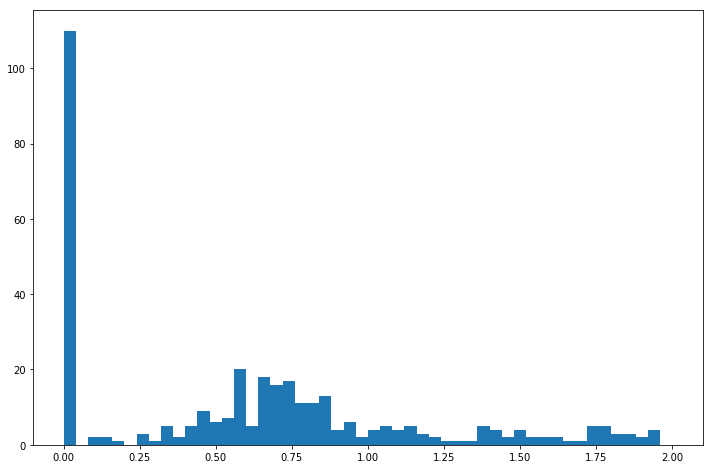

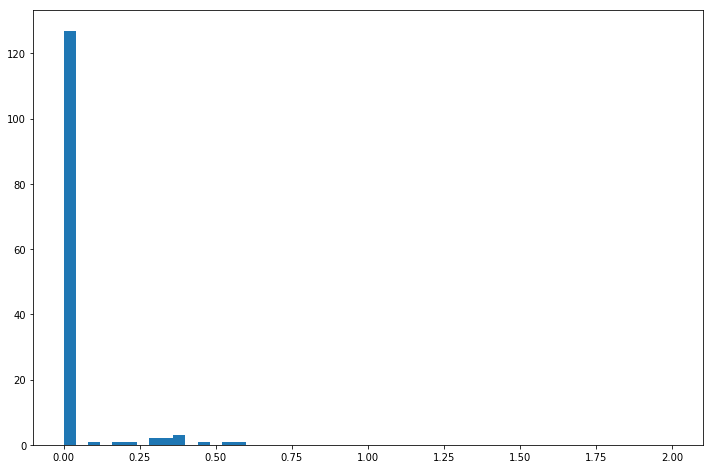

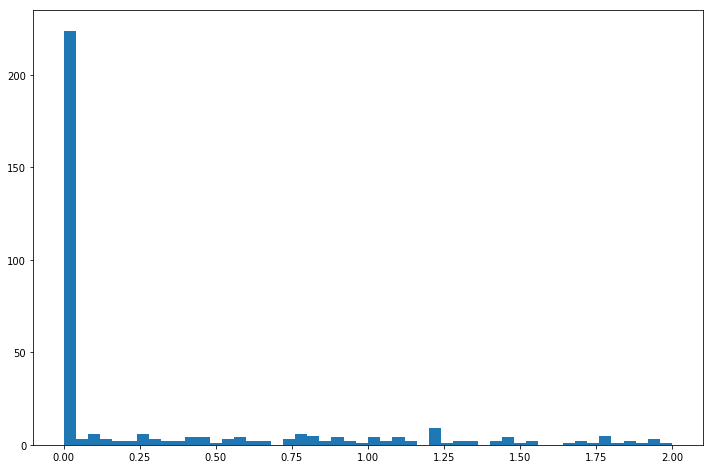

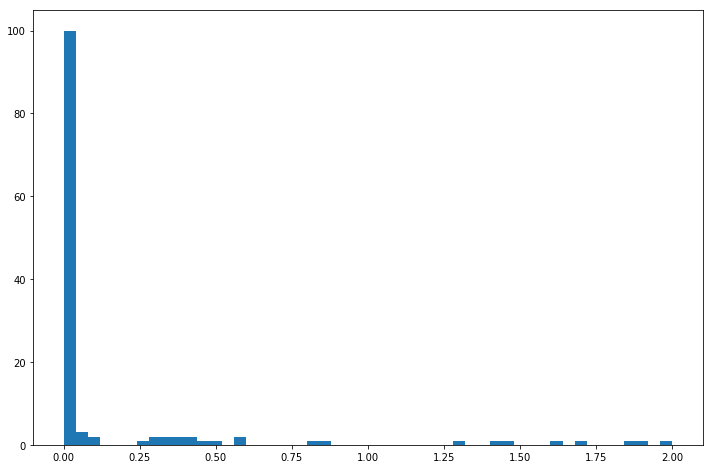

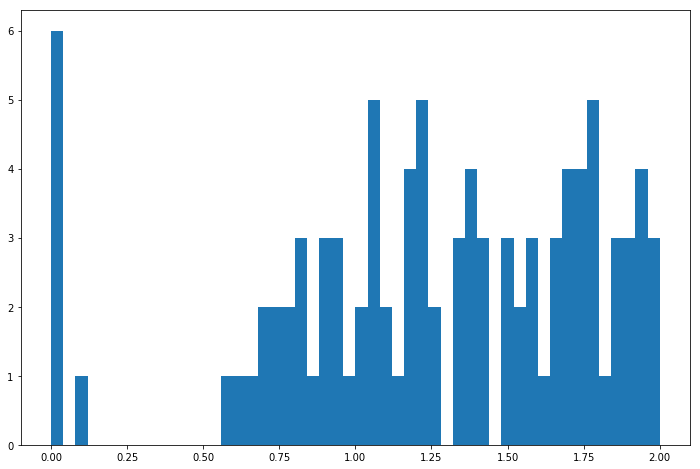

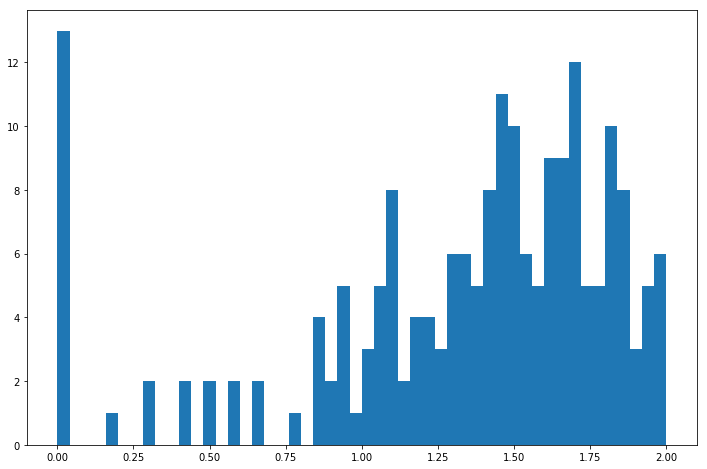

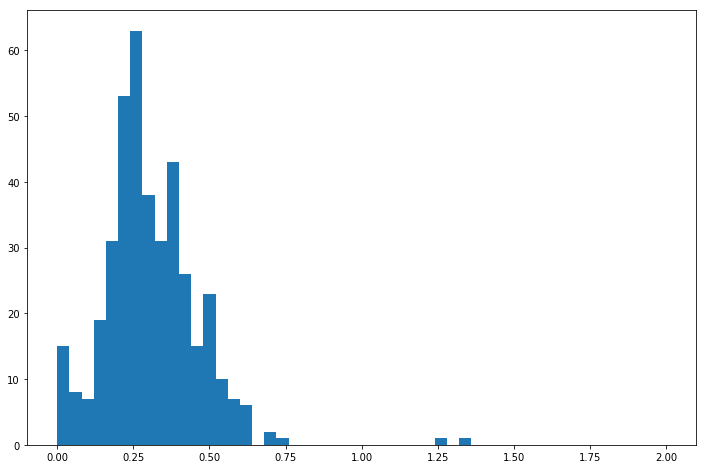

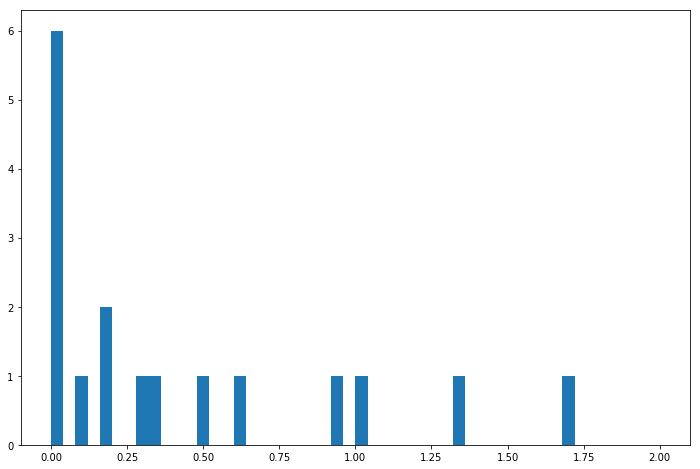

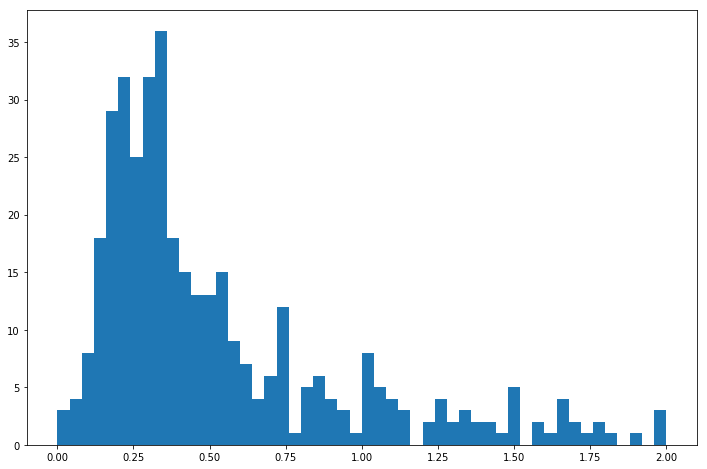

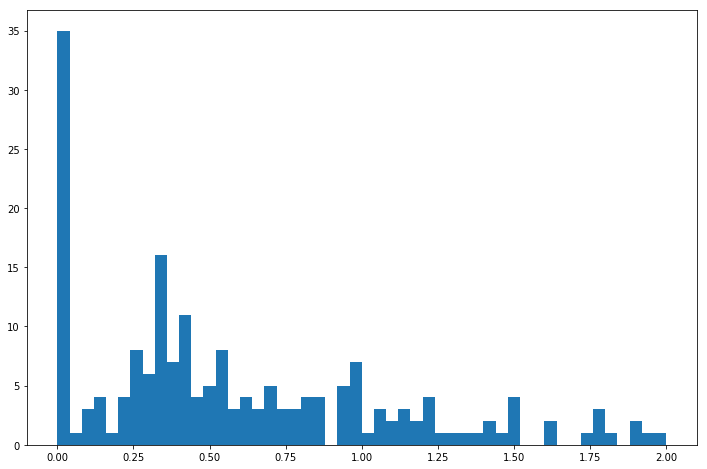

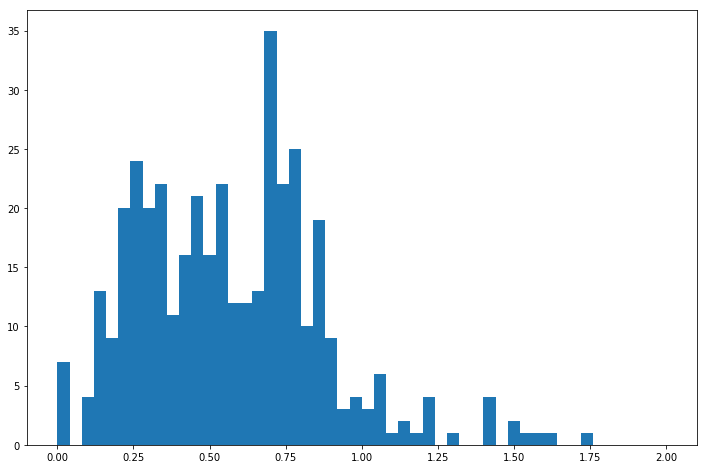

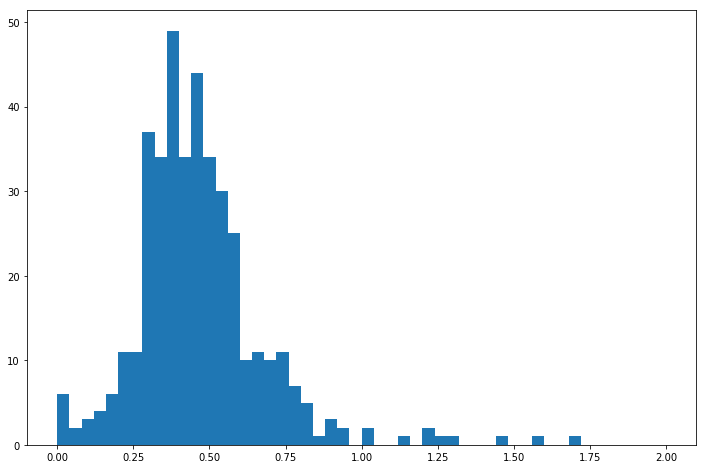

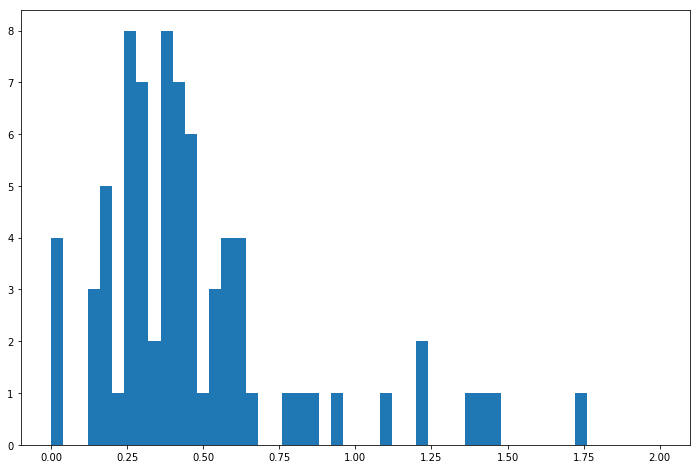

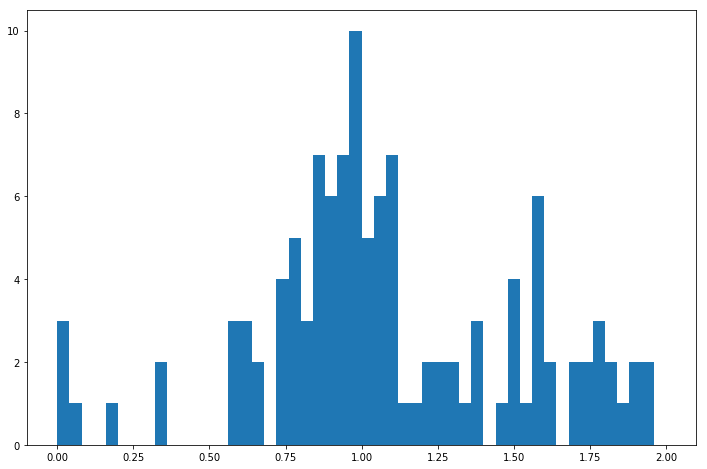

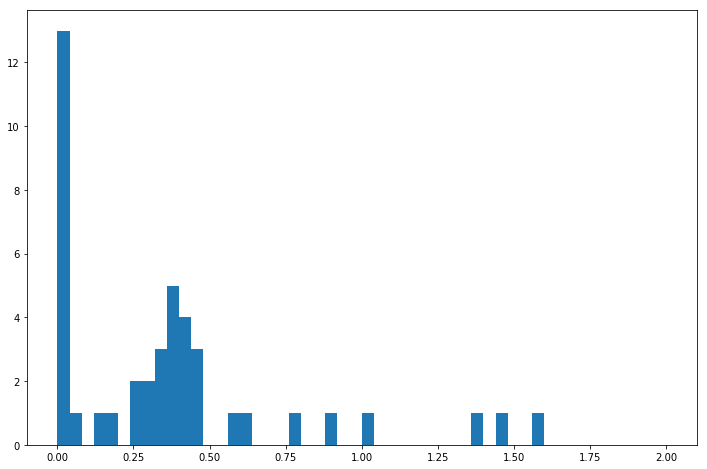

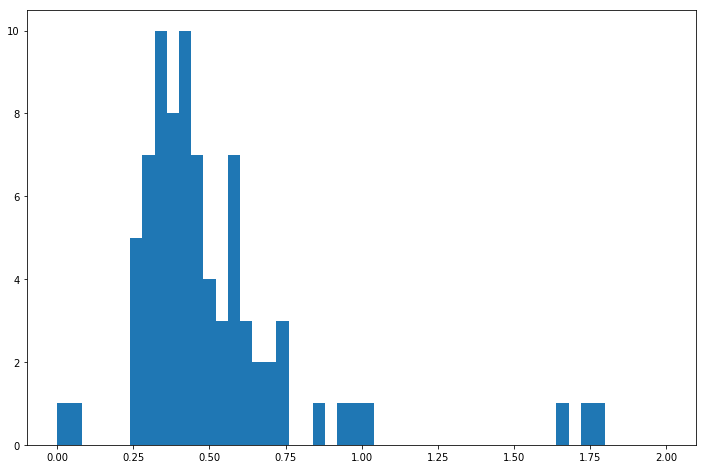

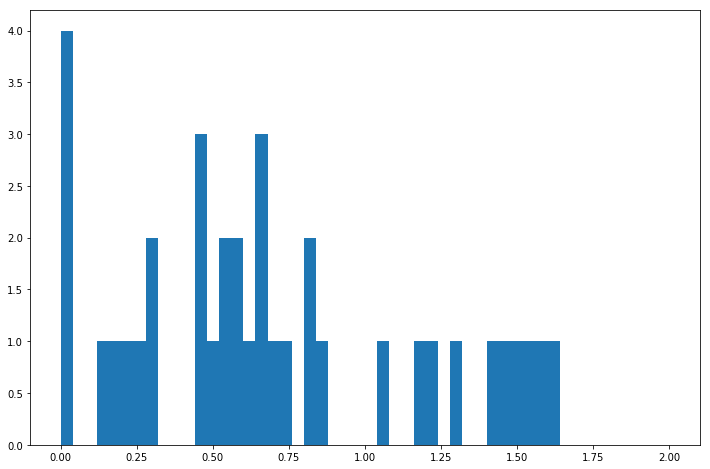

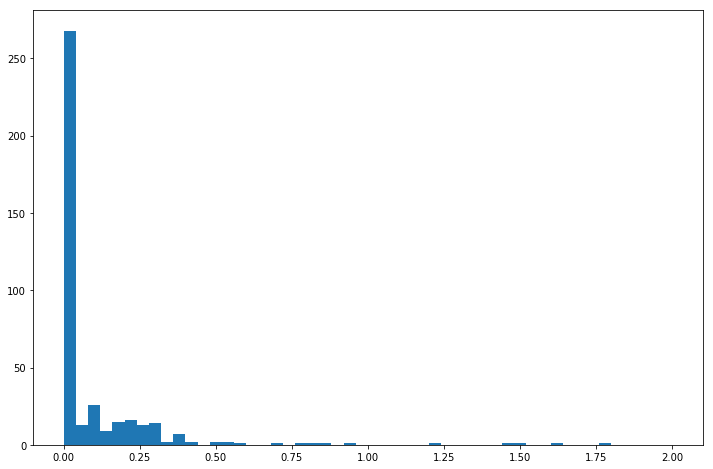

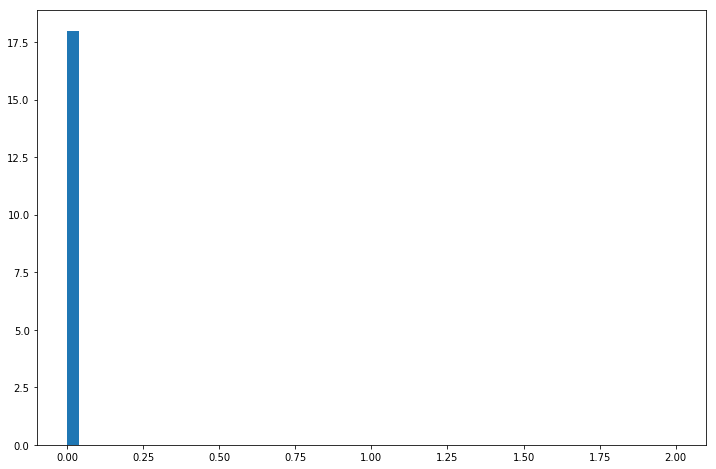

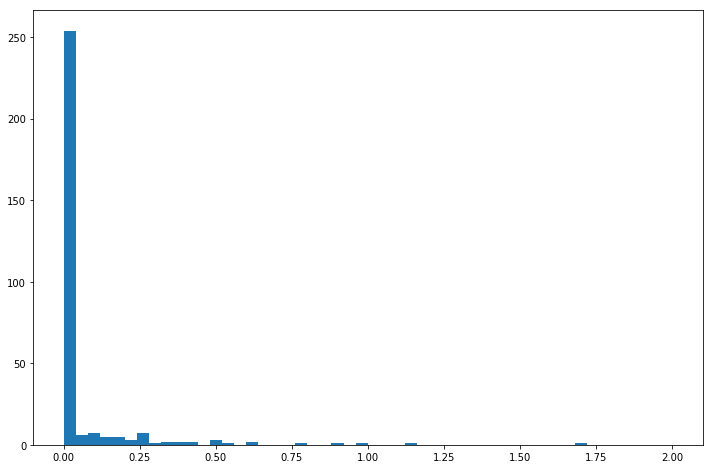

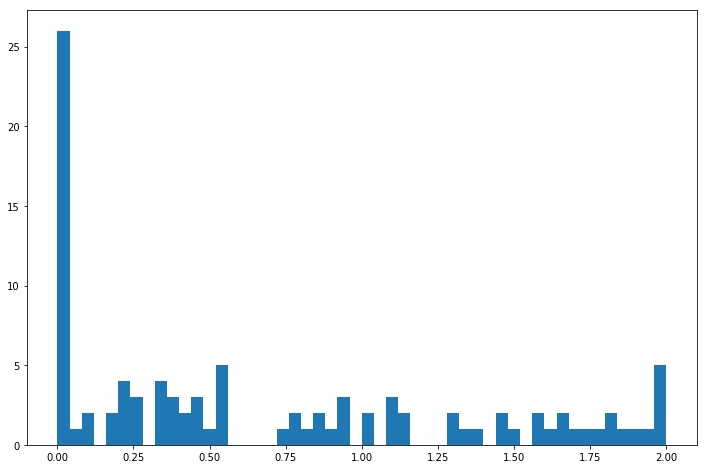

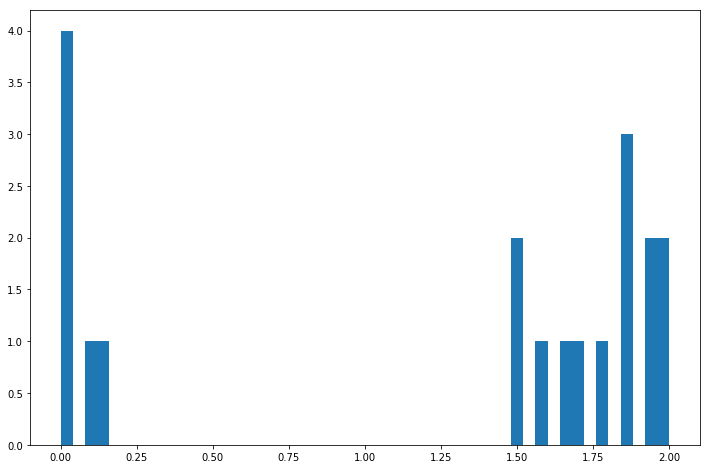

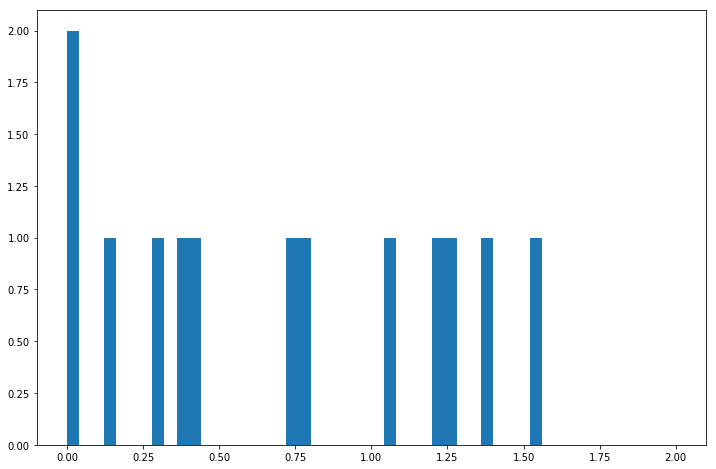

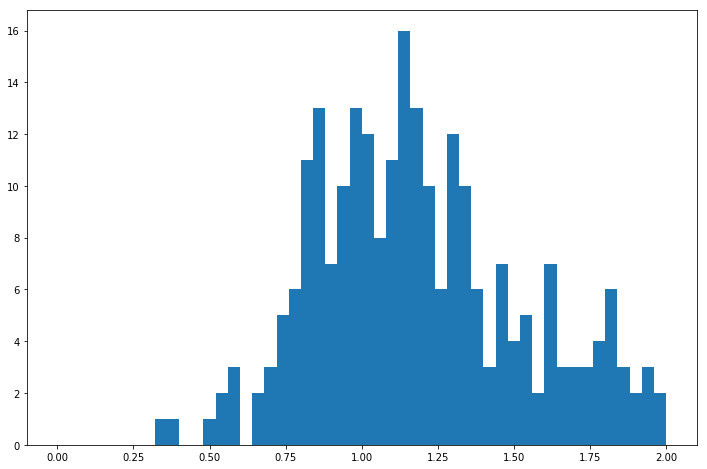

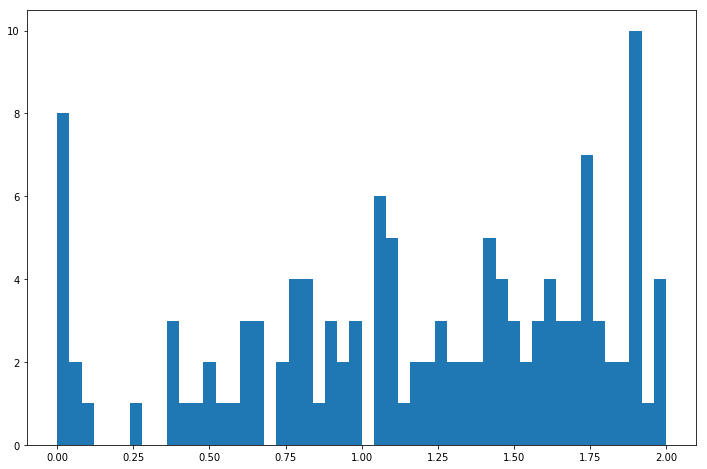

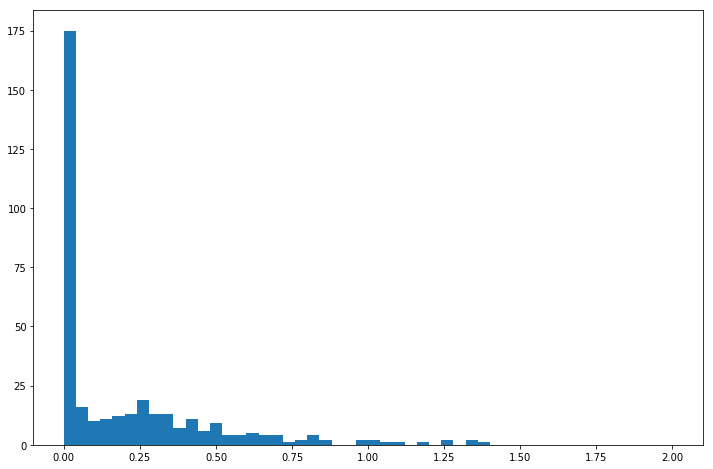

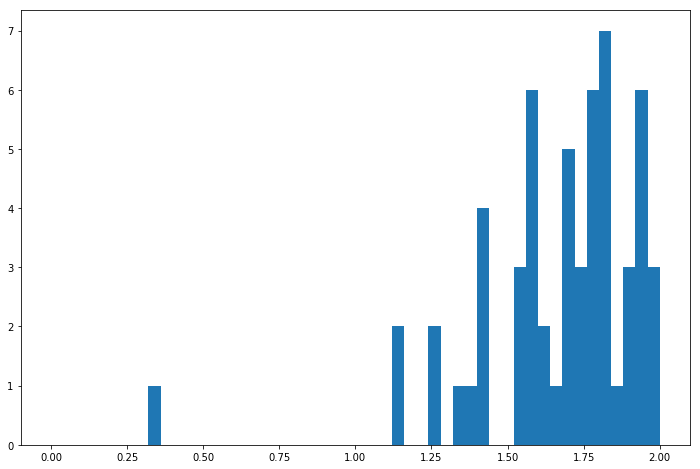

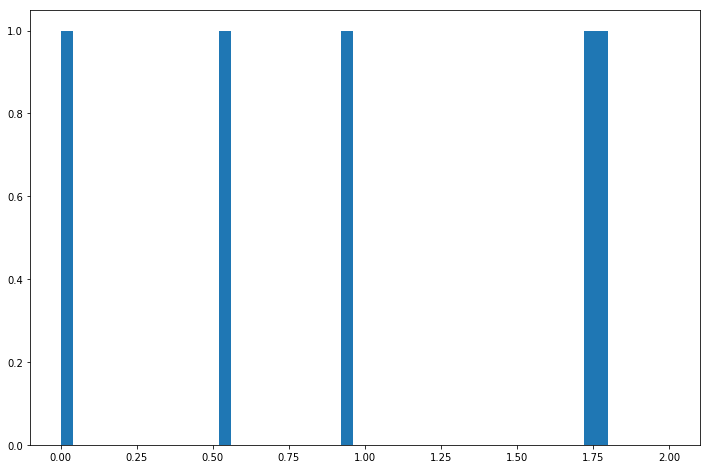

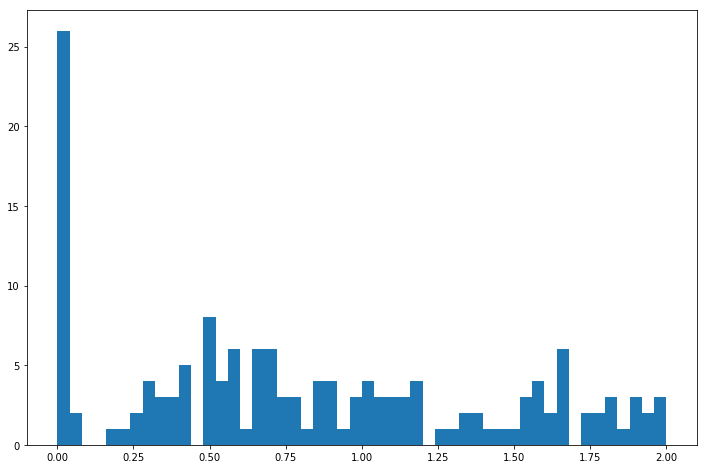

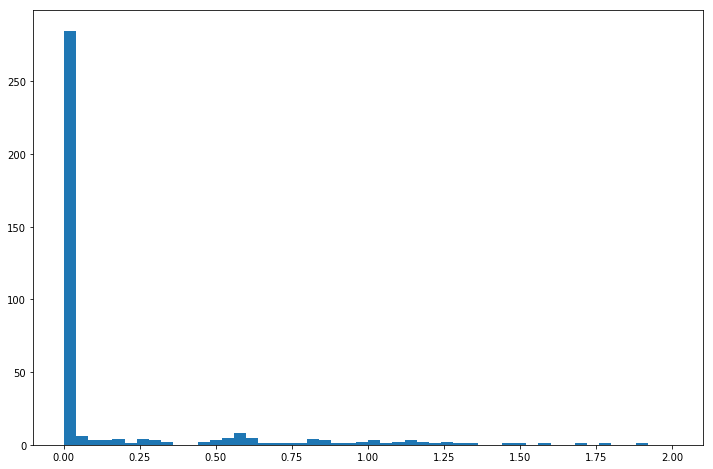

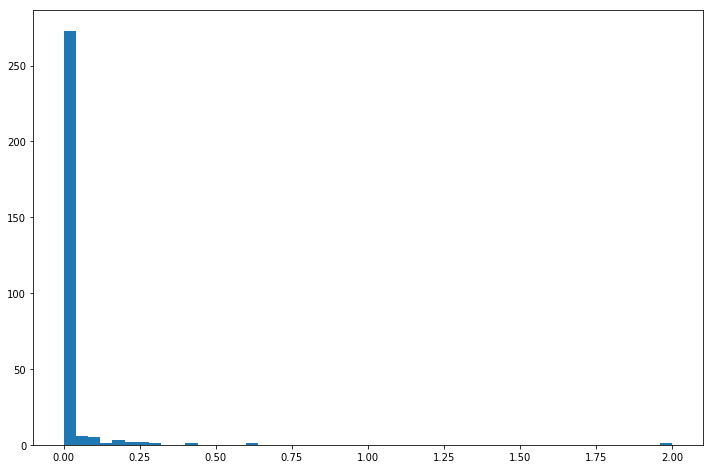

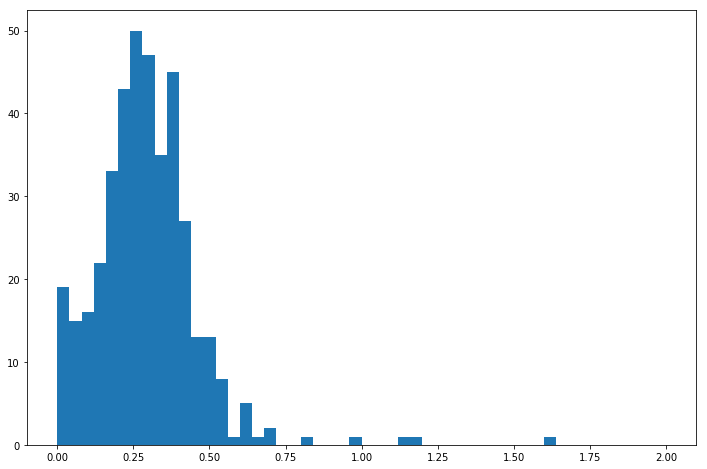

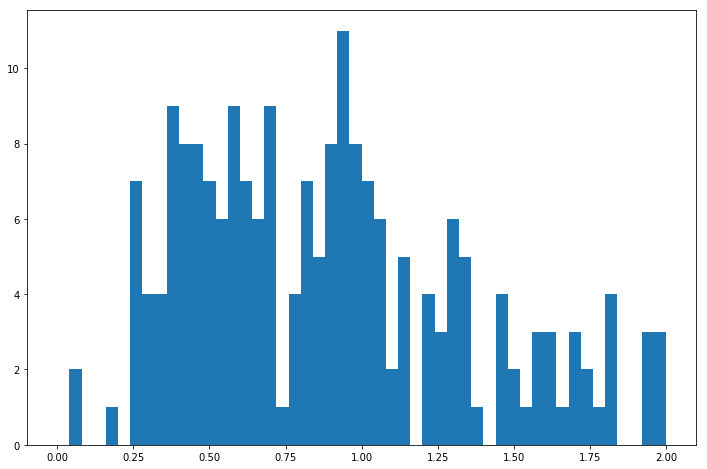

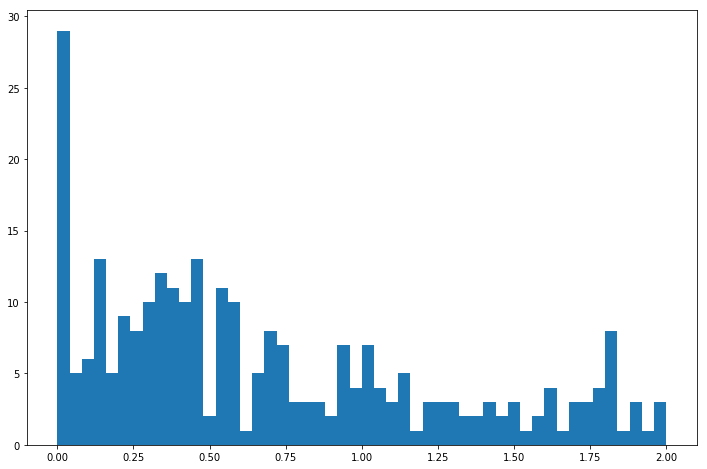

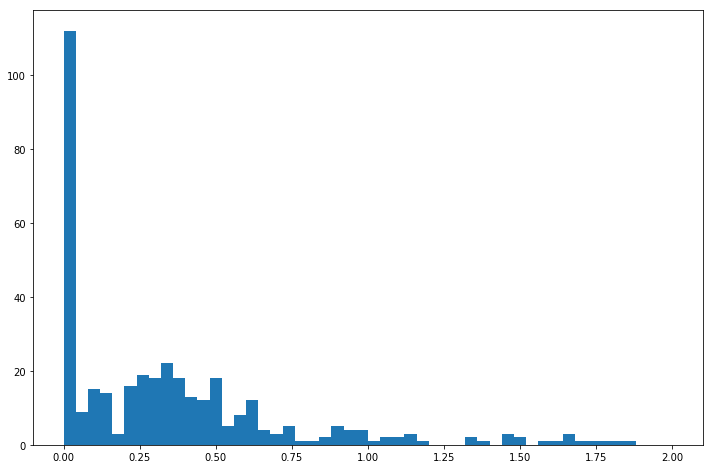

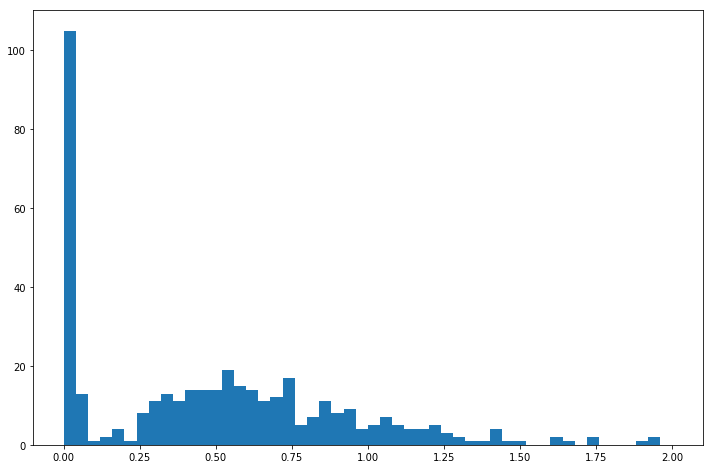

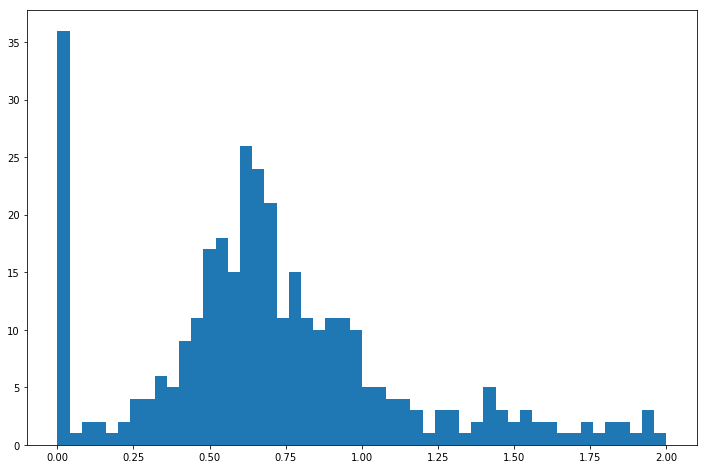

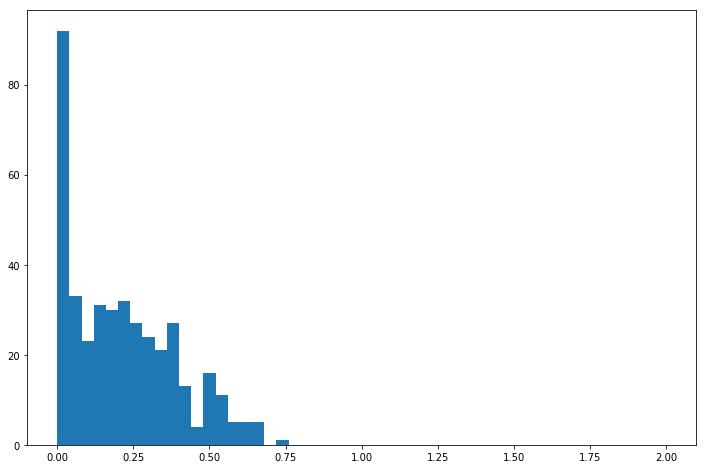

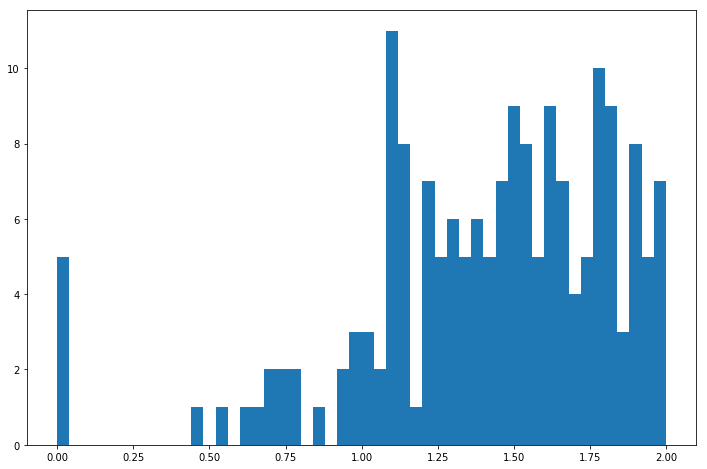

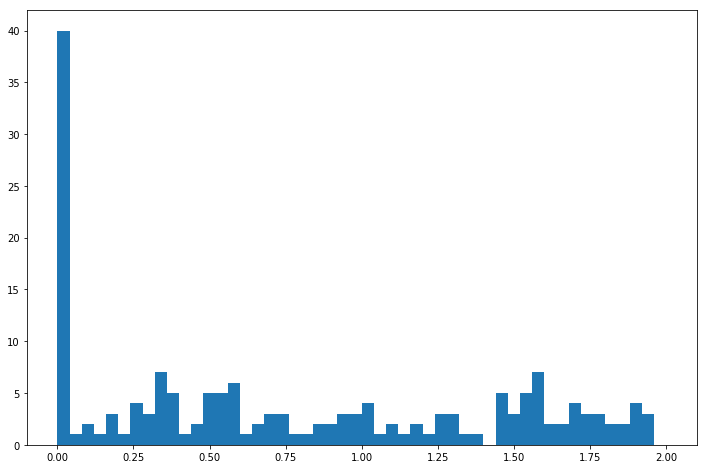

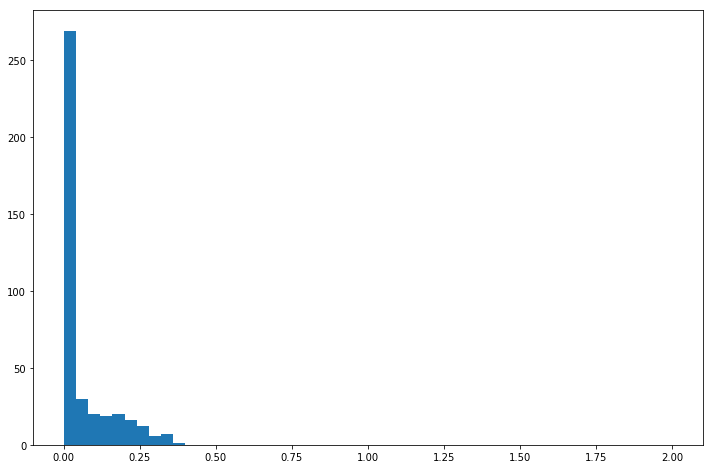

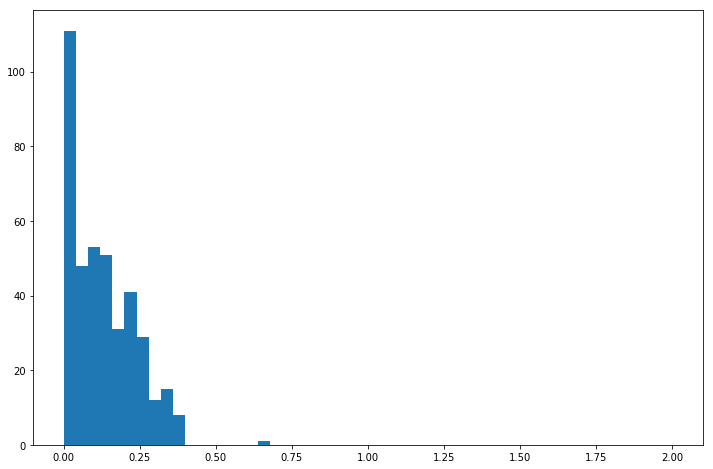

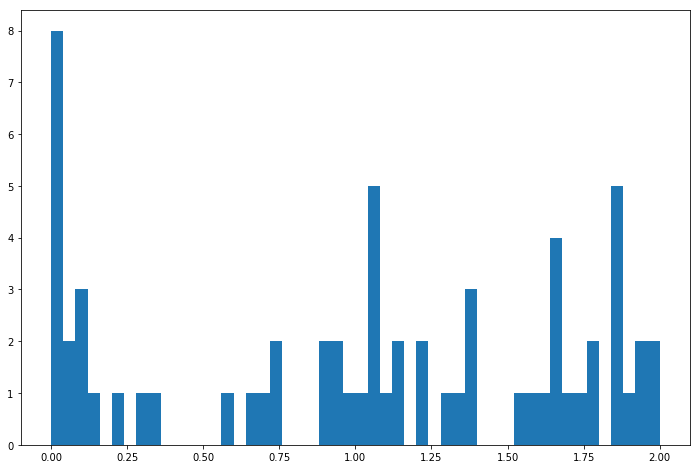

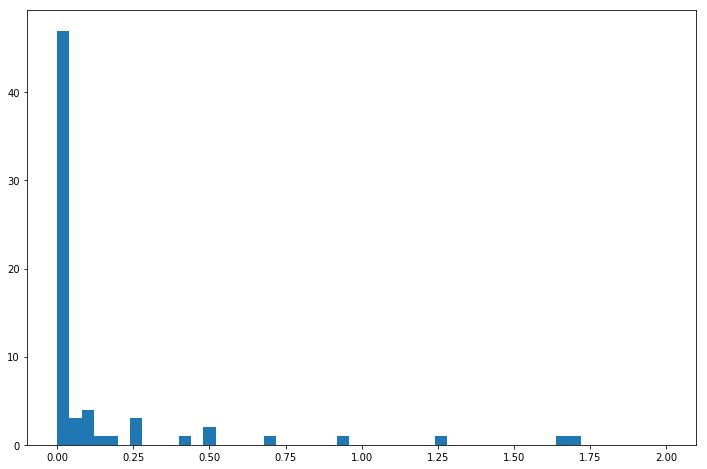

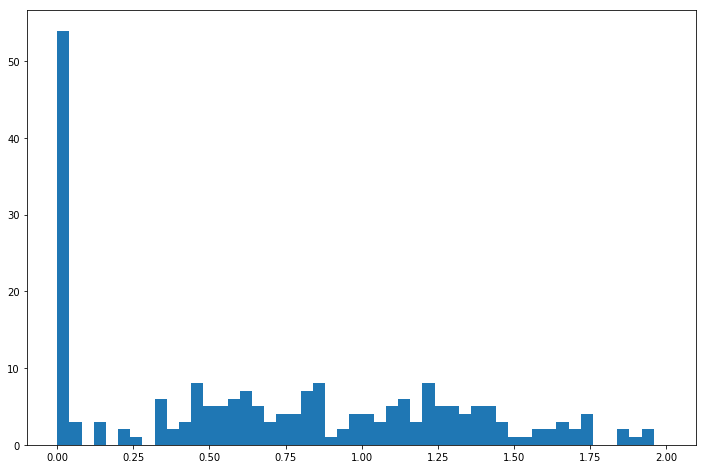

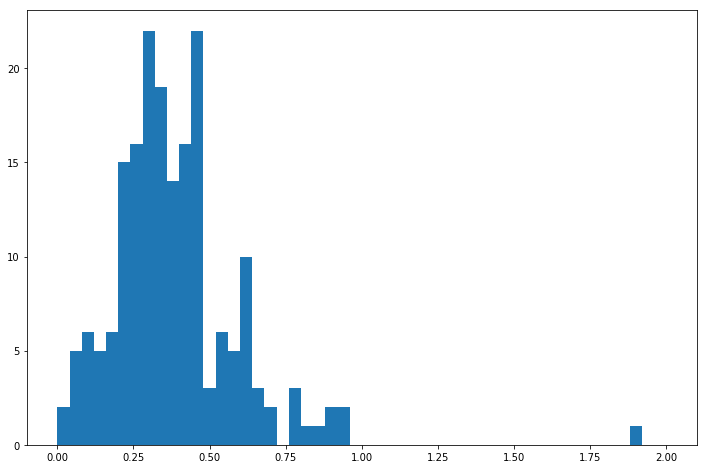

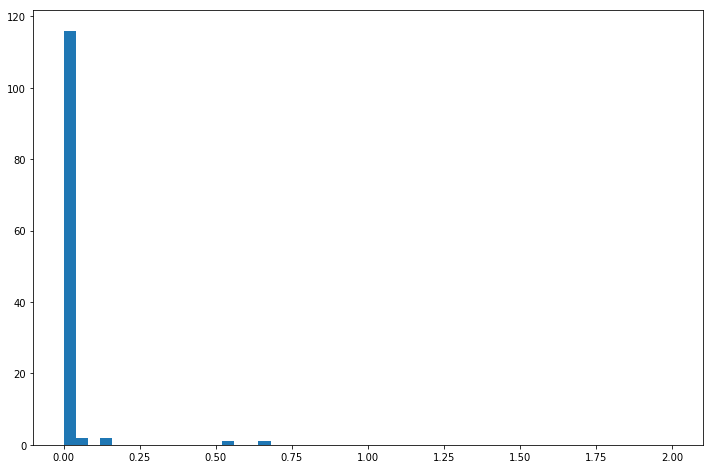

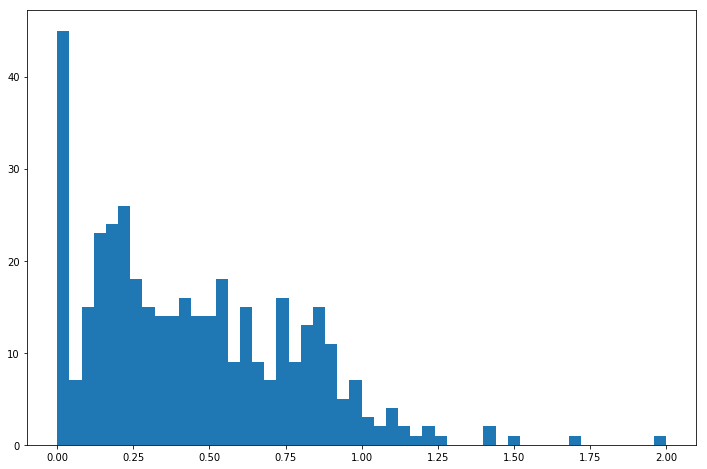

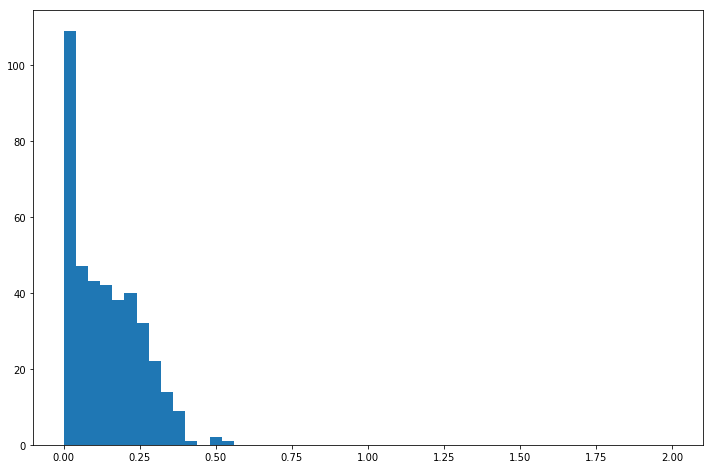

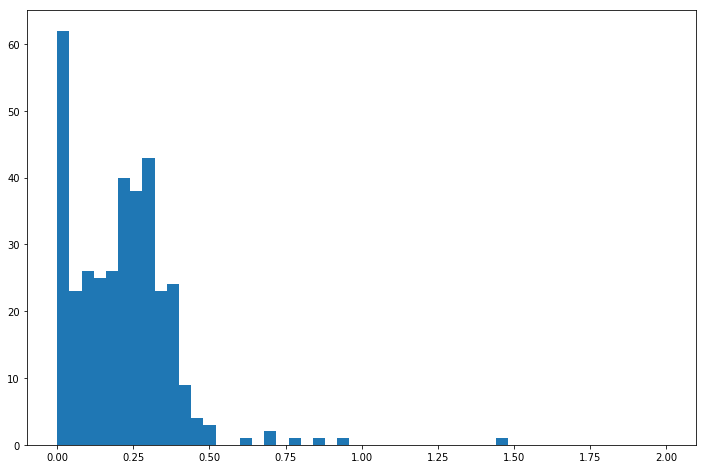

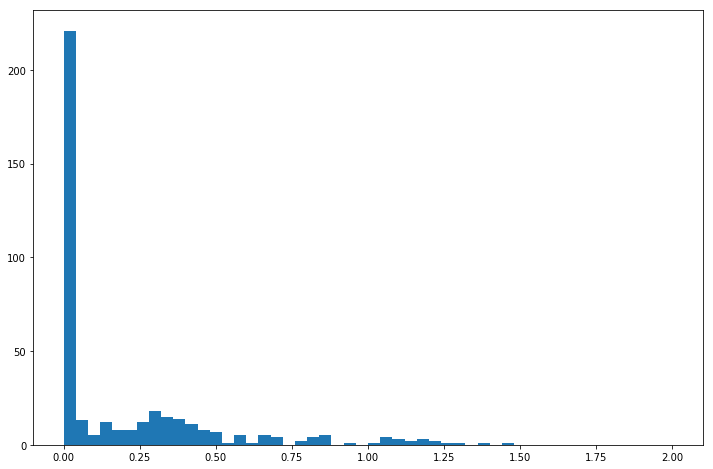

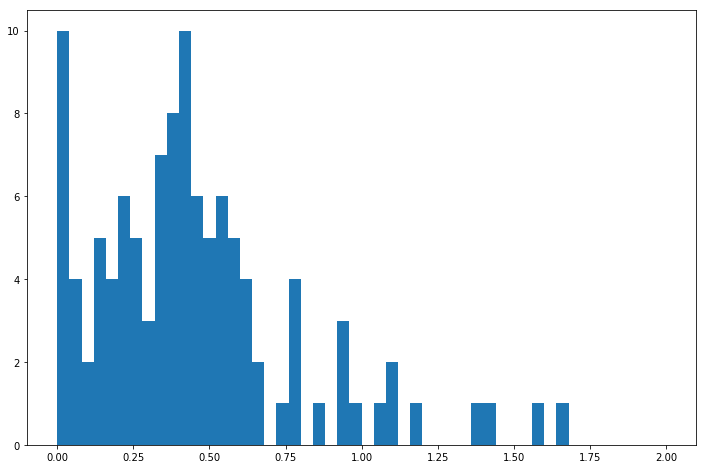

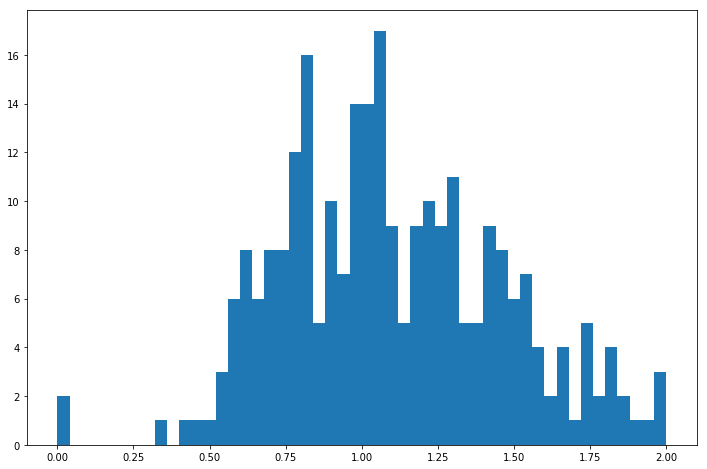

In [61]:
y_train_argmax = np.argmax(y_train, axis=1)

for i in range(70):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.hist(flu_train[y_train_argmax == i,1], bins=50, range=(0,2))
    fig.show()

In [62]:
import random

y_train_argmax = np.argmax(y_train, axis=1)

#train_count = int((1-test_size) * max_count)
train_count = max_count

# take the image and augment it and add it to a stack and add the label to another stack and the concat them to the main stacks
class_labels, count_of_classes = np.unique(y_train_argmax, return_counts=True)
list_of_all_images = []
list_of_all_flu_data = []
list_of_all_labs = []
for l, c in enumerate(count_of_classes):
    #print(l)
    list_of_class_images = []
    list_of_class_labs = []
    list_of_class_flu_data = []
    if c < train_count:
        num_to_aug = train_count - c
        all_im_of_class = X_train[y_train_argmax == l]
        all_flu_of_class = flu_train[y_train_argmax == l]
        for i in range(0,num_to_aug):
            im_idx = random.randint(0, all_im_of_class.shape[0]-1)
            im = all_im_of_class[im_idx,:,:,:]
            flu = all_flu_of_class[im_idx,:]
            im = seq(image=im)
            flu = flu*random.uniform(0.9, 1.1)
            list_of_class_images.append(im)
            list_of_class_labs.append(l)
            list_of_class_flu_data.append(flu)
    list_of_all_images = list_of_all_images + list_of_class_images
    list_of_all_labs = list_of_all_labs + list_of_class_labs
    list_of_all_flu_data = list_of_all_flu_data + list_of_class_flu_data

In [63]:
list_of_all_labs = np.array(list_of_all_labs)
one_hot = np.zeros((list_of_all_labs.size, list_of_all_labs.max()+1))
one_hot[np.arange(list_of_all_labs.size),list_of_all_labs] = 1
y_train.shape, one_hot.shape

((20807, 72), (15193, 72))

In [64]:
# add these new images into the training data
X_train = np.concatenate((X_train, np.array(list_of_all_images)), axis=0)
y_train = np.concatenate((y_train, one_hot))

In [65]:
list_of_all_flu_data = np.array(list_of_all_flu_data)
flu_train = np.concatenate((flu_train, list_of_all_flu_data), axis=0)

In [66]:
X_train.shape, flu_train.shape, y_train.shape

((36000, 150, 150, 1), (36000, 2), (36000, 72))

### Must normalize the data or training results are erratic!

In [67]:
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(136.06747, 40.88105, 135.42564, 40.977123)

In [68]:
np.mean(flu_train[:,0]), np.std(flu_train[:,0])

(0.4274285367991349, 0.8345324633055952)

In [69]:
np.mean(flu_train[:,1]), np.std(flu_train[:,1])

(1.1701387964586456, 1.2552133563615204)

In [70]:
X_train = X_train / 130
X_test = X_test / 130
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(1.0466782, 0.3144684, 1.0417372, 0.31520844)

In [71]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0., 1.]), array([2556000,   36000])),
 (array([0., 1.], dtype=float32), array([369342,   5202])))

#### shuffle input data

In [72]:
from sklearn.utils import shuffle
X_train, flu_train, y_train = shuffle(X_train, flu_train, y_train)

In [73]:
input_shape = X_train.shape[1:]
flu_input_shape = flu_train.shape[1:]
batch_size = 40

epochs = 50

input_shape, flu_input_shape

((150, 150, 1), (2,))

In [74]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

### Medium Complexity Model

In [75]:
inputs = Input(shape=input_shape)
input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model([inputs,input_flu], output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 148, 148, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 74, 74, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout (D

In [76]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.10,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.10,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=True,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)
    
# # Compute quantities required for feature-wise normalization
# # (std, mean, and principal components if ZCA whitening is applied).
# datagen.fit(X_train)

# datagen_flu = ImageDataGenerator()
    
# # Compute quantities required for feature-wise normalization
# # (std, mean, and principal components if ZCA whitening is applied).
# datagen.fit(X_train)
# datagen_flu.fit(flu_train)

# def generator_two_inputs(X_train, flu_train, y_train, batch_size):
#     genX1 = datagen.flow(X_train, y_train,  batch_size=batch_size)
#     genX2 = datagen_flu.flow(flu_train, y, batch_size=batch_size)
#     while True:
#         X1i = genX1.next()
#         X2i = genX2.next()
#         yield [X1i[0], X2i[0]], X1i[1]

In [77]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# checkpoint = ModelCheckpoint('../model_weights_all_classes.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


# # Fit the model on the batches generated by datagen.flow().
# model.compile(loss=keras.losses.categorical_crossentropy,
#           optimizer=keras.optimizers.Adadelta(),
#           metrics=['accuracy'])

# history = model.fit_generator(
#         datagen.flow(X_train, y_train, batch_size=batch_size),
#         epochs=epochs,
#         verbose=1,
#         validation_data=(X_test, y_test),
#         callbacks=callbacks_list)

In [78]:
checkpoint = ModelCheckpoint('../model_weights_all_classes_flu_iteration3.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit(x=[X_train, flu_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test,flu_test], y_test),
                    callbacks=callbacks_list)

Train on 36000 samples, validate on 5202 samples
Epoch 1/50
35960/36000 [============================>.] - ETA: 0s - loss: 2.9861 - acc: 0.2373
Epoch 00001: val_acc improved from -inf to 0.62784, saving model to ../model_weights_all_classes_flu_iteration3.hdf5
36000/36000 [==============================] - 42s 1ms/step - loss: 2.9852 - acc: 0.2374 - val_loss: 1.4117 - val_acc: 0.6278
Epoch 2/50
35960/36000 [============================>.] - ETA: 0s - loss: 1.4030 - acc: 0.6042
Epoch 00002: val_acc improved from 0.62784 to 0.76432, saving model to ../model_weights_all_classes_flu_iteration3.hdf5
36000/36000 [==============================] - 39s 1ms/step - loss: 1.4028 - acc: 0.6044 - val_loss: 0.8688 - val_acc: 0.7643
Epoch 3/50
35960/36000 [============================>.] - ETA: 0s - loss: 0.9871 - acc: 0.7180
Epoch 00003: val_acc improved from 0.76432 to 0.78700, saving model to ../model_weights_all_classes_flu_iteration3.hdf5
36000/36000 [==============================] - 41s 1ms/st

Epoch 28/50
35960/36000 [============================>.] - ETA: 0s - loss: 0.2083 - acc: 0.9373
Epoch 00028: val_acc did not improve from 0.86409
36000/36000 [==============================] - 40s 1ms/step - loss: 0.2084 - acc: 0.9373 - val_loss: 0.7267 - val_acc: 0.8537
Epoch 29/50
35960/36000 [============================>.] - ETA: 0s - loss: 0.2090 - acc: 0.9381
Epoch 00029: val_acc did not improve from 0.86409
36000/36000 [==============================] - 40s 1ms/step - loss: 0.2090 - acc: 0.9382 - val_loss: 0.6864 - val_acc: 0.8627
Epoch 30/50
35960/36000 [============================>.] - ETA: 0s - loss: 0.2077 - acc: 0.9358
Epoch 00030: val_acc did not improve from 0.86409
36000/36000 [==============================] - 40s 1ms/step - loss: 0.2075 - acc: 0.9359 - val_loss: 0.6959 - val_acc: 0.8581
Epoch 31/50
35960/36000 [============================>.] - ETA: 0s - loss: 0.2081 - acc: 0.9379
Epoch 00031: val_acc did not improve from 0.86409
36000/36000 [=========================

In [79]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.10,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.10,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=True,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)
    
# # Compute quantities required for feature-wise normalization
# # (std, mean, and principal components if ZCA whitening is applied).
# datagen.fit(X_train)

# checkpoint = ModelCheckpoint('../model_weights_all_classes.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


# # Fit the model on the batches generated by datagen.flow().
# model.compile(loss=keras.losses.categorical_crossentropy,
#           optimizer=keras.optimizers.Adadelta(),
#           metrics=['accuracy'])

# history = model.fit_generator(
#         #datagen.flow(X_train, y_train, batch_size=batch_size),
#         generator_two_inputs(X_train, flu_train, y_train, batch_size),
#         epochs=epochs,
#         verbose=1,
#         validation_data=([X_test, flu_test], y_test),
#         callbacks=callbacks_list)

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


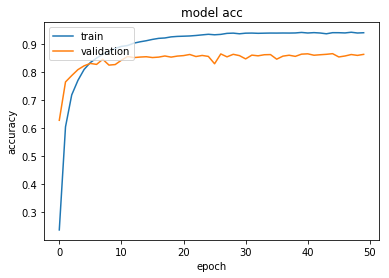

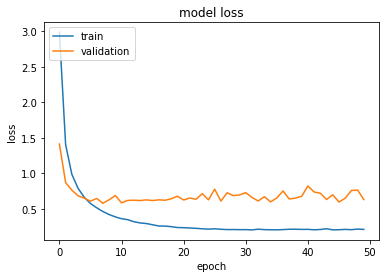

In [80]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

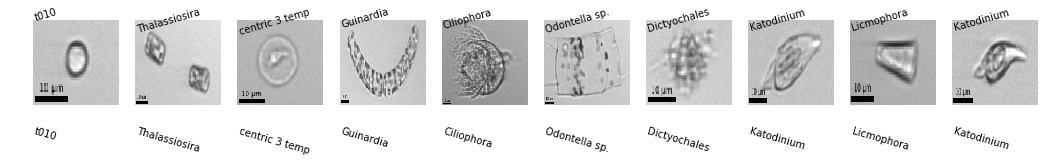

In [81]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

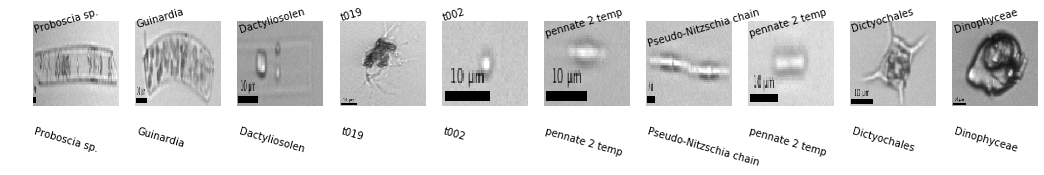

In [82]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [174]:
predictions = np.argmax(model.predict([X_test, flu_test]), axis=1)
labs = np.argmax(y_test, axis=1)

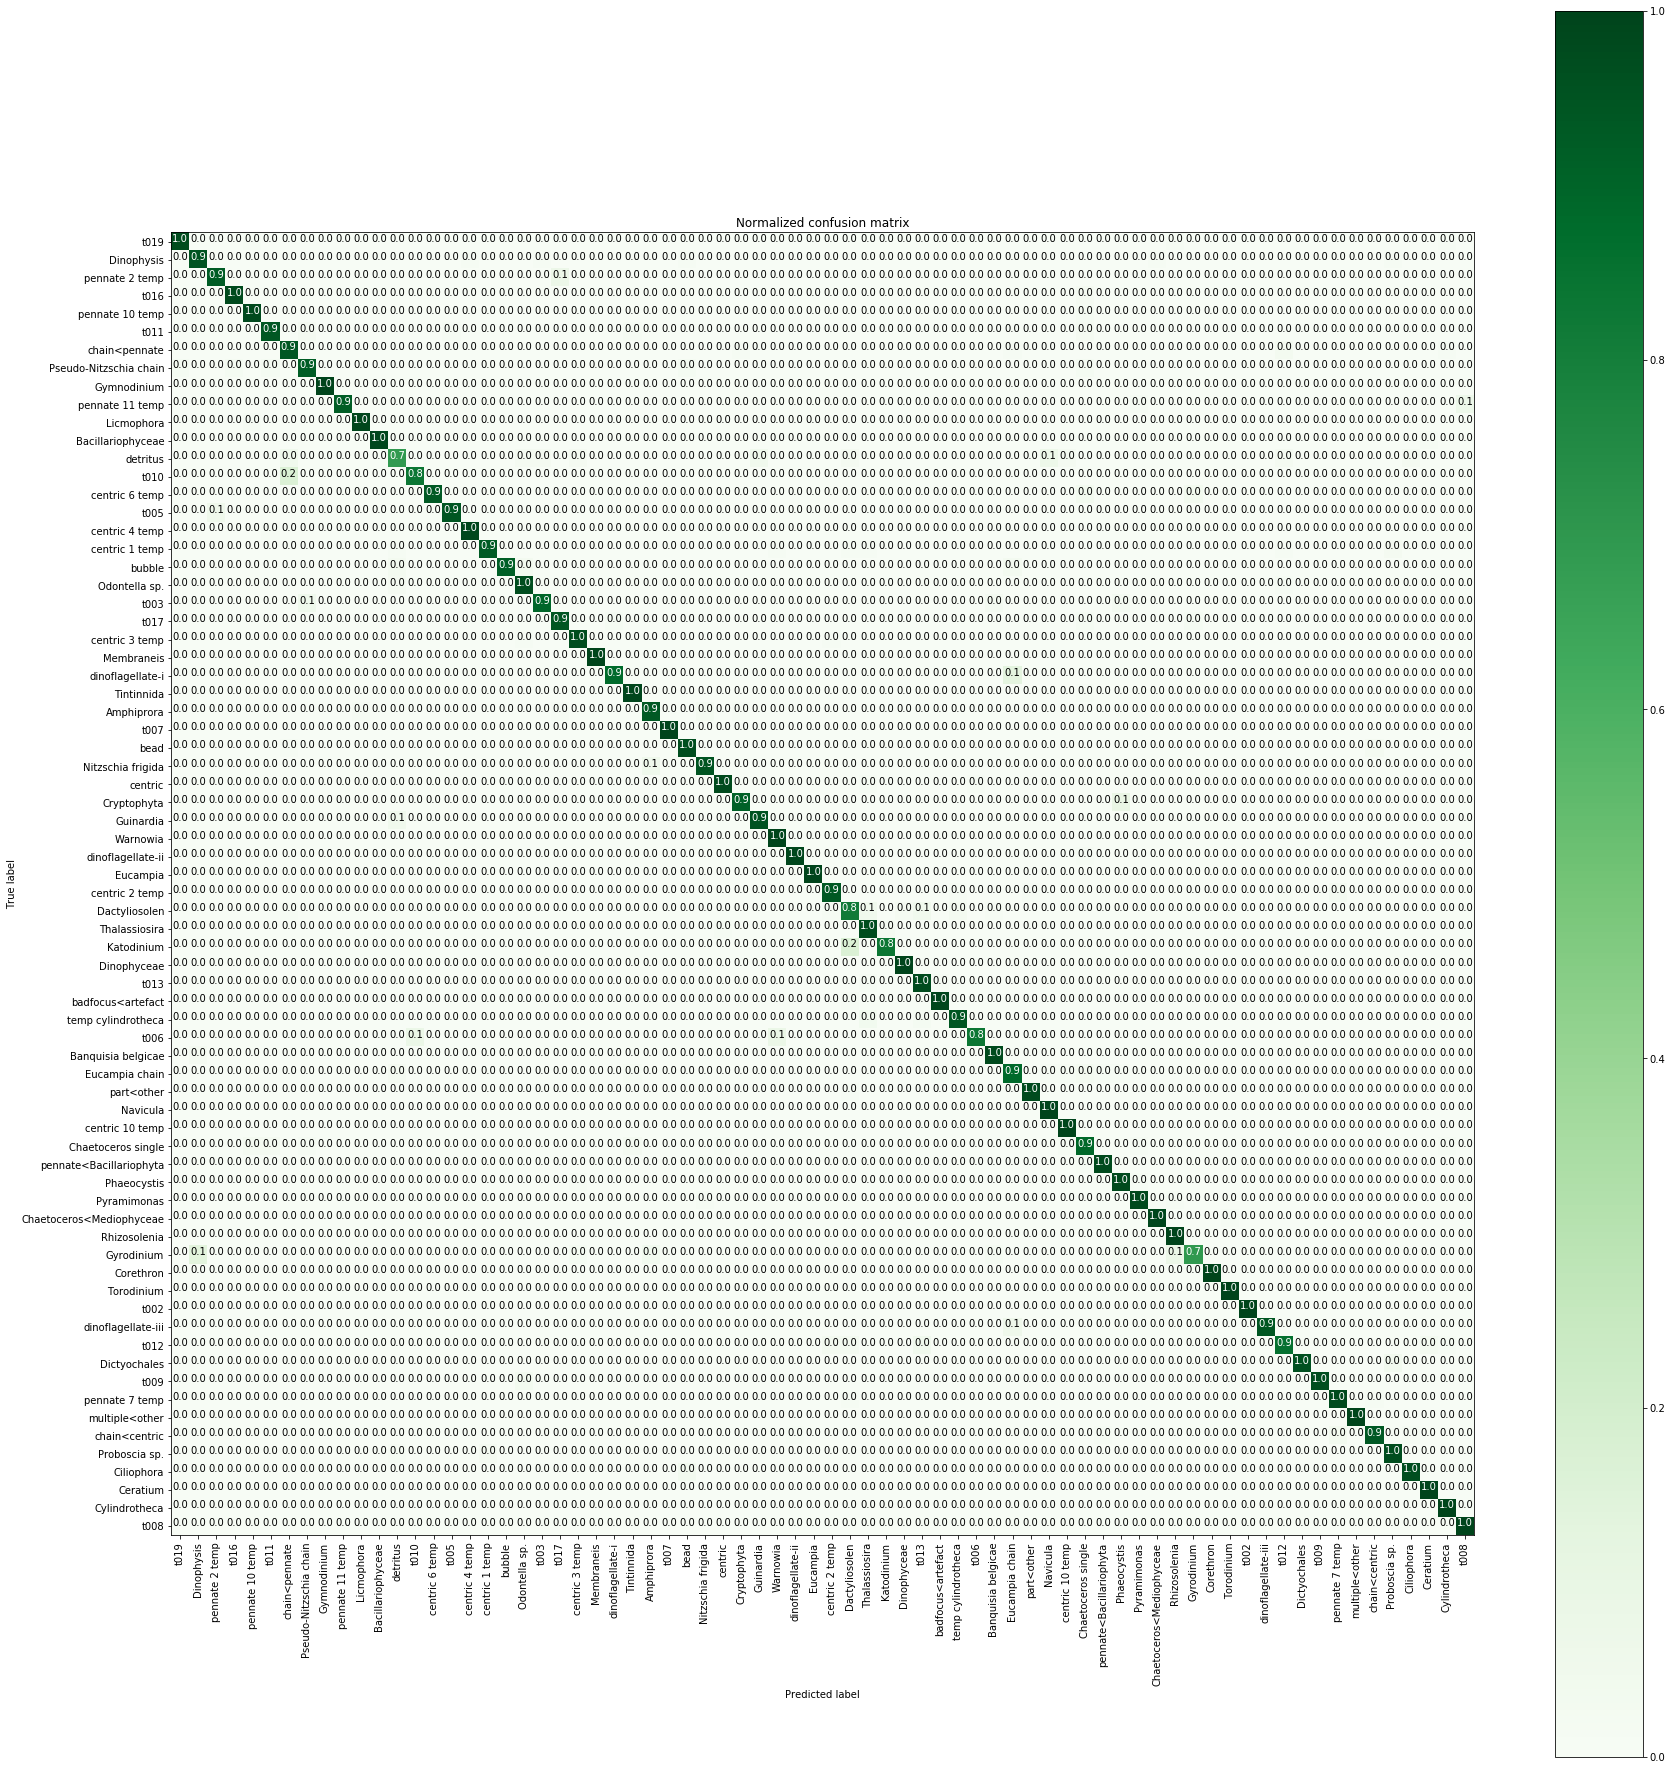

In [179]:
from sklearn.metrics import confusion_matrix
import itertools

Y_val_pred = predictions
Y_val_real = labs
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.savefig("full_model_conf_matrix.png", dpi=300)
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

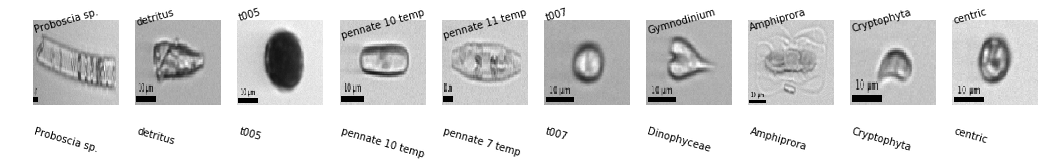

In [85]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [86]:
# TODO gauge model confidence by the predicted class

In [146]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu_iteration2.hdf5')

In [88]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   509
Bacillariophyceae            466
Banquisia belgicae            67
Ceratium                     214
Chaetoceros single           302
Chaetoceros<Mediophyceae     751
Ciliophora                   559
Corethron                    313
Cryptophyta                 1767
Cylindrotheca                379
Dactyliosolen                435
Dictyochales                 750
Dinophyceae                  227
Dinophysis                    29
Eucampia                     144
Eucampia chain                90
Guinardia                    359
Gymnodinium                  479
Gyrodinium                   175
Katodinium                   526
Licmophora                   185
Membraneis                   264
Navicula                     364
Nitzschia frigida            845
Odontella sp.                 80
Phaeocystis                 1107
Proboscia sp.                365
Pseudo-Nitzschia chain      1116
Pyramimonas                 1520
Rhizosolenia    

In [89]:
# go through each initial class and find out accuracy of how often that is in the correct merged class

In [90]:
class_id_dict

{'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 10 temp': 39,
 'centric 2 temp': 40,
 'centric 3 temp': 41,
 'centric 4 temp': 42,
 'centric 6 temp': 43,
 'chain<centric': 44,
 'chain<pennate': 45,
 'detritus': 46,
 'dinoflagellate-i':

#### finally running these on proper data and not including train

In [111]:
len(val_img_subset)

45322

In [117]:
val_img_subset = val_img_subset.reset_index()

In [191]:
val_img_subset = val_img_subset.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
val_img_subset_only_test = val_img_subset[val_img_subset.index.isin(ids_test)]
val_img_subset_only_test = val_img_subset_only_test.reset_index()
val_img_subset = val_img_subset.reset_index()

In [192]:
len(val_img_subset_only_test)

5202

In [193]:
val_img_subset_only_test.groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                  100
Bacillariophyceae            93
Banquisia belgicae           13
Ceratium                     43
Chaetoceros single           60
Chaetoceros<Mediophyceae    100
Ciliophora                  100
Corethron                    63
Cryptophyta                 100
Cylindrotheca                76
Dactyliosolen                87
Dictyochales                100
Dinophyceae                  45
Dinophysis                    6
Eucampia                     29
Eucampia chain               18
Guinardia                    72
Gymnodinium                  96
Gyrodinium                   35
Katodinium                  100
Licmophora                   37
Membraneis                   53
Navicula                     73
Nitzschia frigida           100
Odontella sp.                16
Phaeocystis                 100
Proboscia sp.                73
Pseudo-Nitzschia chain      100
Pyramimonas                 100
Rhizosolenia                 19
             

In [194]:
from tensorflow.keras.preprocessing import image
import numpy as np

names = []
accs = []
counts = []
all_labs = []
all_preds = []

for name, group in val_img_subset_only_test.groupby('object_annotation_category')['object_id']:
    #print('*** ',name)    
    images = []
    labels = []
    flus = []

    for fn in group:

        # TODO need to think about optimal size and that size actually corresponds to class
        # maybe add blackspace instead of interpolating because it is changing the morphology

        img = image.load_img('../../../Data/all_imagery/'+fn+'.png', target_size=(150, 150), color_mode="grayscale")
        images.append(image.img_to_array(img))
        mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
        pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
        peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
        labels.append(class_id_dict[mc.values[0]])
        flus.append([pmt.values[0], peak.values[0]]) 
        
    images = np.array(images)
    labels = np.array(labels)
    flus = np.array(flus)

    X_predict = images / 130
    #print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
    predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
    #print(np.count_nonzero(labels==predictions), len(labels))
    #print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
    names.append(name)
    accs.append(np.count_nonzero(labels==predictions)/len(labels))
    counts.append(len(labels))
    all_labs += list(labels)
    all_preds += list(predictions)
    #print('------')
    
    


In [195]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# names = []
# accs = []
# counts = []
# all_labs = []
# all_preds = []

# for name, group in val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id']:
#     #print('*** ',name)    
#     images = []
#     labels = []
#     flus = []

#     for fn in group:

#         # TODO need to think about optimal size and that size actually corresponds to class
#         # maybe add blackspace instead of interpolating because it is changing the morphology

#         img = image.load_img('../../../Data/all_imagery/'+fn+'.png', target_size=(150, 150), color_mode="grayscale")
#         images.append(image.img_to_array(img))
#         mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
#         pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
#         peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
#         labels.append(class_id_dict[mc.values[0]])
#         flus.append([pmt.values[0], peak.values[0]]) 
        
#     images = np.array(images)
#     labels = np.array(labels)
#     flus = np.array(flus)

#     X_predict = images / 130
#     #print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
#     predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
#     #print(np.count_nonzero(labels==predictions), len(labels))
#     #print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
#     names.append(name)
#     accs.append(np.count_nonzero(labels==predictions)/len(labels))
#     counts.append(len(labels))
#     all_labs += list(labels)
#     all_preds += list(predictions)
#     #print('------')
    
    


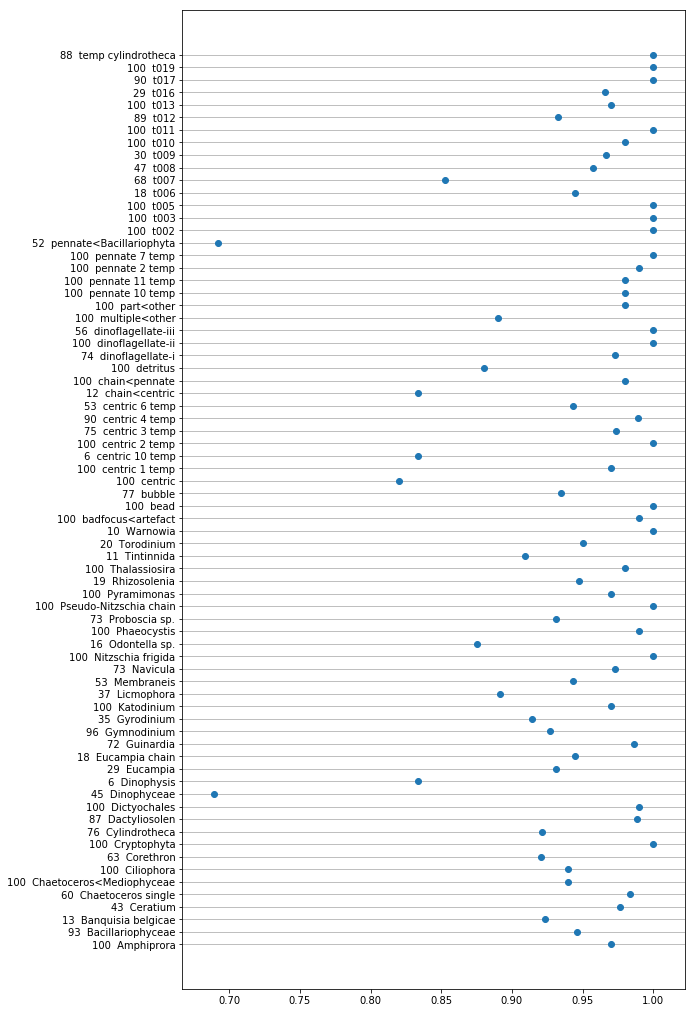

In [196]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(accs, names)
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('individual_class_acc.png', dpi=300)
plt.show()

In [219]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), average='weighted', labels=list(id_class_dict.keys()))

(0.963627843790138, 0.9536633663366336, 0.9582168639036219, None)

In [229]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), 
                                average=None, labels=list(id_class_dict.keys()))

In [230]:
len(list(id_class_dict.keys()))

72

In [231]:
len(precision)

72

In [232]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

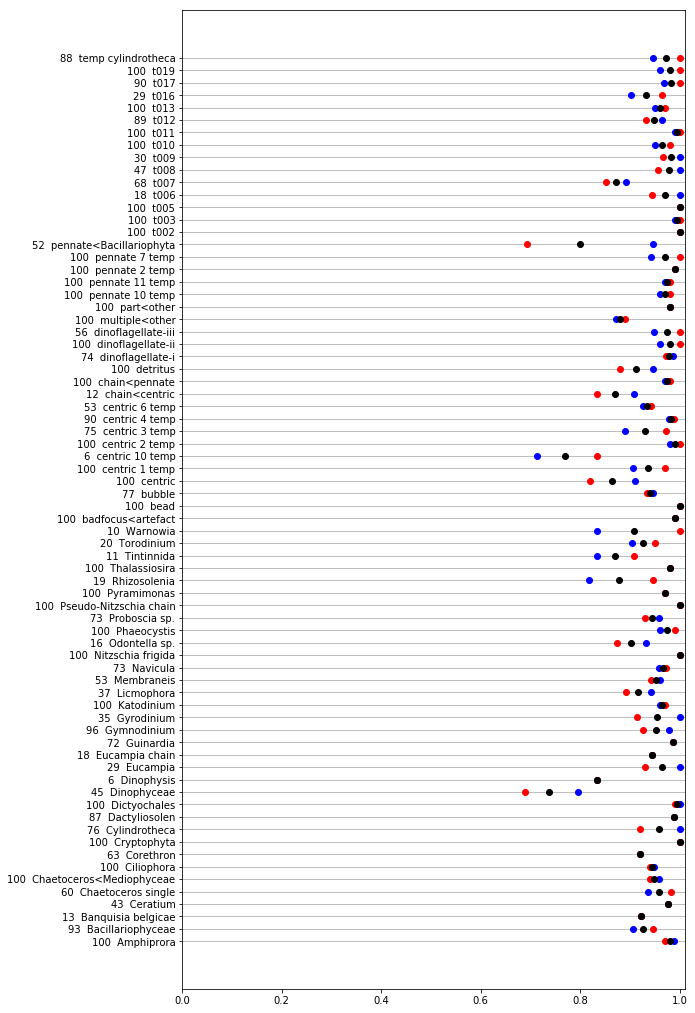

In [235]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('individual_class_acc.png', dpi=300)
plt.show()

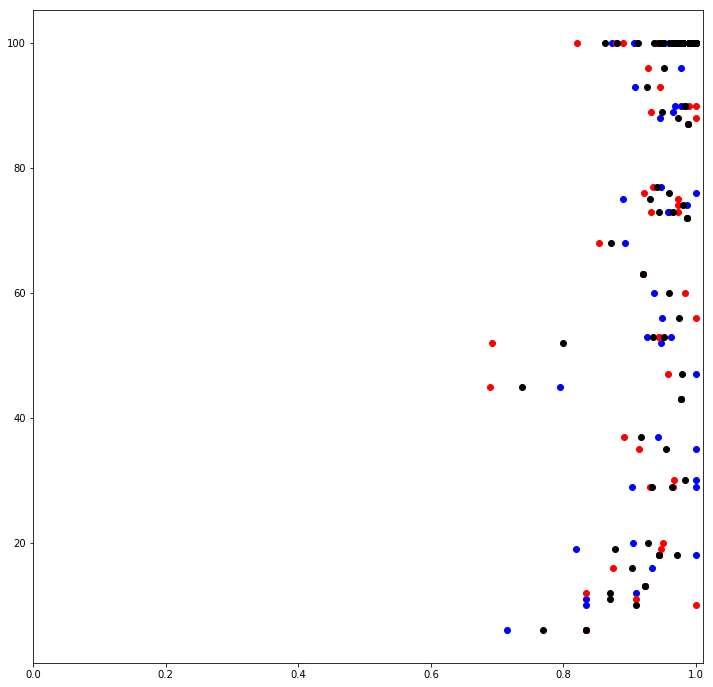

In [236]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(accs, counts)
ax.scatter(precision, counts, color='blue')
ax.scatter(recall, counts, color='red')
ax.scatter(fscore, counts, color='black')
#ax.set_yticks(range(0,len(names)))
#ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')
#ax.set_ylim(-10,1500)

# Don't allow the axis to be on top of your data
#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('count_vs_acc.png', dpi=300)
plt.show()

In [246]:
?plt.imshow

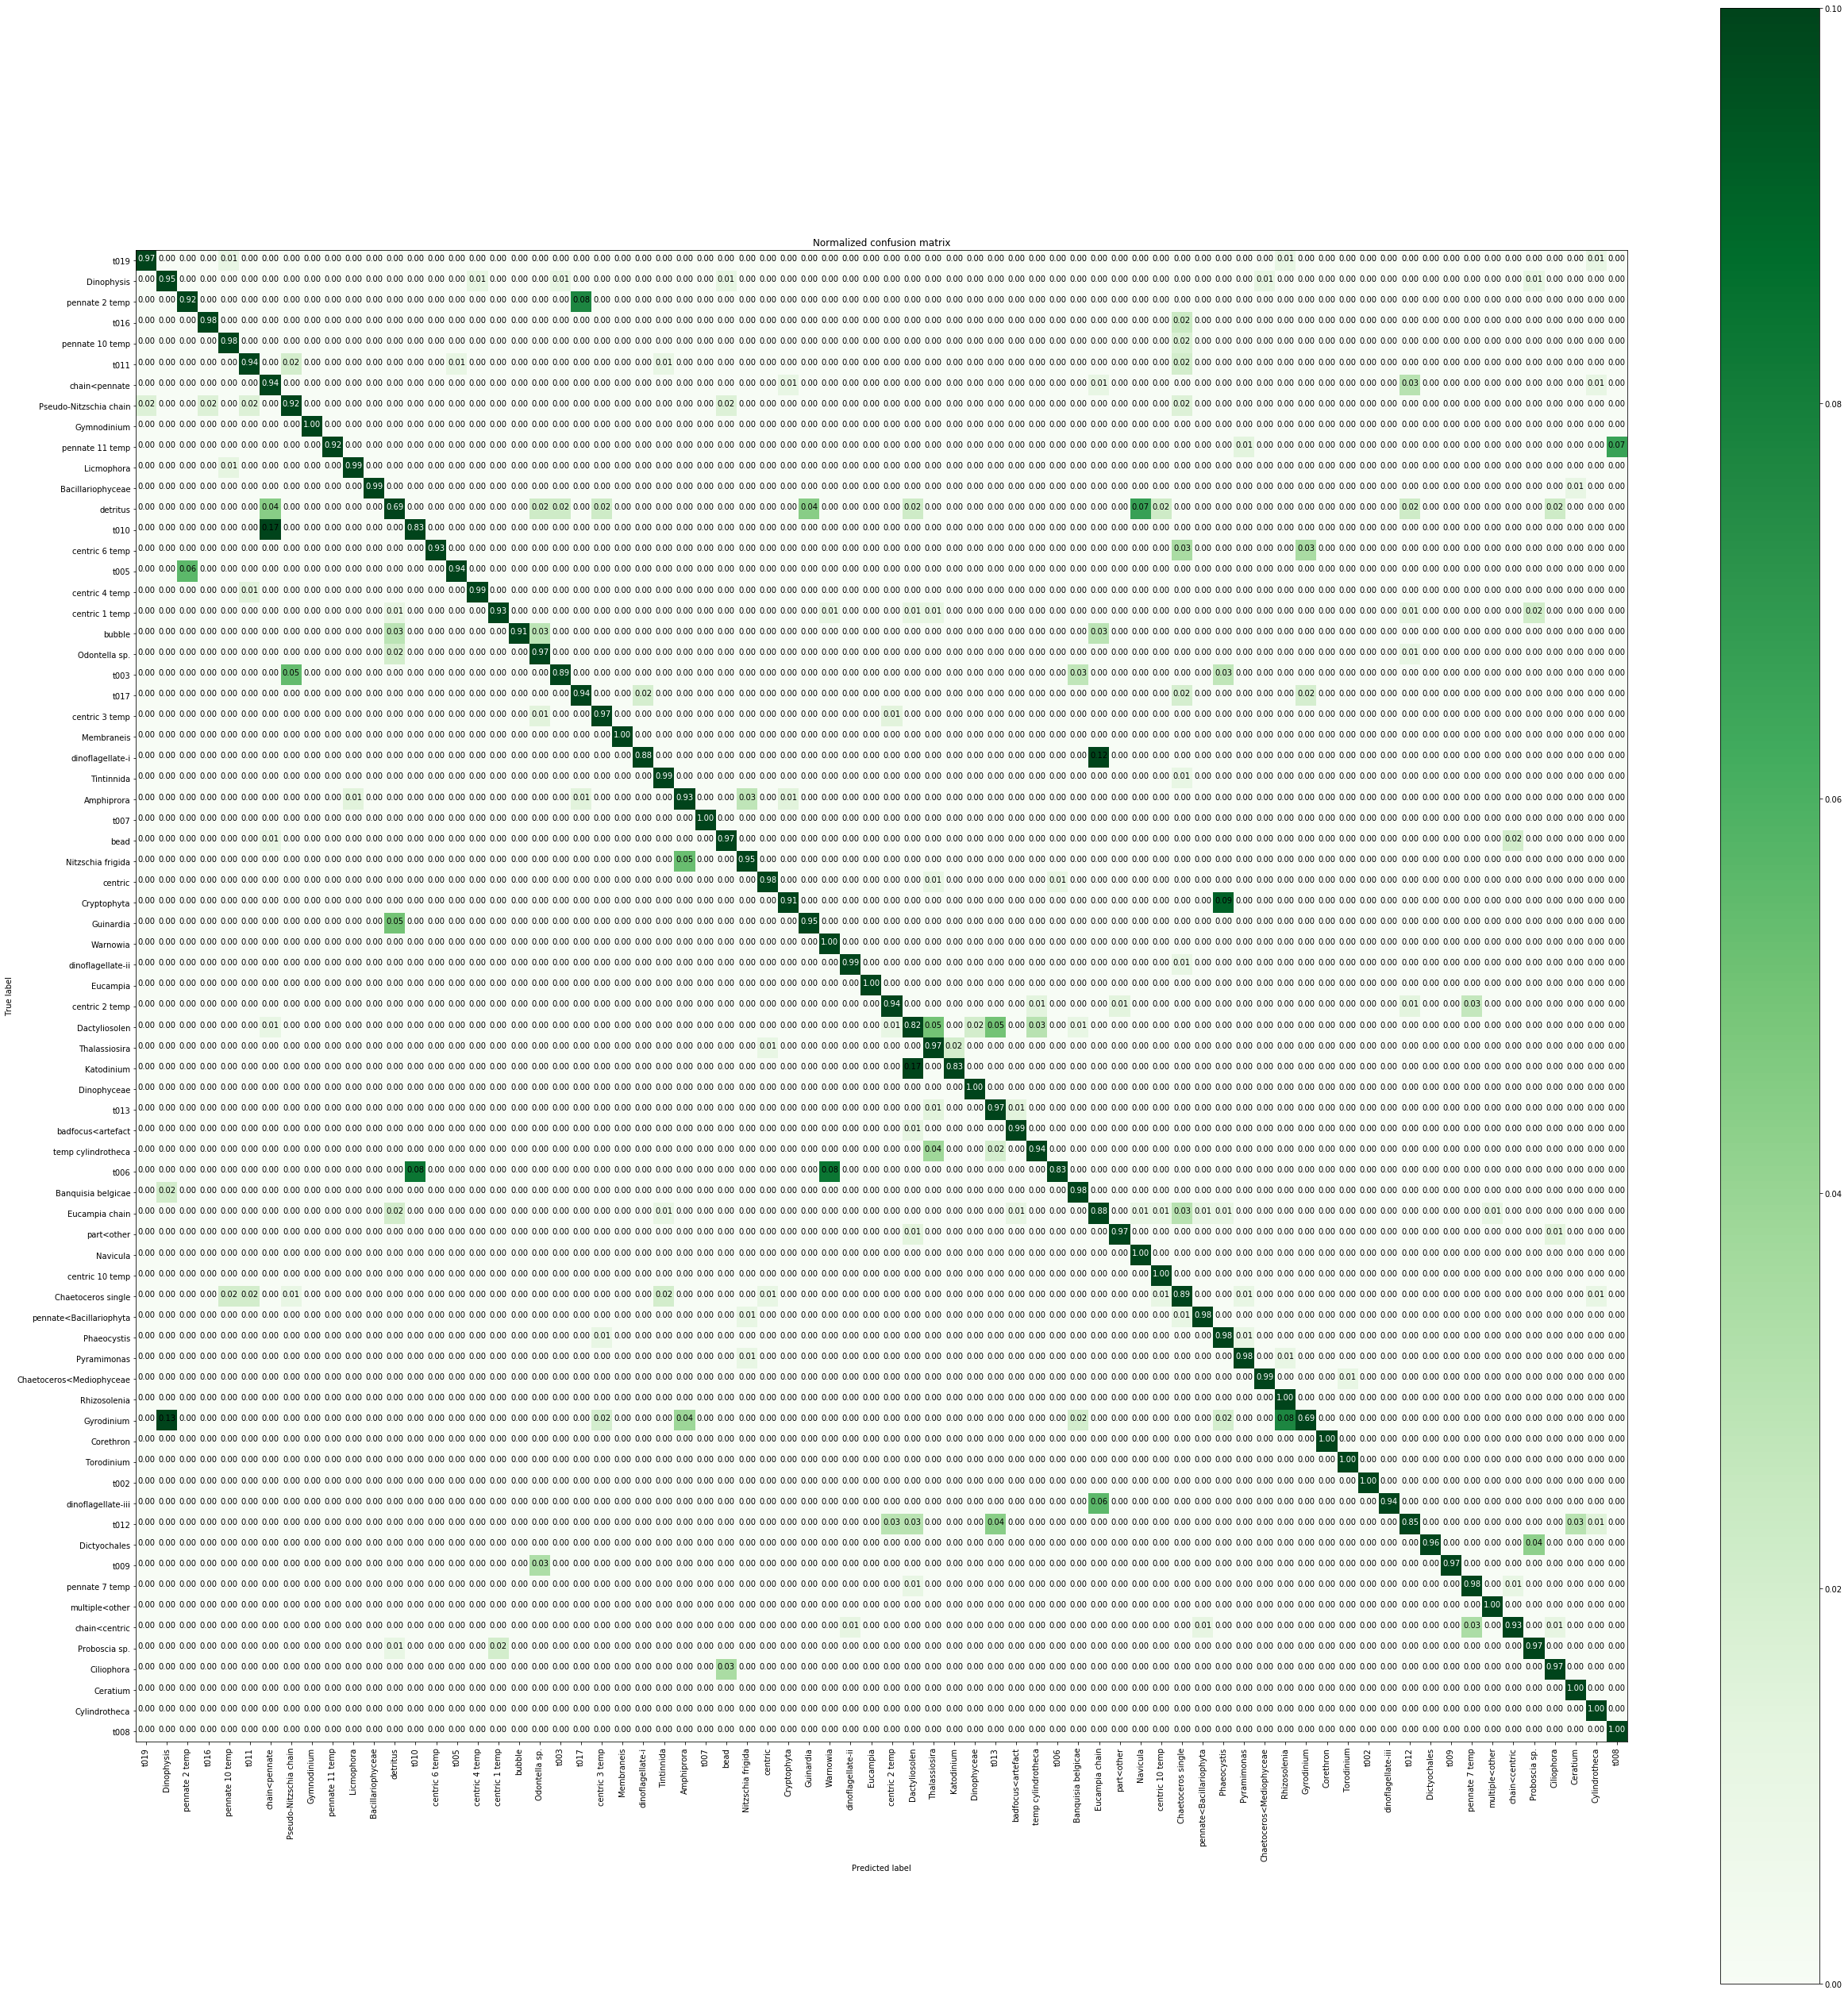

In [250]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens', vmax=0.1)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_unmerged_visible_low_end_large.png', dpi=300)

In [205]:
! pwd

/host/Code/deep_ifcb/python


In [206]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [207]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])


In [238]:
class_id_dict = {'amphiprora': 0,
 'chaetoceros': 1,
 'chaetoceros_mediophyceae': 2,
 'chlorophytes': 3,
 'ciliophora': 4,
 'corethron': 5,
 'cryptophytes': 6,
 'cylindrotheca': 7,
 'dactyliosolen': 8,
 'dinoflagellate_i': 9,
 'dinoflagellate_ii': 10,
 'dinoflagellate_iii': 11,
 'dinophyceae': 12,
 'eucampia': 13,
 'eucampia_chain': 14,
 'general_centric_diatoms': 15,
 'general_dinoflagellates': 16,
 'general_pennate_diatoms': 17,
 'gymnodinium': 18,
 'haptophytes': 19,
 'katodinium': 20,
 'nitzschia_frigida': 21,
 'other': 22,
 'proboscia': 23,
 'pseudo_nitzschia_chain': 24,
 'silicoflagellates': 25,
 'small_unidentified_cells': 26,
 'tintinnida': 27,
 'unidenfitied_chain_pennates': 28,
 'unidentified_chain_centrics': 29,
 'unidentified_diatoms': 30,
 'unidentified_flagellates': 31,
 'unidentified_living_cells': 32,
 'unidentified_single_centrics': 33,
 'unidentified_single_pennates': 34,
 'torodinium':35,
 'guinardia': 36,
 'ceratium' : 37}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [239]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(5202, 5202)

In [240]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(5202, 5202)

In [241]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

(0.9692414995294453, 0.9692425990003845, 0.9690934524815022, None)

In [242]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [243]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

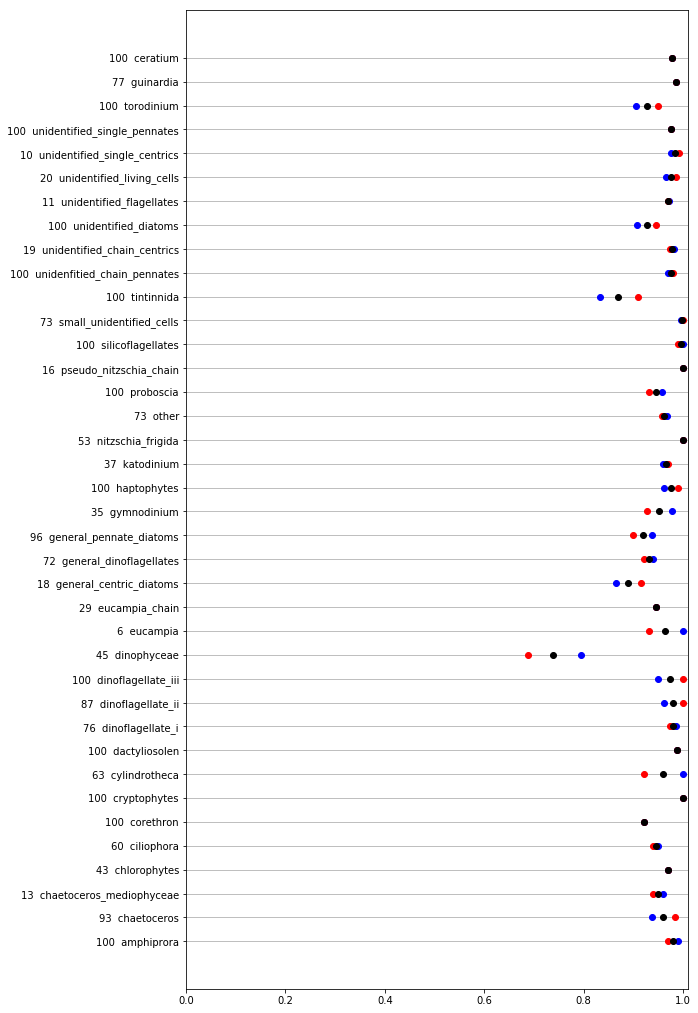

In [244]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

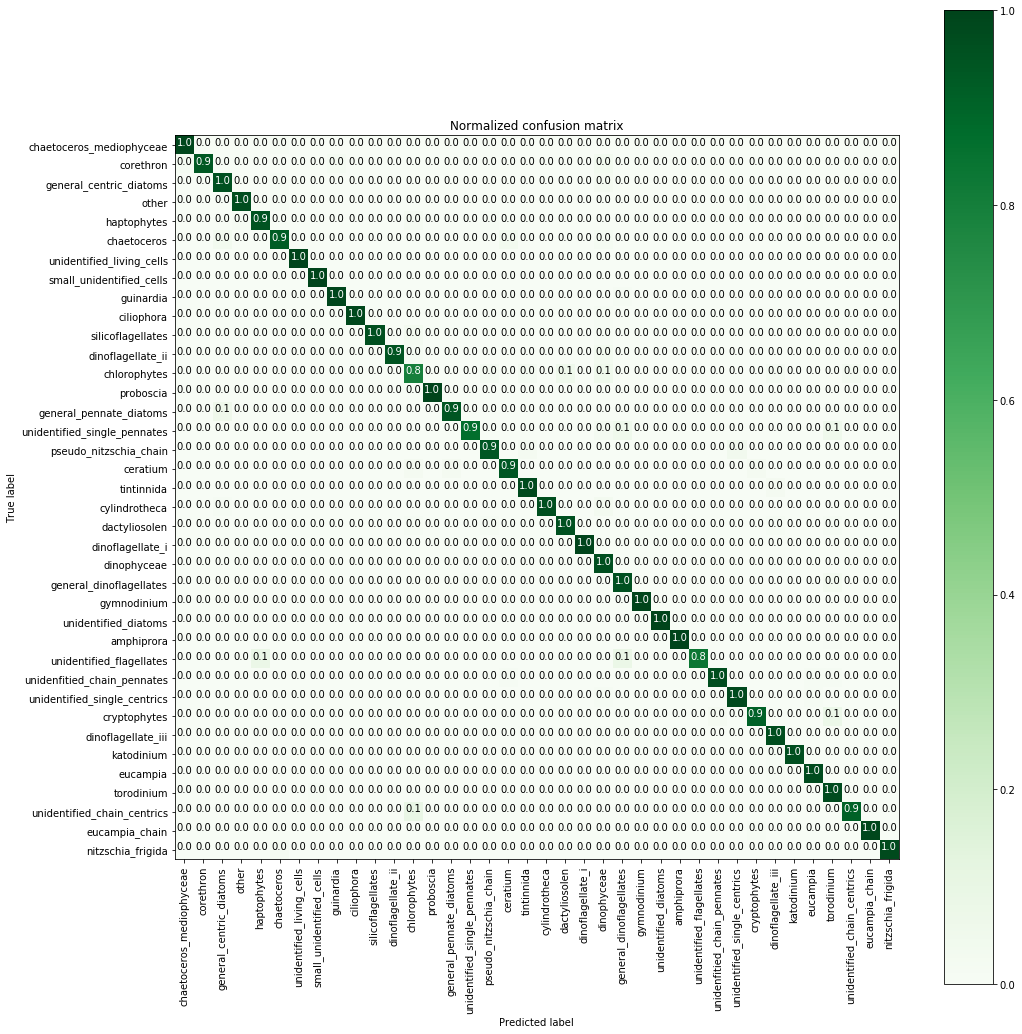

In [245]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_merged.png', dpi=300)